In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_excel('/content/Ozibook_-_Competitor_Tracker.xlsx', sheet_name='Merged')

In [30]:
df

Competitor Name                                                URL  \
0    Saheli Chatterjee  https://www.linkedin.com/posts/saheli-chatterj...   
1    Saheli Chatterjee  https://www.linkedin.com/posts/saheli-chatterj...   
2    Saheli Chatterjee  https://www.linkedin.com/posts/saheli-chatterj...   
3    Saheli Chatterjee  https://www.linkedin.com/posts/saheli-chatterj...   
4    Saheli Chatterjee  https://www.linkedin.com/posts/saheli-chatterj...   
..                 ...                                                ...   
340     Saakshi Jadhav  https://www.linkedin.com/posts/saakshijadhav_i...   
341     Saakshi Jadhav  https://www.linkedin.com/posts/saakshijadhav_w...   
342     Saakshi Jadhav  https://www.linkedin.com/posts/saakshijadhav_i...   
343     Saakshi Jadhav  https://www.linkedin.com/posts/saakshijadhav_s...   
344     Saakshi Jadhav  https://www.linkedin.com/posts/saakshijadhav_i...   

     Followers   Likes  Comments  Engagement Rate  \
0     208026.0  1123.0     151.0         0.612423   
1          NaN  3834.0     471.0         2.069453   
2          NaN  2803.0     318.0         1.500293   
3          NaN  1772.0     204.0         0.949881   
4          NaN  2896.0     310.0         1.541154   
..         ...     ...       ...              ...   
340        NaN   240.0      48.0         1.263047   
341        NaN   368.0     108.0         2.087536   
342        NaN   260.0      71.0         1.451627   
343        NaN   306.0      52.0         1.570038   
344        NaN   306.0      91.0         1.741075   

                                               Caption Format  \
0    🔥🐉 DRAGONS AND FREELANCING?! 🐉🔥\n \n 👑 Hear ye...  IMAGE   
1    I am going to read 21 books in August. 📚\n \n ...  IMAGE   
2    My August Goals, broken down :\n \n Work & Pro...  IMAGE   
3    You may think becoming a High-income freelance...  IMAGE   
4    So I come across this kind of post often.\n \n...  IMAGE   
..                                                 ...    ...   
340  I took 5 flights last month!\n\nEvery flight I...    NaN   
341  “Work smart not hard, Saakshi!”\n\nI took my d...    NaN   
342  I studied the TOP 1% accounts on LINKEDIN so y...    NaN   
343  Stop, everything you see on LinkedIn is not th...    NaN   
344  INR 200! That’s what my first client paid me f...    NaN   

                                                 Theme  \
0    Innovative Approach to Freelancing with a Touc...   
1    Rekindling the Passion for Reading and Setting...   
2    Ambitious Pursuits and Personal Growth: Naviga...   
3    Embracing Humble Origins on the Path to Freela...   
4    Breaking Barriers and Defying Privilege in Cre...   
..                                                 ...   
340  The Power of Disconnection for Creative Inspir...   
341   Embracing Growth through Hiring Exceptional T...   
342             LinkedIn Insights from Top 1% Accounts   
343  The Realities of Entrepreneurship vs. Social M...   
344         The Value of the First Freelancing Project   

                                              Subtheme  \
0    Embracing Strength and Resilience for Freelanc...   
1    Balancing Business, Personal Growth, and Readi...   
2    Balancing Professional and Personal Aspiration...   
3    Highlighting the Significance of Work Ethic an...   
4    Championing Self-Taught Success and Confrontin...   
..                                                 ...   
340     Finding Ideas Within and Fostering Originality   
341         Leveraging Diverse Skills and Perspectives   
342            Winning Strategies for Engaging Content   
343  : Embracing Challenges and Sharing Authentic E...   
344   Beyond Monetary Gain - Passion, Confidence, a...   

                                                 Topic  \
0    Unleash Your Creative Fire: Embracing a Dragon...   
1    Rediscovering the Joy of Reading: Navigating A...   
2    August Aspirations: Conquering Goals, Cultivat...   
3    From Humble Beginnings to High-In

In [31]:
df.dtypes

Competitor Name     object
URL                 object
Followers          float64
Likes              float64
Comments           float64
Engagement Rate    float64
Caption             object
Format              object
Theme               object
Subtheme            object
Topic               object
Summary             object
dtype: object

In [32]:
df.isna().sum()


Competitor Name      1
URL                  1
Followers          329
Likes                2
Comments             8
Engagement Rate      3
Caption              1
Format              93
Theme               52
Subtheme            52
Topic               55
Summary             52
dtype: int64

In [33]:
df = df.dropna(subset='Theme')

In [34]:
df['Theme']

0      Innovative Approach to Freelancing with a Touc...
1      Rekindling the Passion for Reading and Setting...
2      Ambitious Pursuits and Personal Growth: Naviga...
3      Embracing Humble Origins on the Path to Freela...
4      Breaking Barriers and Defying Privilege in Cre...
                             ...                        
340    The Power of Disconnection for Creative Inspir...
341     Embracing Growth through Hiring Exceptional T...
342               LinkedIn Insights from Top 1% Accounts
343    The Realities of Entrepreneurship vs. Social M...
344           The Value of the First Freelancing Project
Name: Theme, Length: 293, dtype: object

In [35]:
df['Competitor Name'] = df['Competitor Name'].str.strip()

<ipython-input-35-5a2e07f3a160>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Competitor Name'] = df['Competitor Name'].str.strip()


In [36]:
unique_usernames = df['Competitor Name'].unique()
unique_formats = df['Format'].unique()

In [37]:
dfs_by_username_format = {}

for username in unique_usernames:
    for format in unique_formats:
        format_df = df[(df['Competitor Name'] == username) & (df['Format'] == format)]
        df_name = f"df_{username}_{format}"
        dfs_by_username_format[df_name] = format_df

In [39]:
import re
from datetime import datetime, timezone, timedelta
import pandas as pd

def get_post_id(url):
    if not isinstance(url, str):
        return None
    match = re.search(r'([0-9]{19})', url)
    if match:
        return match.group(1)
    return None

def extract_unix_timestamp(post_id):
    as_binary = bin(int(post_id))[2:]
    first41_chars = as_binary[:41]
    timestamp = int(first41_chars, 2)
    return timestamp

def unix_timestamp_to_human_date(timestamp, to_ist):
    timestamp = timestamp / 1000
    utc_time = datetime.fromtimestamp(timestamp, tz=timezone.utc)
    if to_ist:
        ist_time = utc_time + timedelta(hours=5, minutes=30)
        return ist_time.strftime('%a, %d %b %Y %I:%M:%S %p IST')
    else:
        return utc_time.strftime('%a, %d %b %Y %I:%M:%S %p UTC')

def process_xlsx_file(dataframe):
    df = dataframe

    if 'Timestamp UTC' not in df.columns:
        df['Timestamp UTC'] = None
    if 'Timestamp IST' not in df.columns:
        df['Timestamp IST'] = None

    for idx, row in df.iterrows():
        if pd.notna(row['URL']):
            post_id = get_post_id(row['URL'])
            if post_id:
                unix_timestamp = extract_unix_timestamp(post_id)
                df.at[idx, 'Timestamp UTC'] = unix_timestamp_to_human_date(unix_timestamp, to_ist=False)
                df.at[idx, 'Timestamp IST'] = unix_timestamp_to_human_date(unix_timestamp, to_ist=True)

    return df

result_df = process_xlsx_file(df)
# display(result_df)

<ipython-input-39-17d9fd65c707>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp UTC'] = None
<ipython-input-39-17d9fd65c707>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp IST'] = None


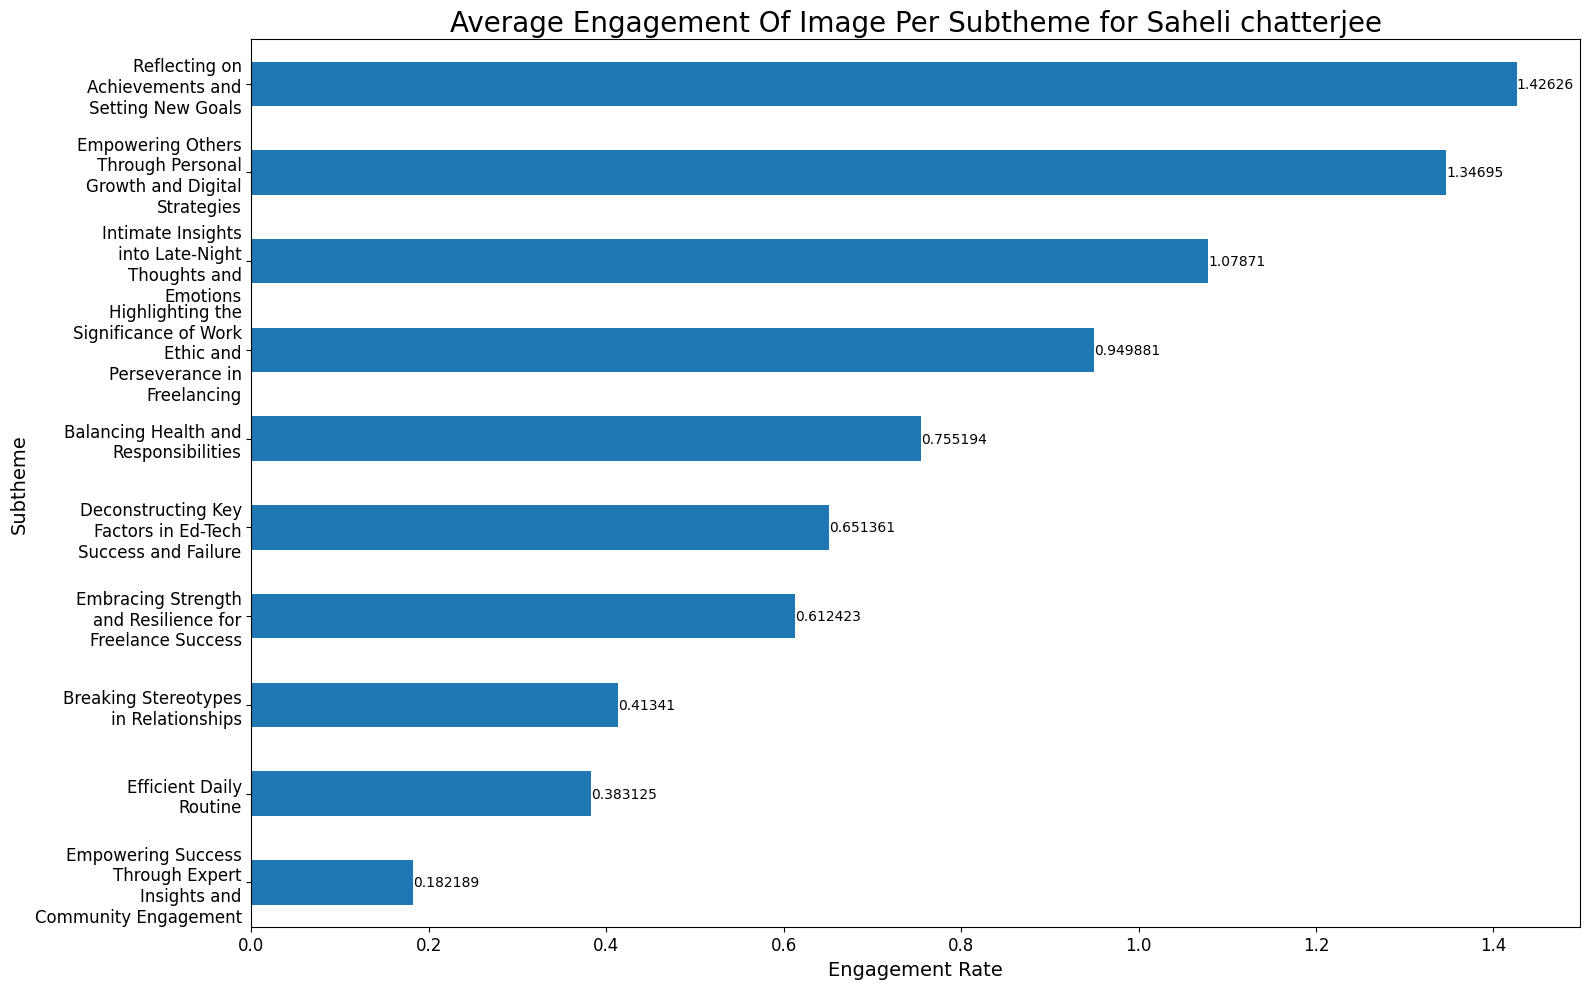

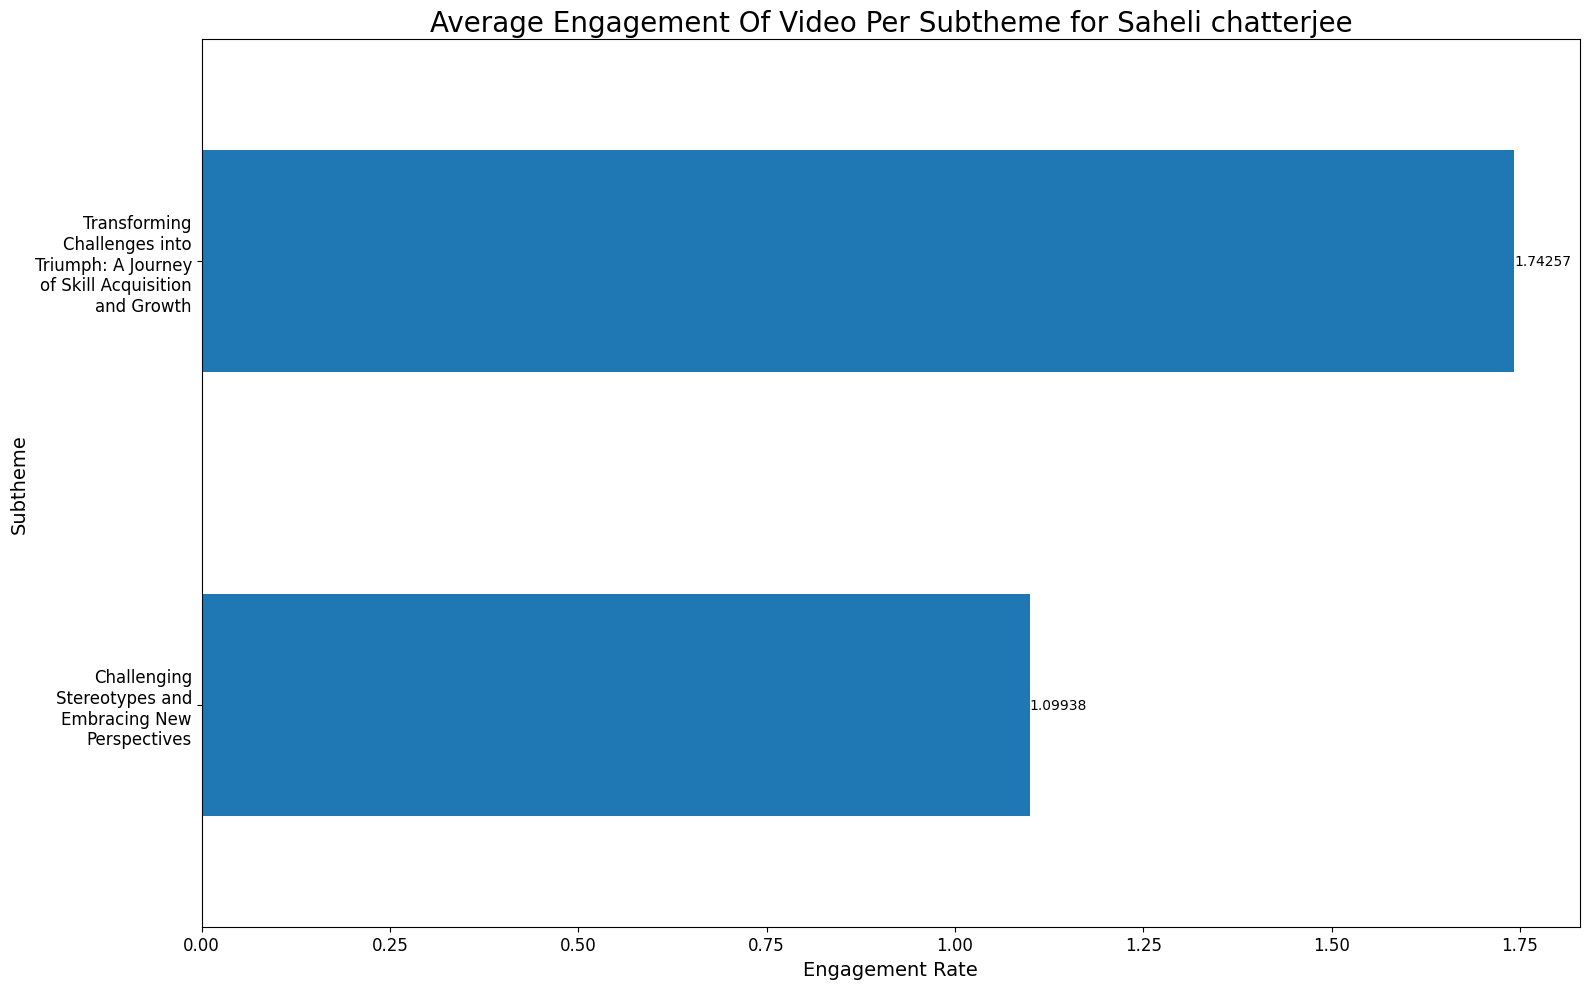

No data available for DataFrame df_Saheli Chatterjee_nan
No data available for DataFrame df_Saheli Chatterjee_Image
No data available for DataFrame df_Saheli Chatterjee_Video
No data available for DataFrame df_Saheli Chatterjee_ Image
No data available for DataFrame df_Saheli Chatterjee_Repost
No data available for DataFrame df_Saheli Chatterjee_image
No data available for DataFrame df_Saheli Chatterjee_Link
No data available for DataFrame df_Saheli Chatterjee_Carousels
No data available for DataFrame df_Saheli Chatterjee_Text
No data available for DataFrame df_Saheli Chatterjee_Carousel


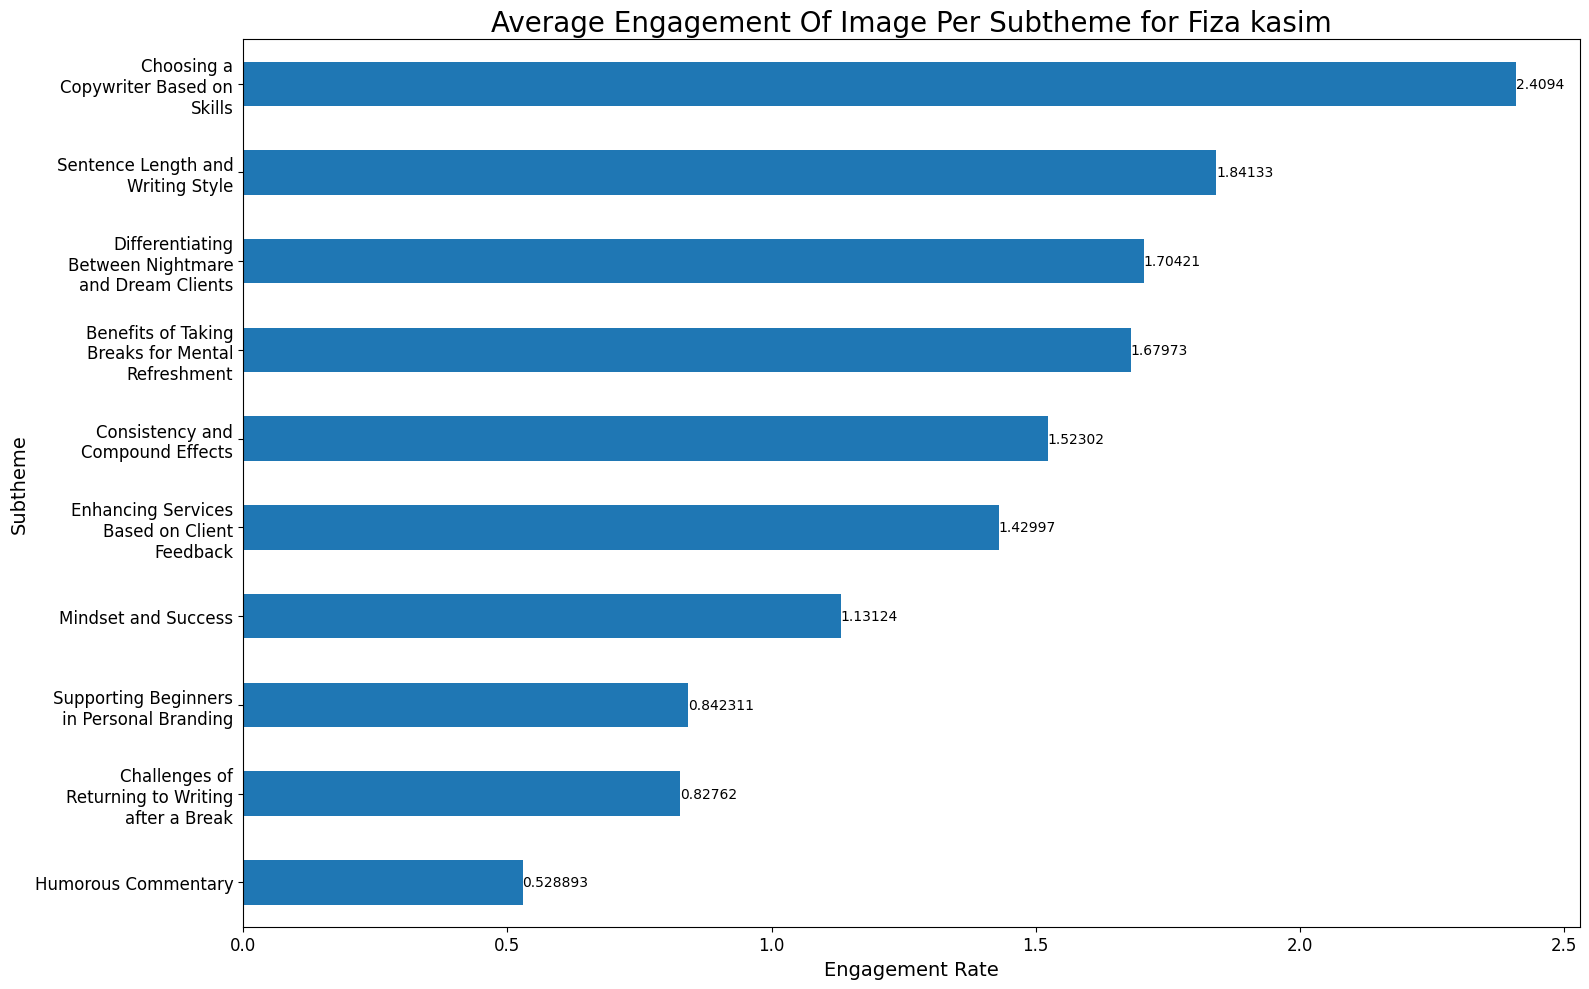

No data available for DataFrame df_Fiza Kasim_VIDEO
No data available for DataFrame df_Fiza Kasim_nan
No data available for DataFrame df_Fiza Kasim_Image
No data available for DataFrame df_Fiza Kasim_Video
No data available for DataFrame df_Fiza Kasim_ Image
No data available for DataFrame df_Fiza Kasim_Repost
No data available for DataFrame df_Fiza Kasim_image
No data available for DataFrame df_Fiza Kasim_Link
No data available for DataFrame df_Fiza Kasim_Carousels
No data available for DataFrame df_Fiza Kasim_Text
No data available for DataFrame df_Fiza Kasim_Carousel
No data available for DataFrame df_Nataraj Sasid_IMAGE
No data available for DataFrame df_Nataraj Sasid_VIDEO
No data available for DataFrame df_Nataraj Sasid_nan
No data available for DataFrame df_Nataraj Sasid_Image
No data available for DataFrame df_Nataraj Sasid_Video
No data available for DataFrame df_Nataraj Sasid_ Image
No data available for DataFrame df_Nataraj Sasid_Repost
No data available for DataFrame df_Nat

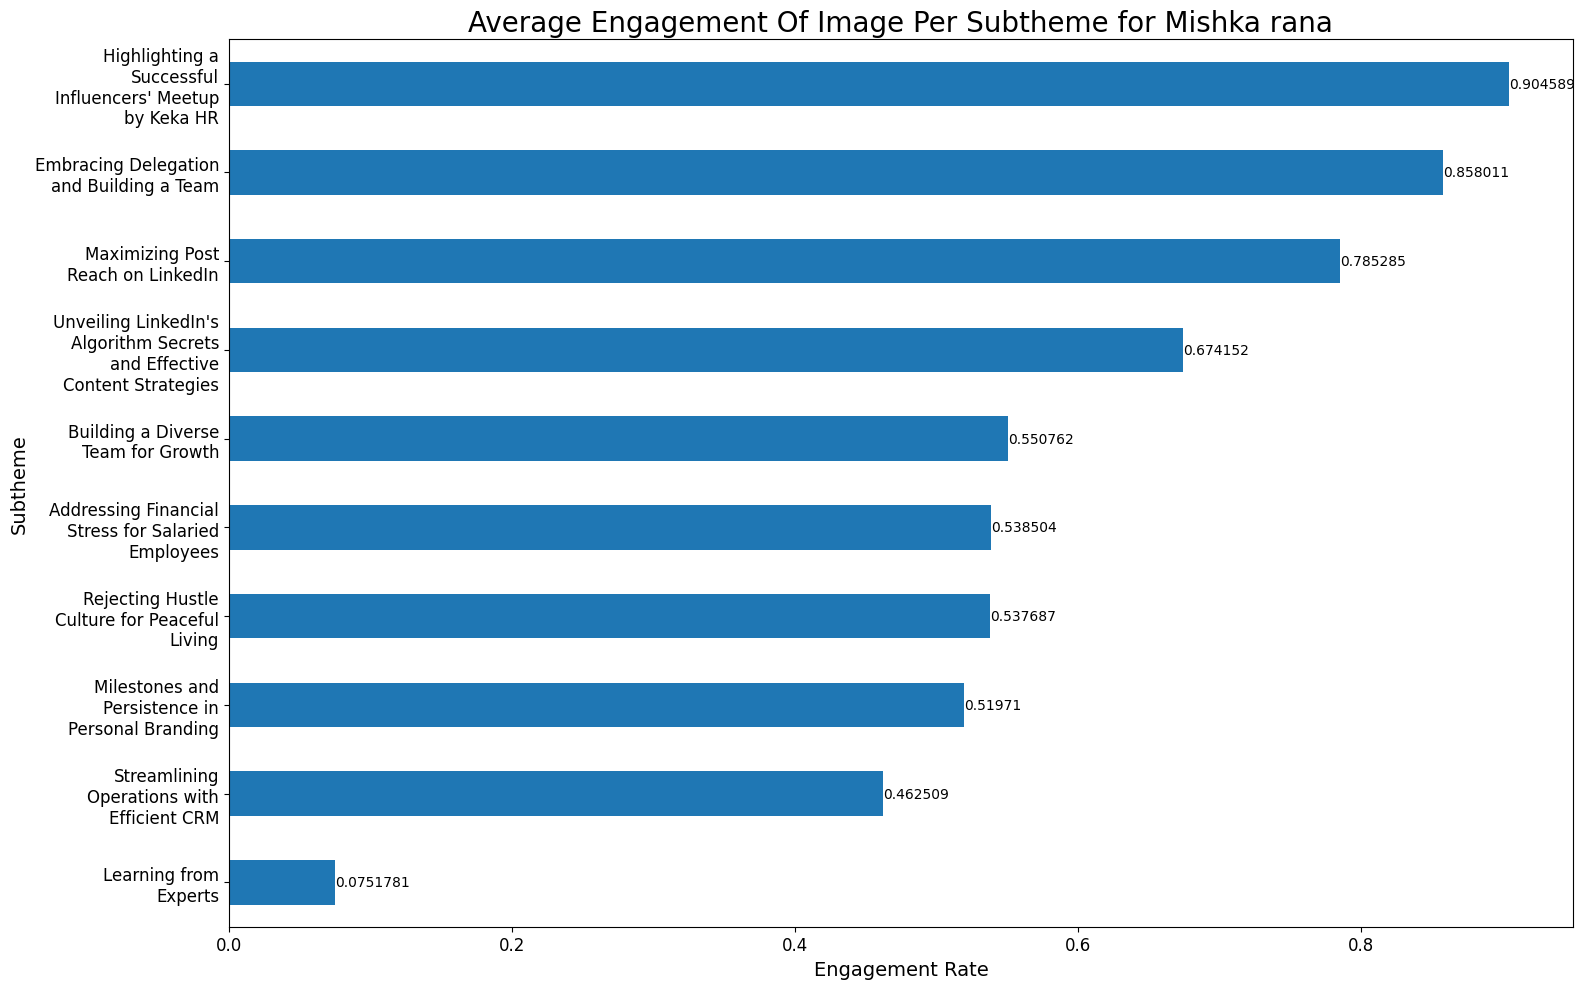

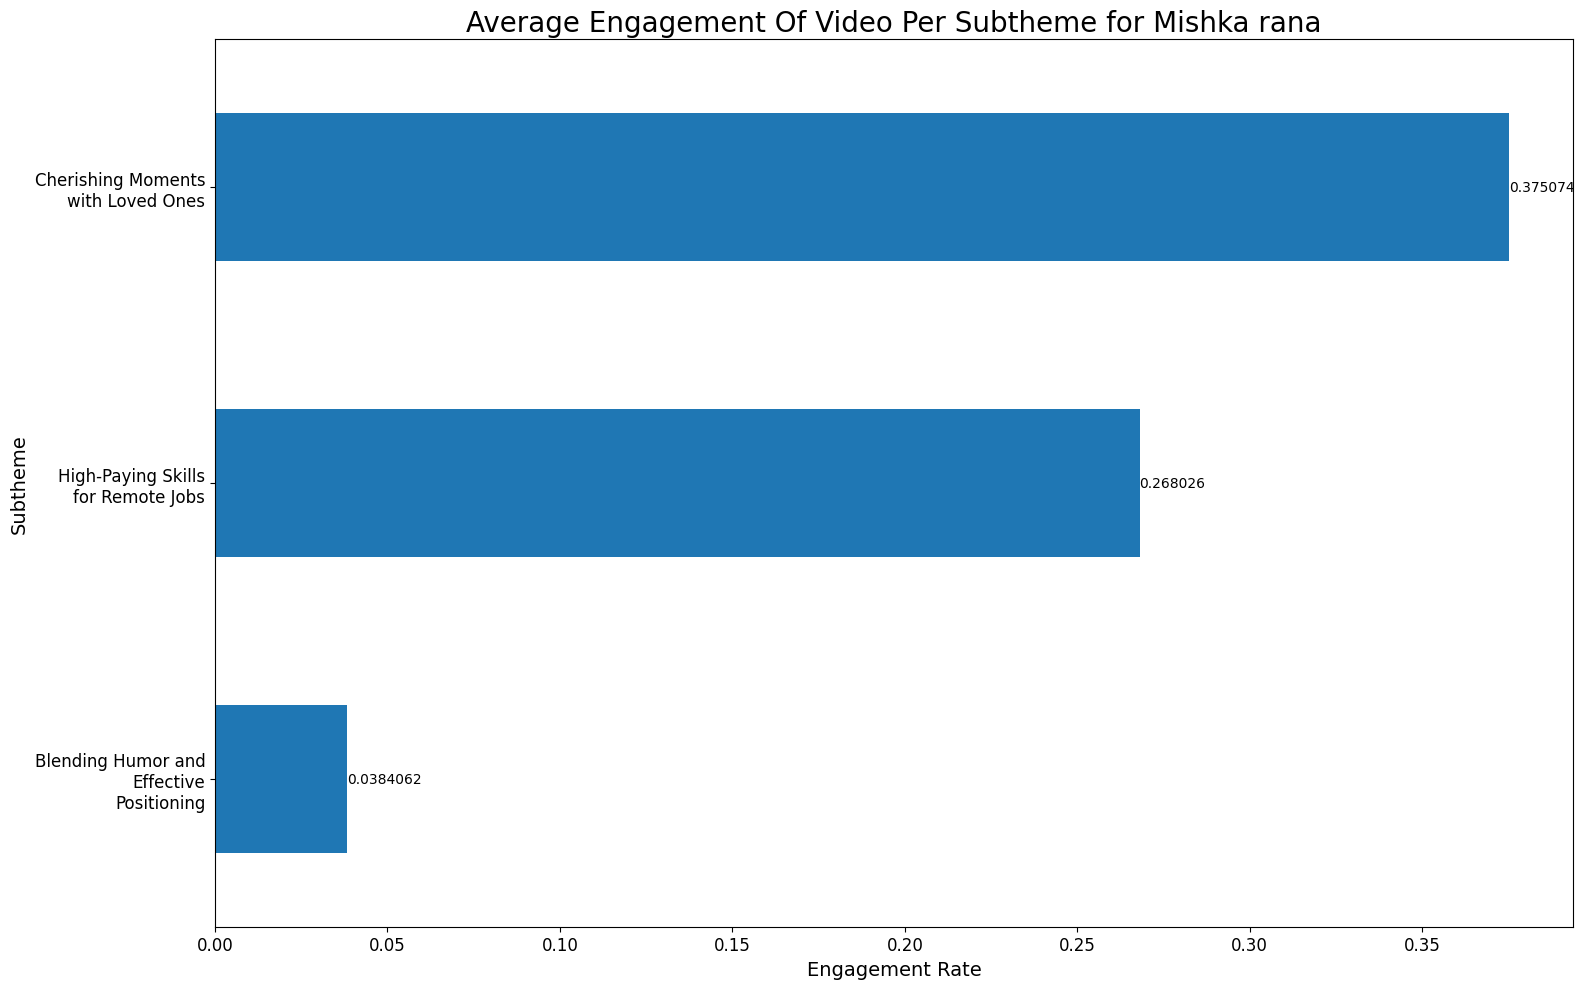

No data available for DataFrame df_MISHKA RANA_ Image
No data available for DataFrame df_MISHKA RANA_Repost
No data available for DataFrame df_MISHKA RANA_image
No data available for DataFrame df_MISHKA RANA_Link
No data available for DataFrame df_MISHKA RANA_Carousels
No data available for DataFrame df_MISHKA RANA_Text
No data available for DataFrame df_MISHKA RANA_Carousel


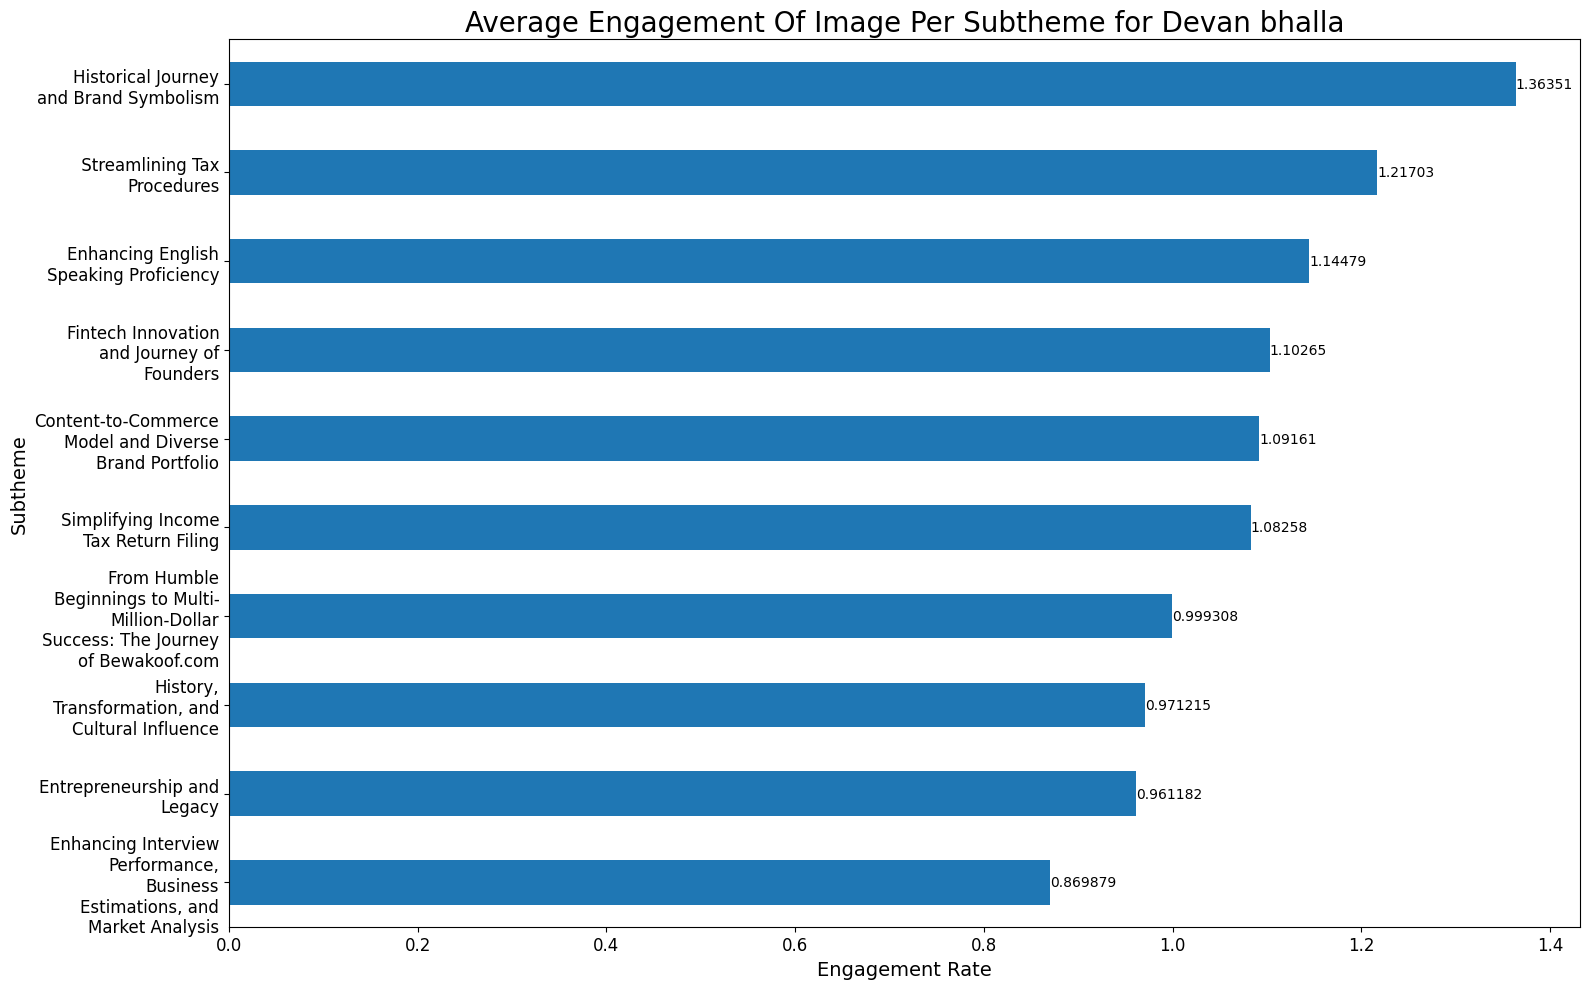

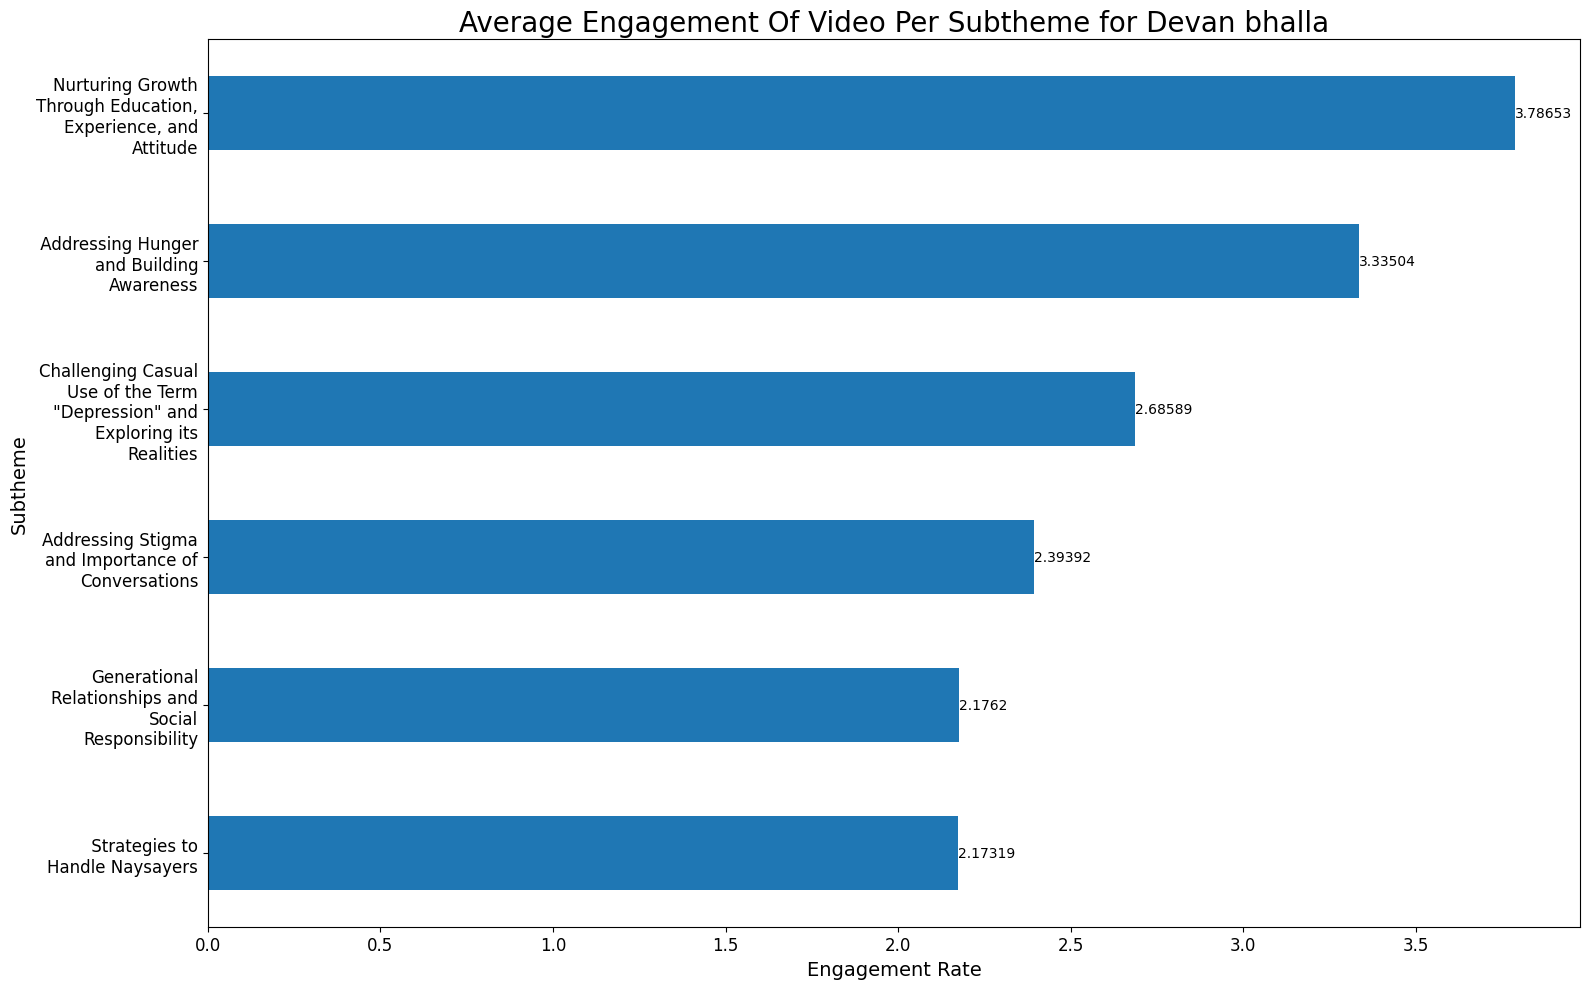

No data available for DataFrame df_Devan Bhalla_nan
No data available for DataFrame df_Devan Bhalla_Image
No data available for DataFrame df_Devan Bhalla_Video
No data available for DataFrame df_Devan Bhalla_ Image
No data available for DataFrame df_Devan Bhalla_Repost
No data available for DataFrame df_Devan Bhalla_image
No data available for DataFrame df_Devan Bhalla_Link
No data available for DataFrame df_Devan Bhalla_Carousels
No data available for DataFrame df_Devan Bhalla_Text
No data available for DataFrame df_Devan Bhalla_Carousel
No data available for DataFrame df_Kaur Bhawna_IMAGE
No data available for DataFrame df_Kaur Bhawna_VIDEO
No data available for DataFrame df_Kaur Bhawna_nan
No data available for DataFrame df_Kaur Bhawna_Image
No data available for DataFrame df_Kaur Bhawna_Video
No data available for DataFrame df_Kaur Bhawna_ Image
No data available for DataFrame df_Kaur Bhawna_Repost
No data available for DataFrame df_Kaur Bhawna_image
No data available for DataFrame

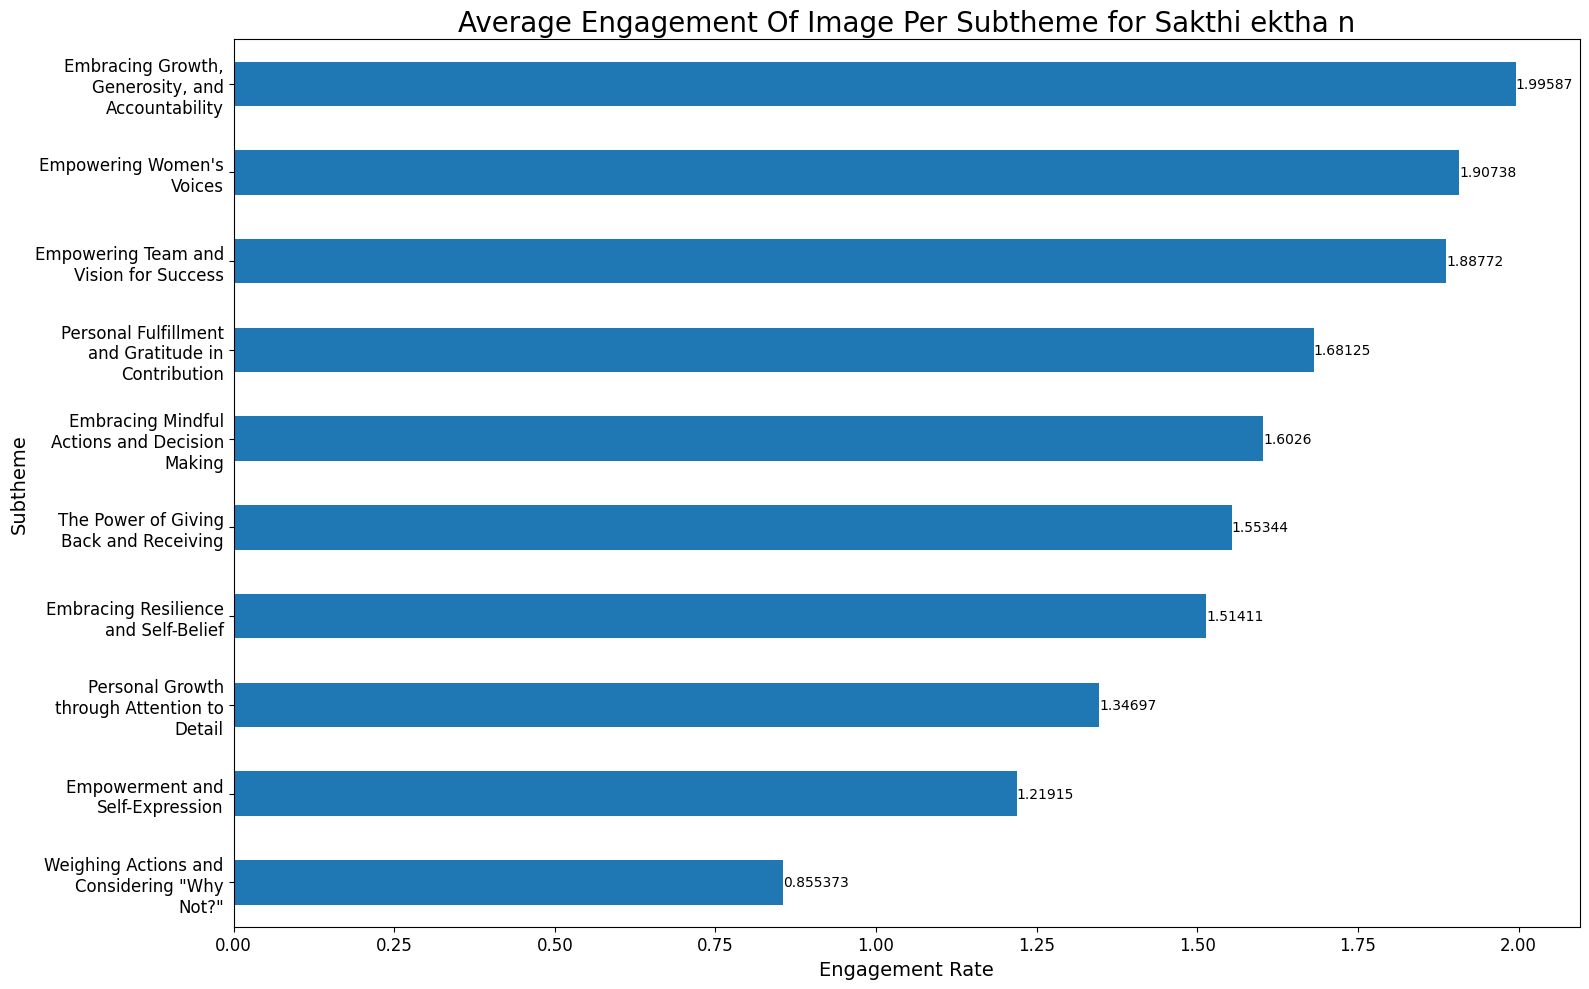

No data available for DataFrame df_Sakthi Ektha N_Video
No data available for DataFrame df_Sakthi Ektha N_ Image
No data available for DataFrame df_Sakthi Ektha N_Repost
No data available for DataFrame df_Sakthi Ektha N_image
No data available for DataFrame df_Sakthi Ektha N_Link
No data available for DataFrame df_Sakthi Ektha N_Carousels
No data available for DataFrame df_Sakthi Ektha N_Text
No data available for DataFrame df_Sakthi Ektha N_Carousel
No data available for DataFrame df_Aaina Chopra_IMAGE
No data available for DataFrame df_Aaina Chopra_VIDEO
No data available for DataFrame df_Aaina Chopra_nan


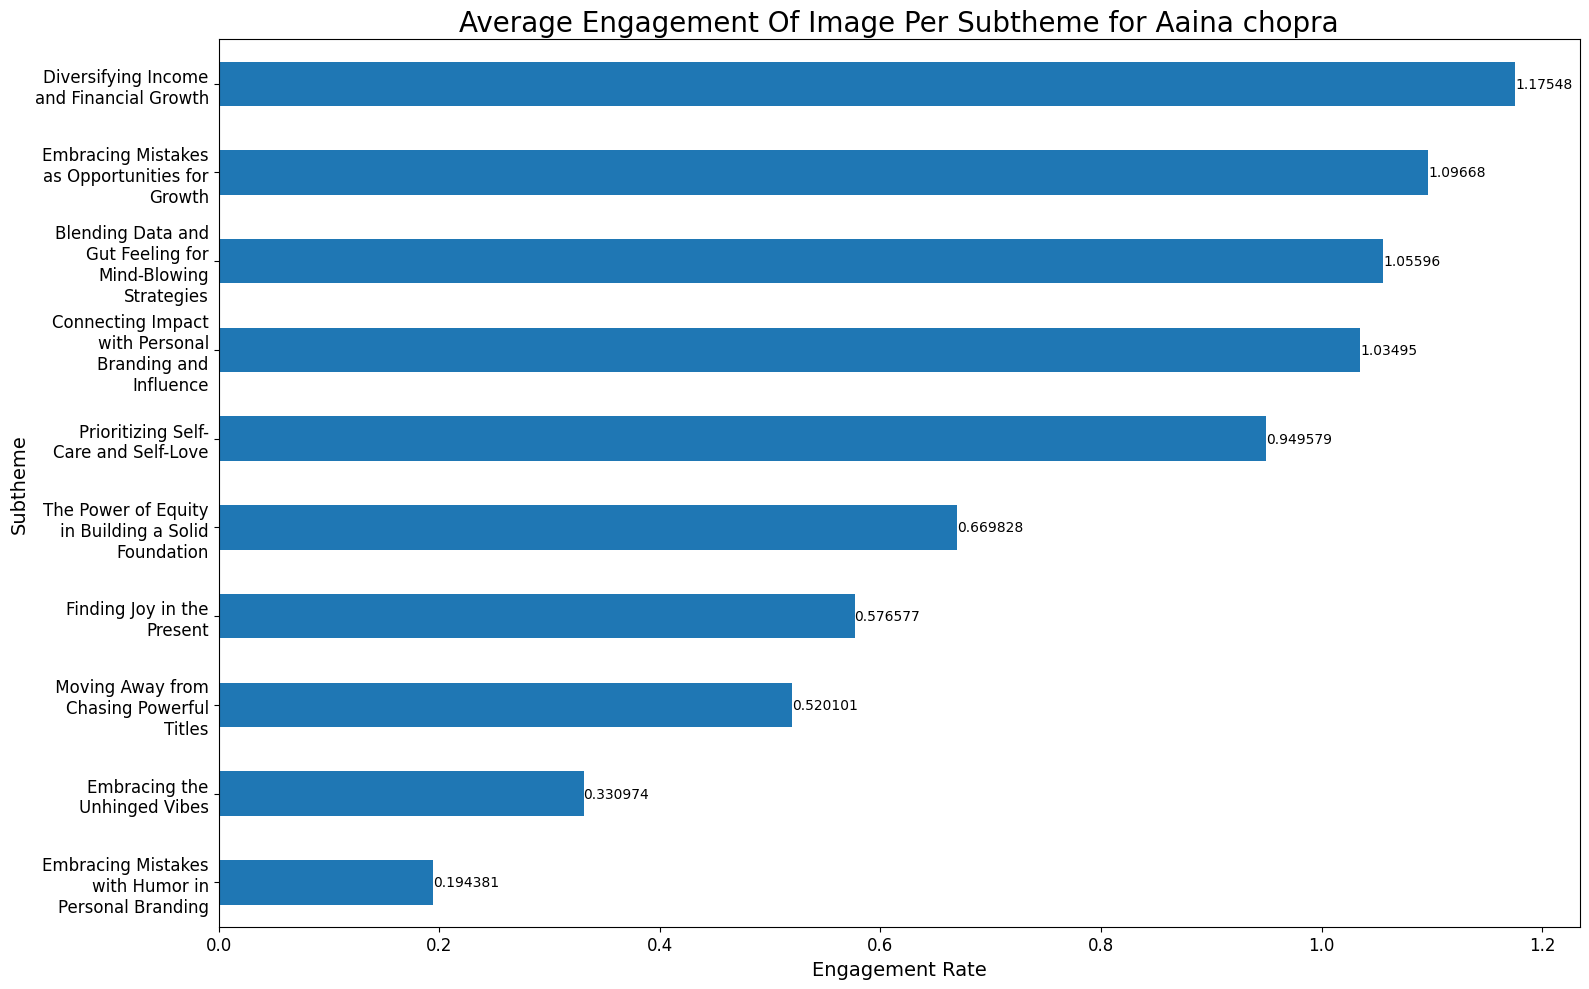

No data available for DataFrame df_Aaina Chopra_Video
No data available for DataFrame df_Aaina Chopra_ Image
No data available for DataFrame df_Aaina Chopra_Repost
No data available for DataFrame df_Aaina Chopra_image
No data available for DataFrame df_Aaina Chopra_Link
No data available for DataFrame df_Aaina Chopra_Carousels
No data available for DataFrame df_Aaina Chopra_Text
No data available for DataFrame df_Aaina Chopra_Carousel
No data available for DataFrame df_Ketaki Mehta_IMAGE
No data available for DataFrame df_Ketaki Mehta_VIDEO
No data available for DataFrame df_Ketaki Mehta_nan


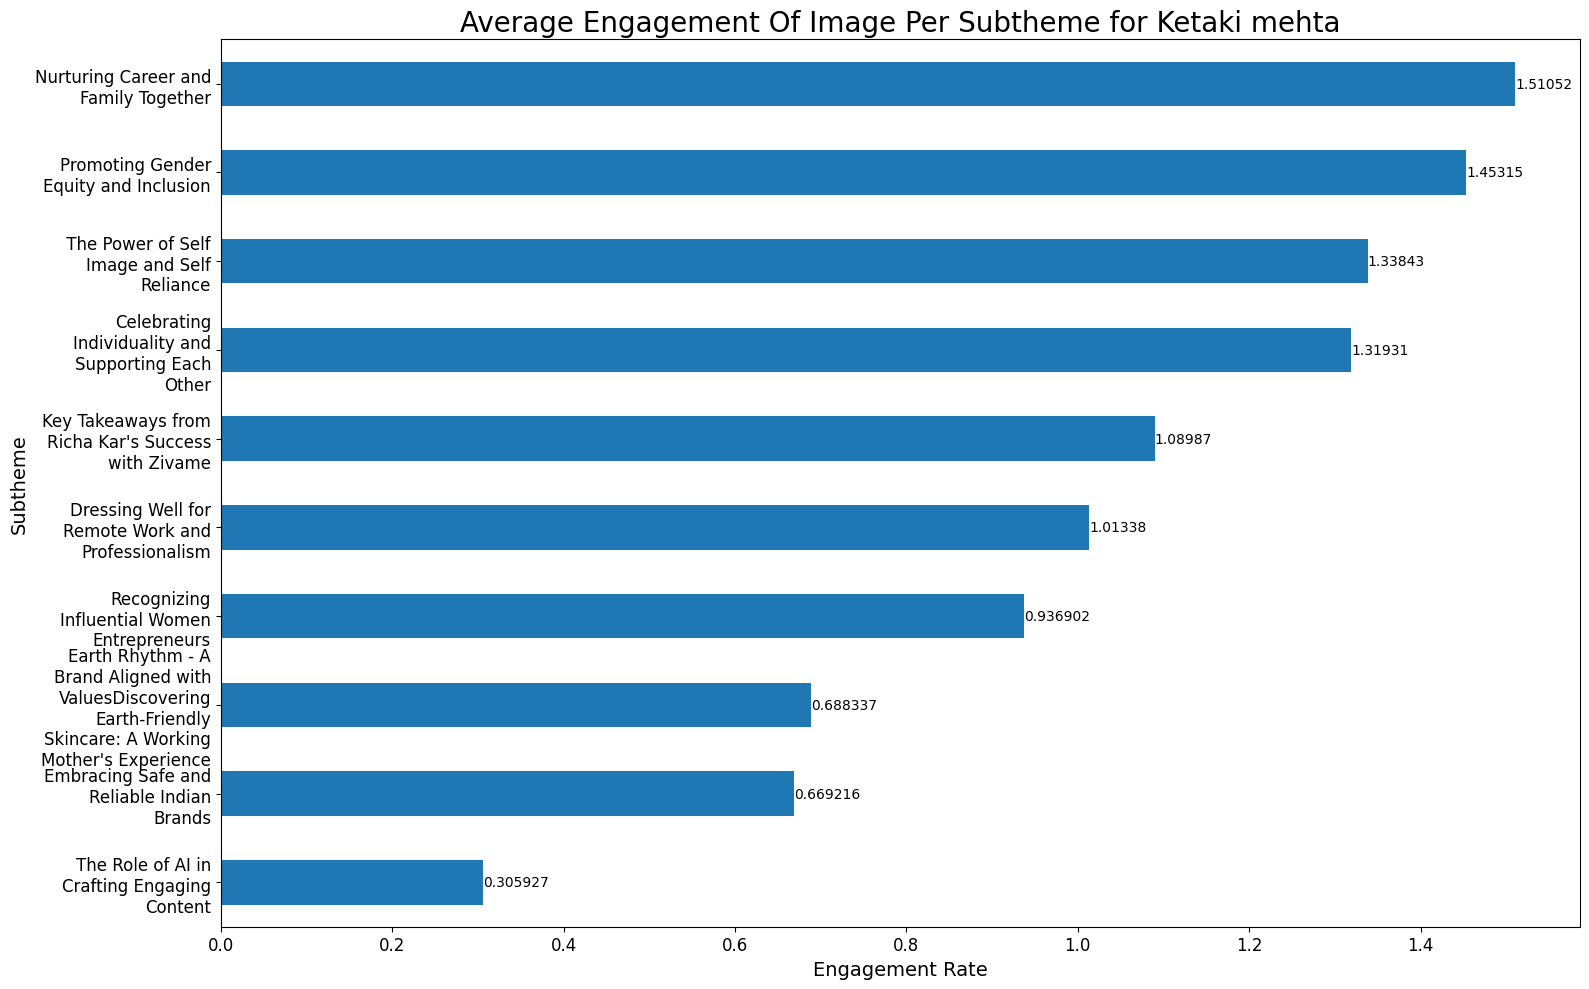

No data available for DataFrame df_Ketaki Mehta_Video


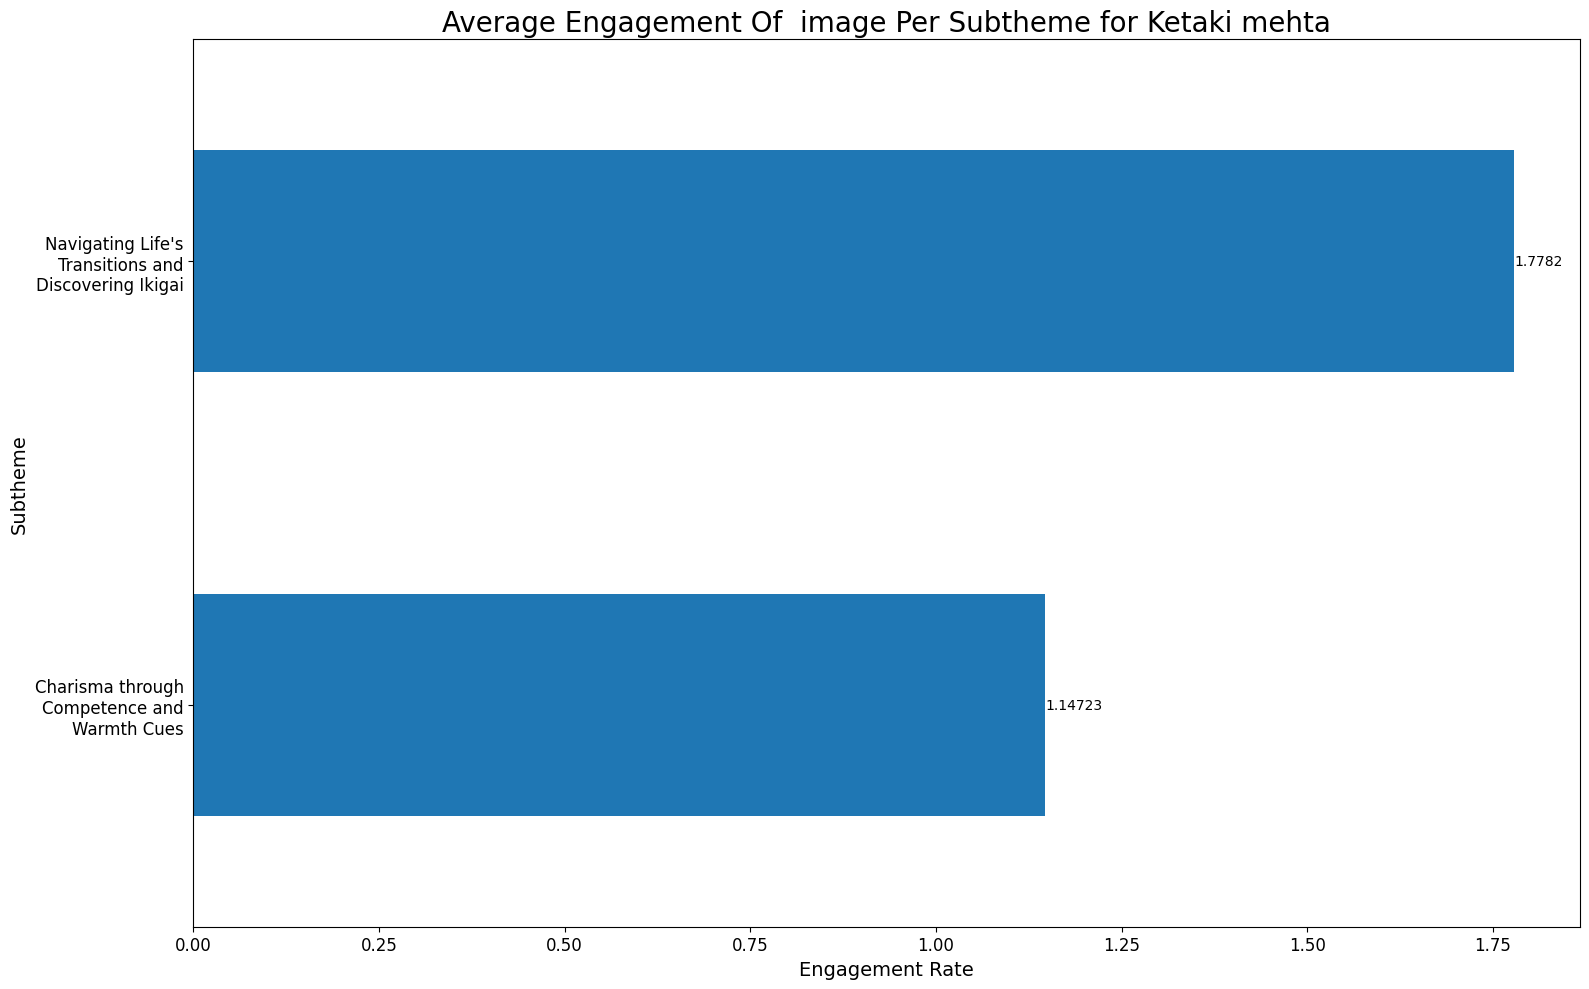

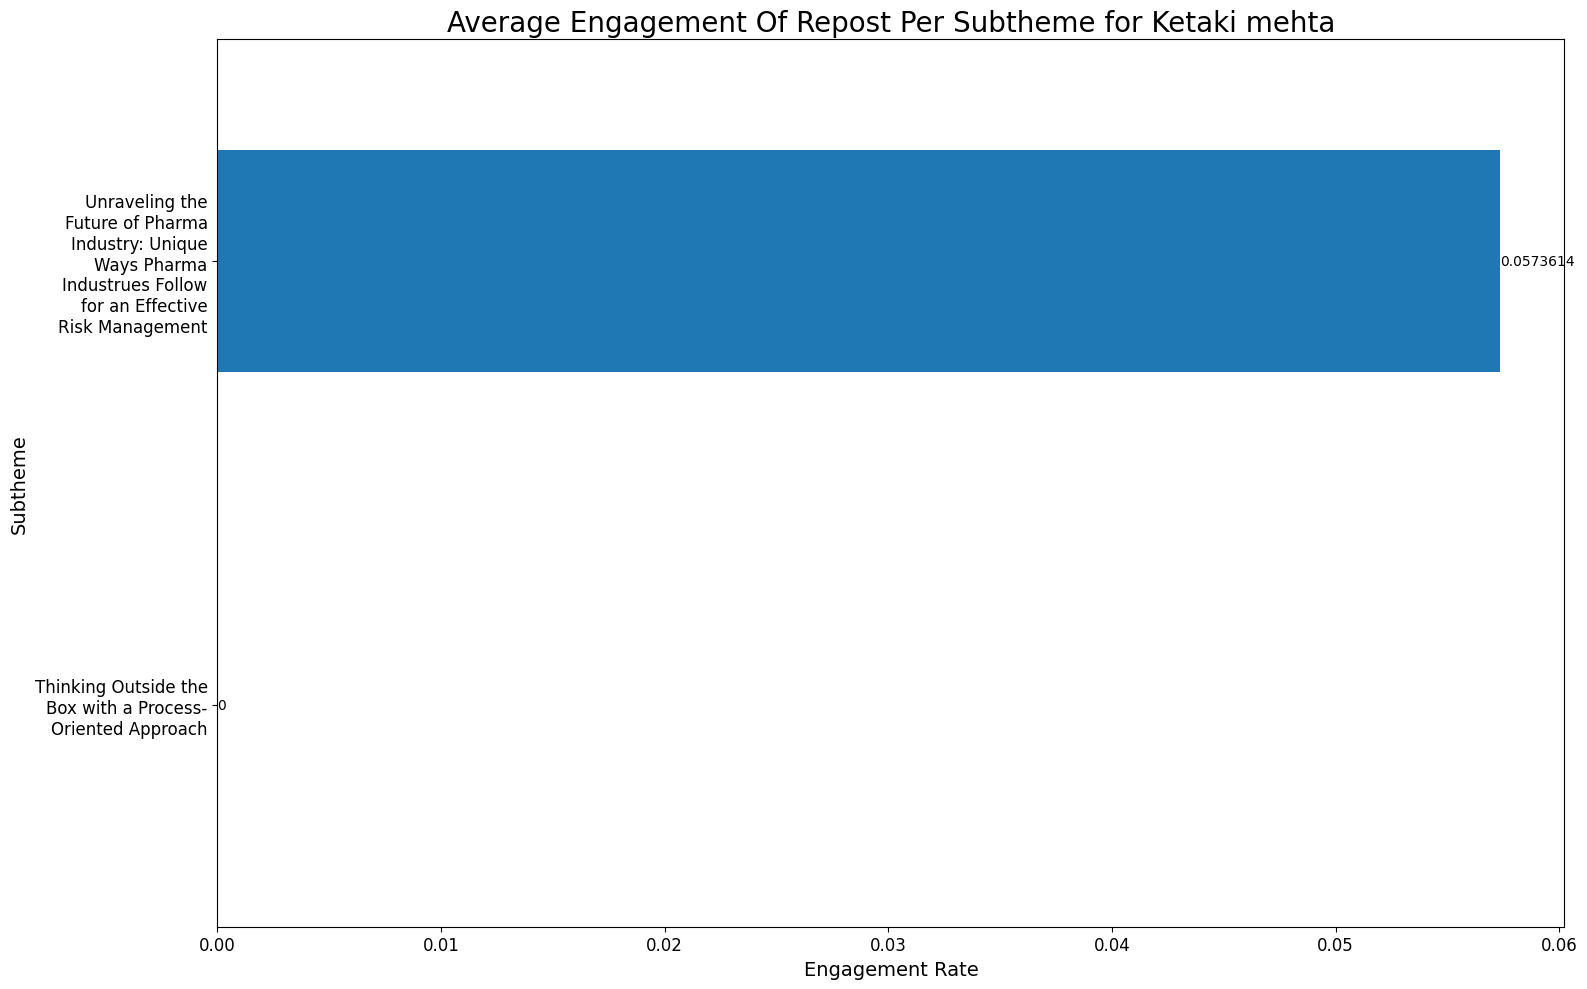

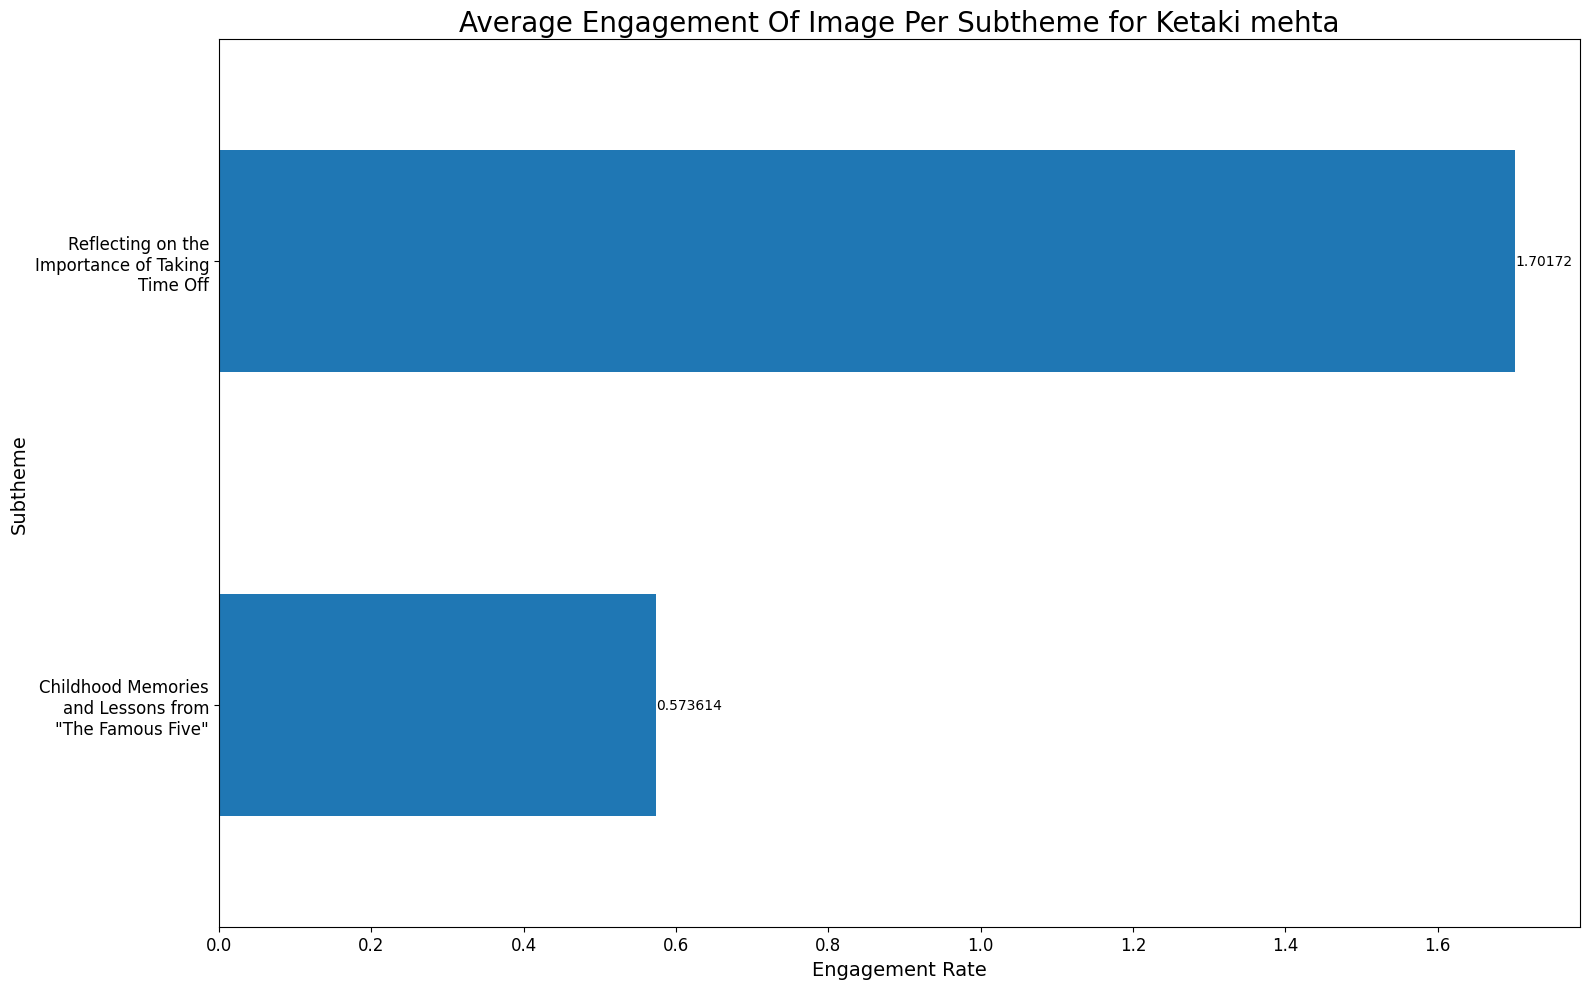

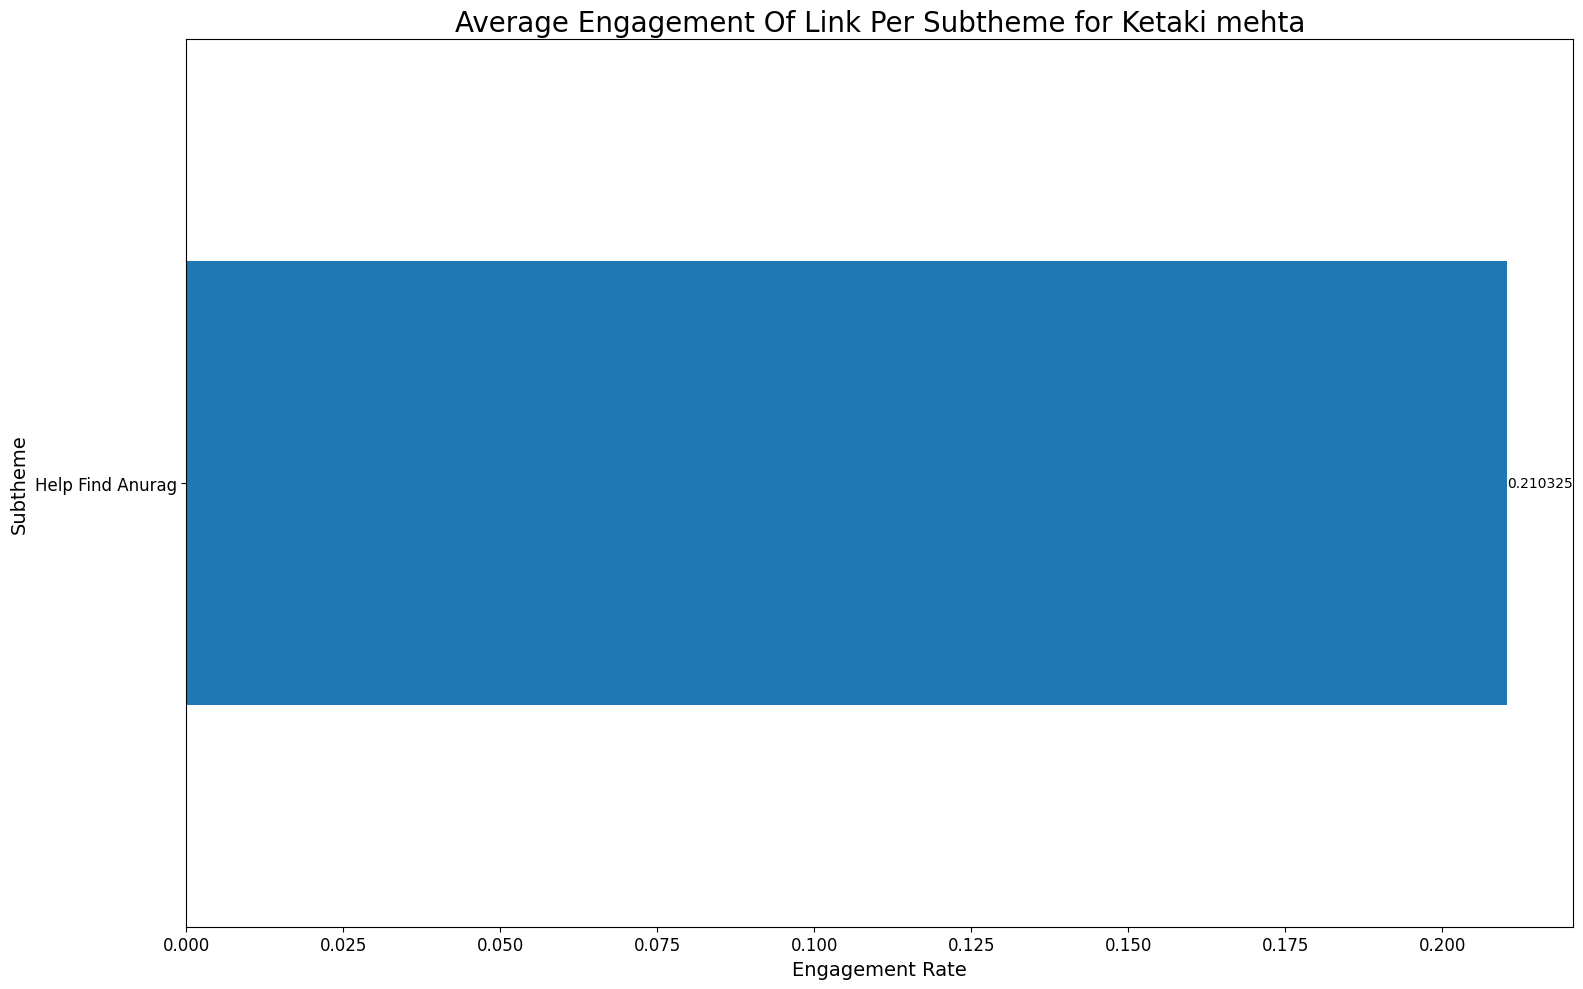

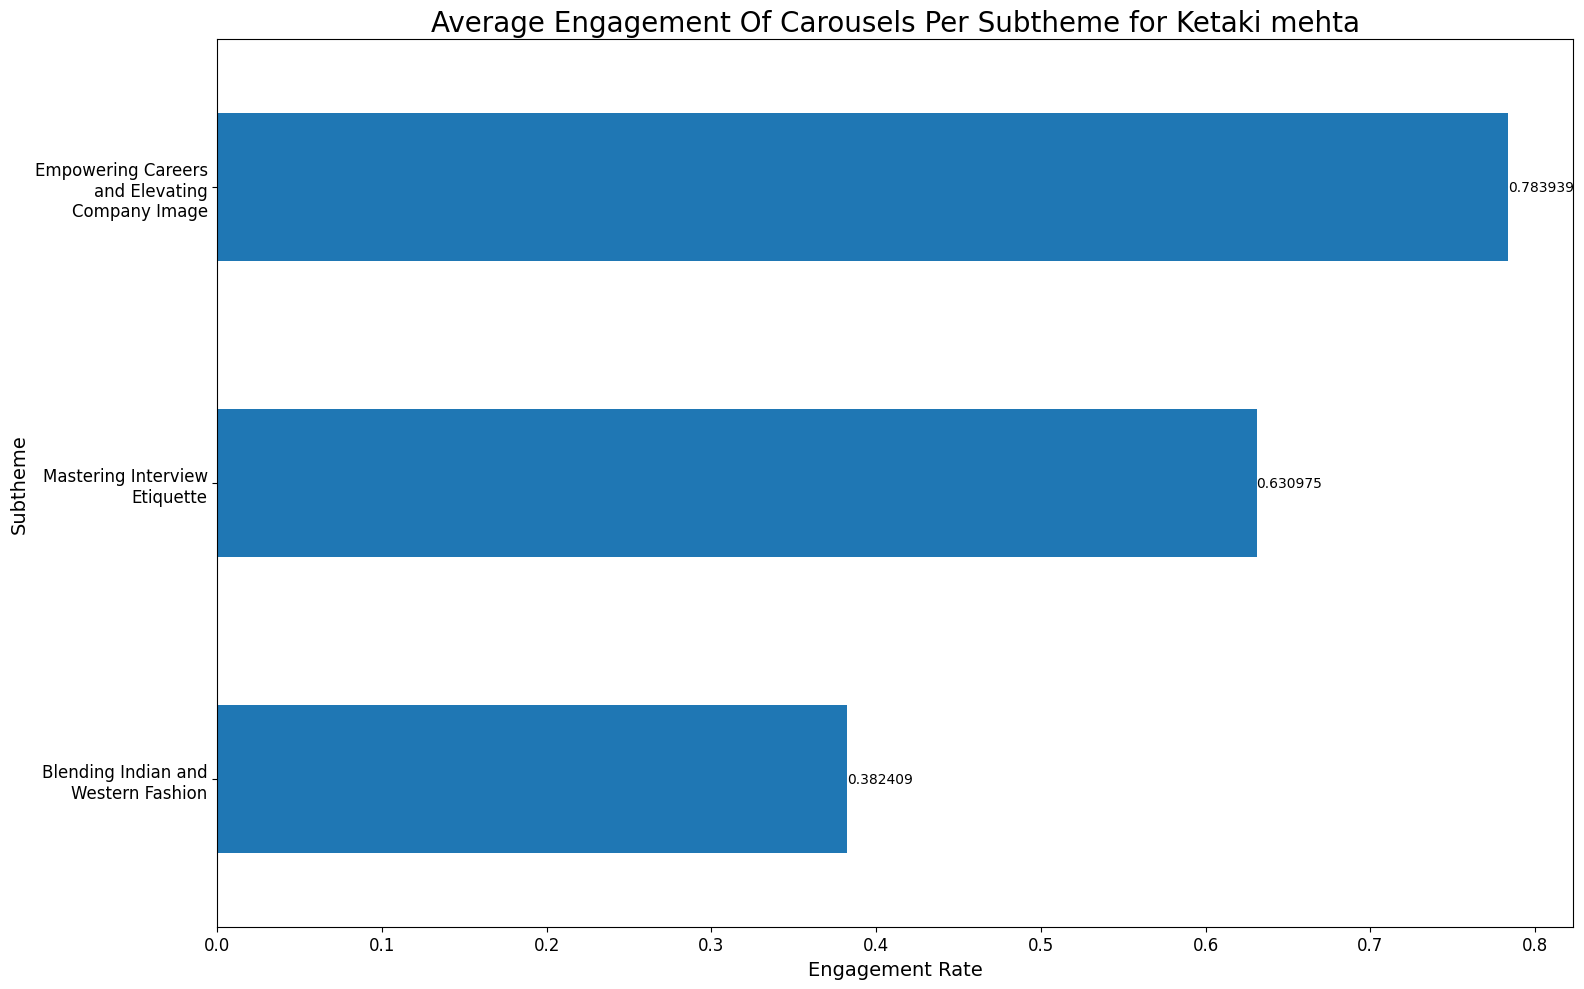

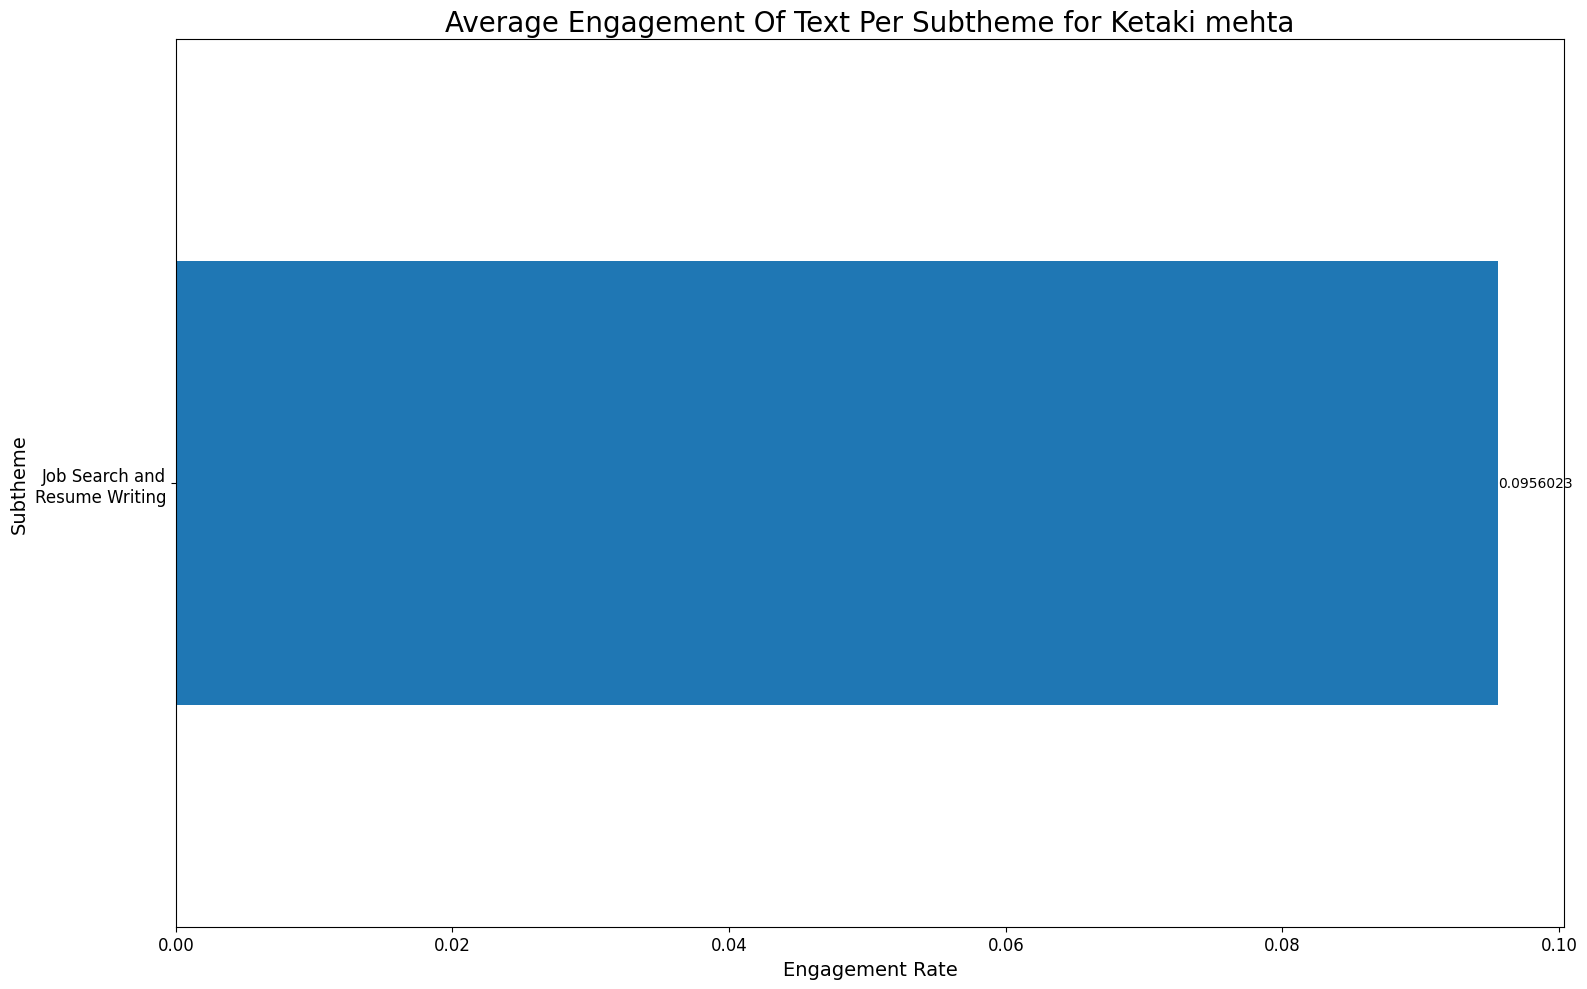

No data available for DataFrame df_Ketaki Mehta_Carousel
No data available for DataFrame df_Anushka Rathore_IMAGE
No data available for DataFrame df_Anushka Rathore_VIDEO
No data available for DataFrame df_Anushka Rathore_nan
No data available for DataFrame df_Anushka Rathore_Image
No data available for DataFrame df_Anushka Rathore_Video
No data available for DataFrame df_Anushka Rathore_ Image
No data available for DataFrame df_Anushka Rathore_Repost
No data available for DataFrame df_Anushka Rathore_image
No data available for DataFrame df_Anushka Rathore_Link
No data available for DataFrame df_Anushka Rathore_Carousels
No data available for DataFrame df_Anushka Rathore_Text
No data available for DataFrame df_Anushka Rathore_Carousel
No data available for DataFrame df_Shruti Tyagi_IMAGE
No data available for DataFrame df_Shruti Tyagi_VIDEO
No data available for DataFrame df_Shruti Tyagi_nan


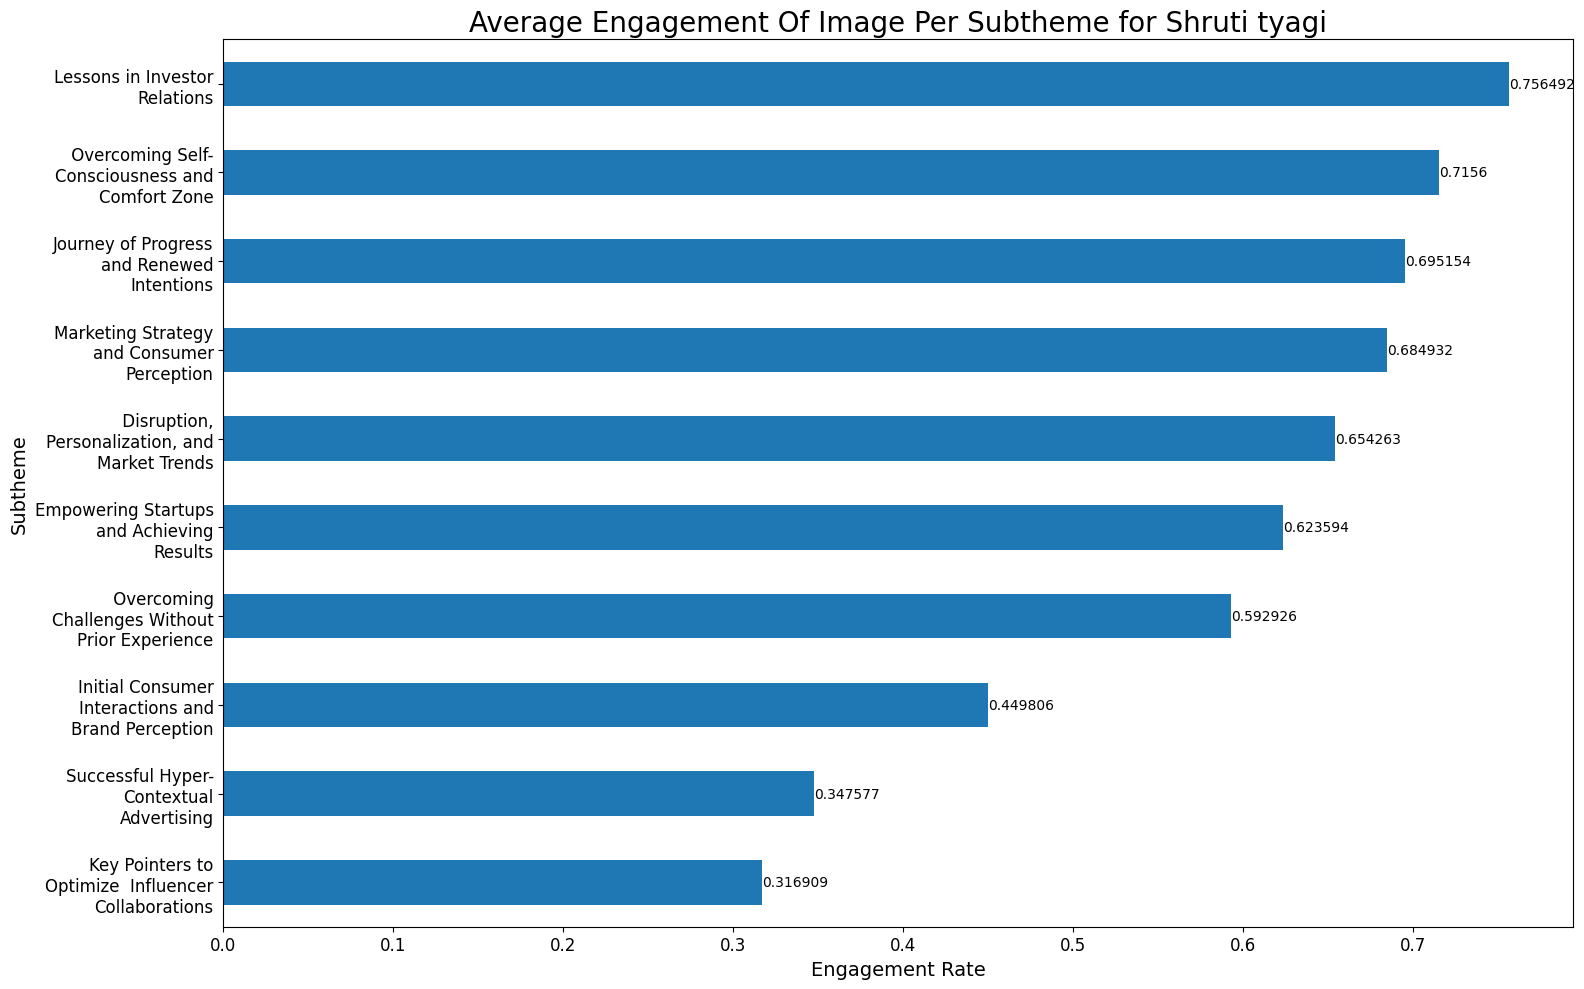

No data available for DataFrame df_Shruti Tyagi_Video
No data available for DataFrame df_Shruti Tyagi_ Image
No data available for DataFrame df_Shruti Tyagi_Repost
No data available for DataFrame df_Shruti Tyagi_image
No data available for DataFrame df_Shruti Tyagi_Link
No data available for DataFrame df_Shruti Tyagi_Carousels
No data available for DataFrame df_Shruti Tyagi_Text
No data available for DataFrame df_Shruti Tyagi_Carousel
No data available for DataFrame df_Pankhuri Gupta_IMAGE
No data available for DataFrame df_Pankhuri Gupta_VIDEO
No data available for DataFrame df_Pankhuri Gupta_nan


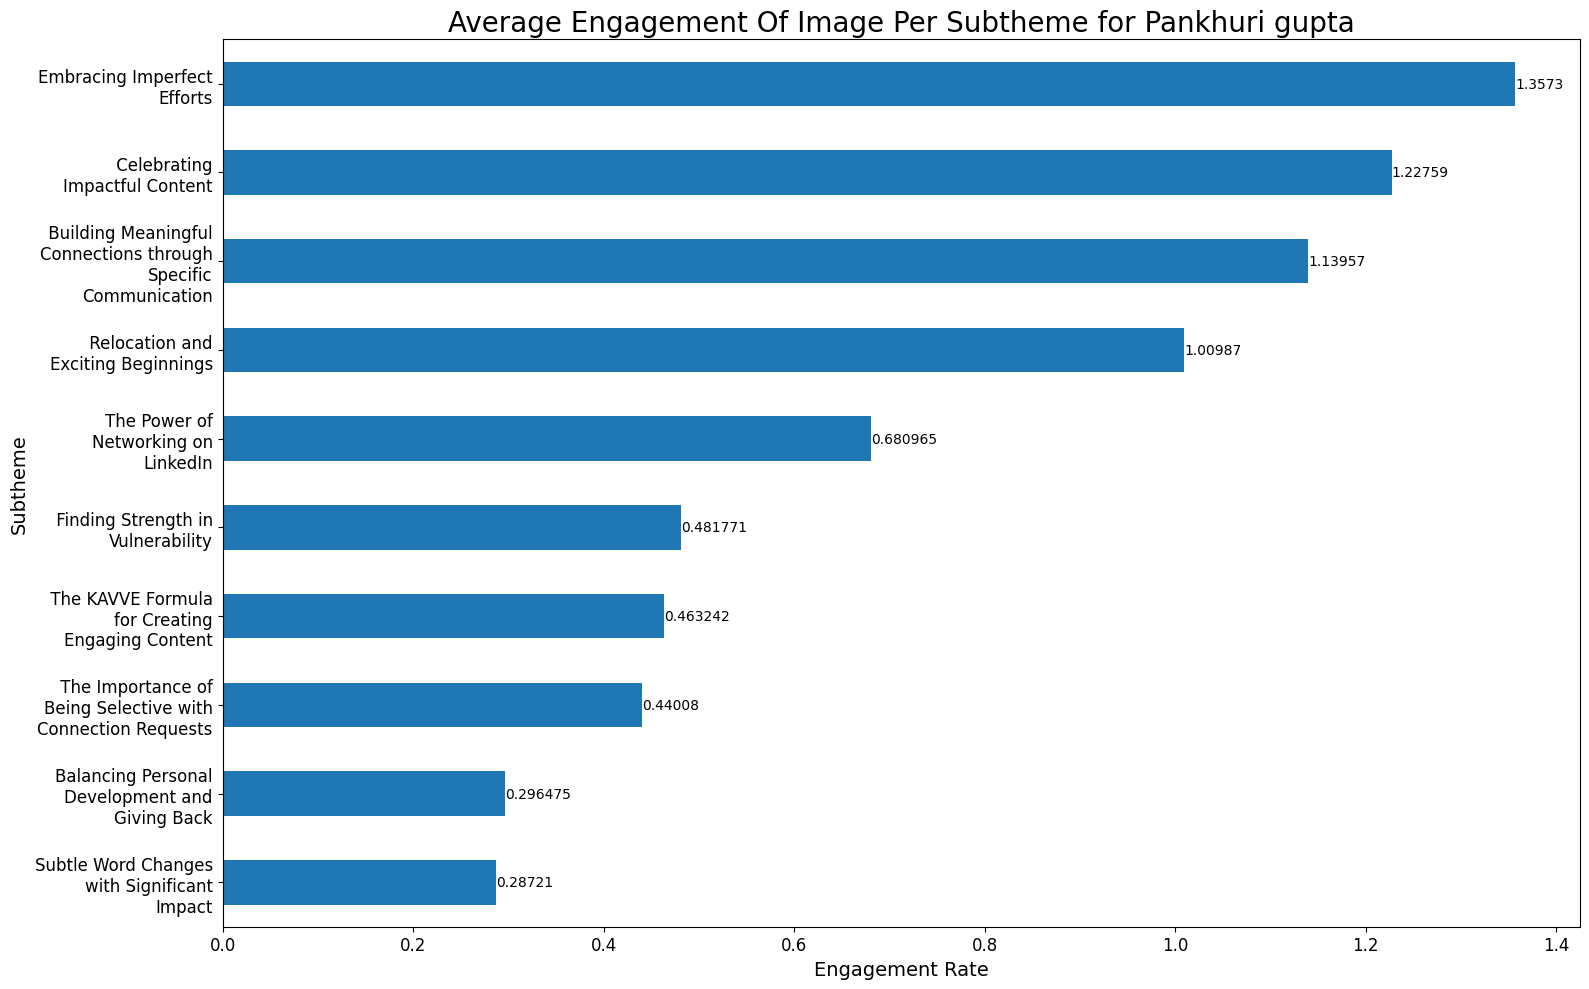

No data available for DataFrame df_Pankhuri Gupta_Video
No data available for DataFrame df_Pankhuri Gupta_ Image
No data available for DataFrame df_Pankhuri Gupta_Repost
No data available for DataFrame df_Pankhuri Gupta_image
No data available for DataFrame df_Pankhuri Gupta_Link
No data available for DataFrame df_Pankhuri Gupta_Carousels


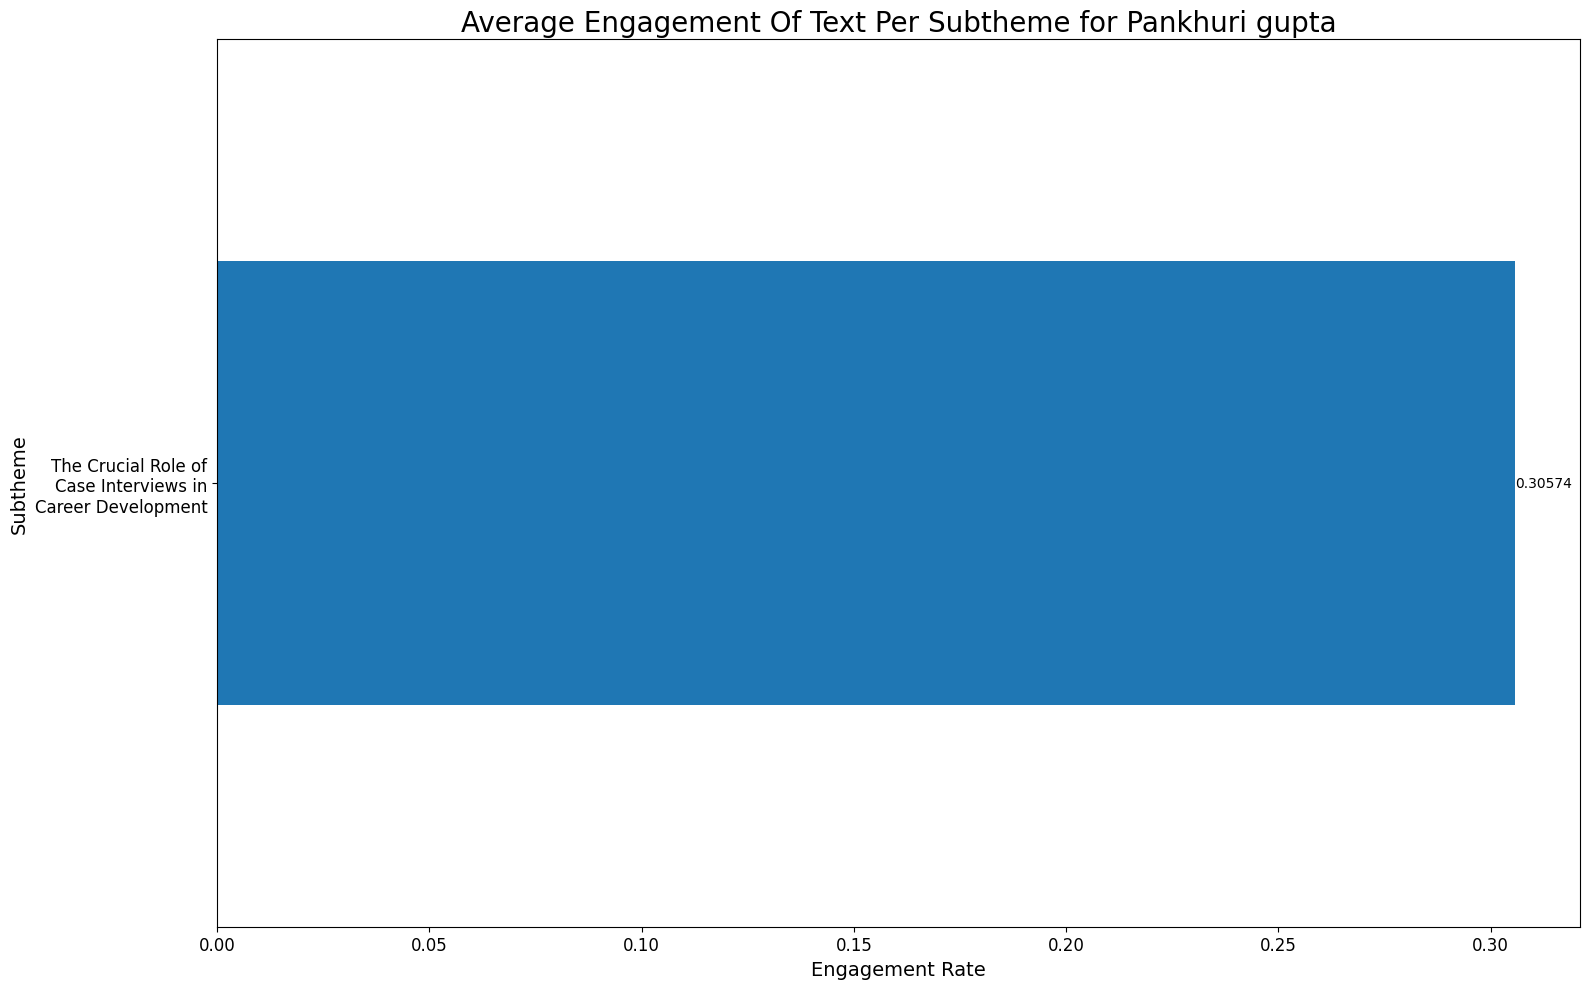

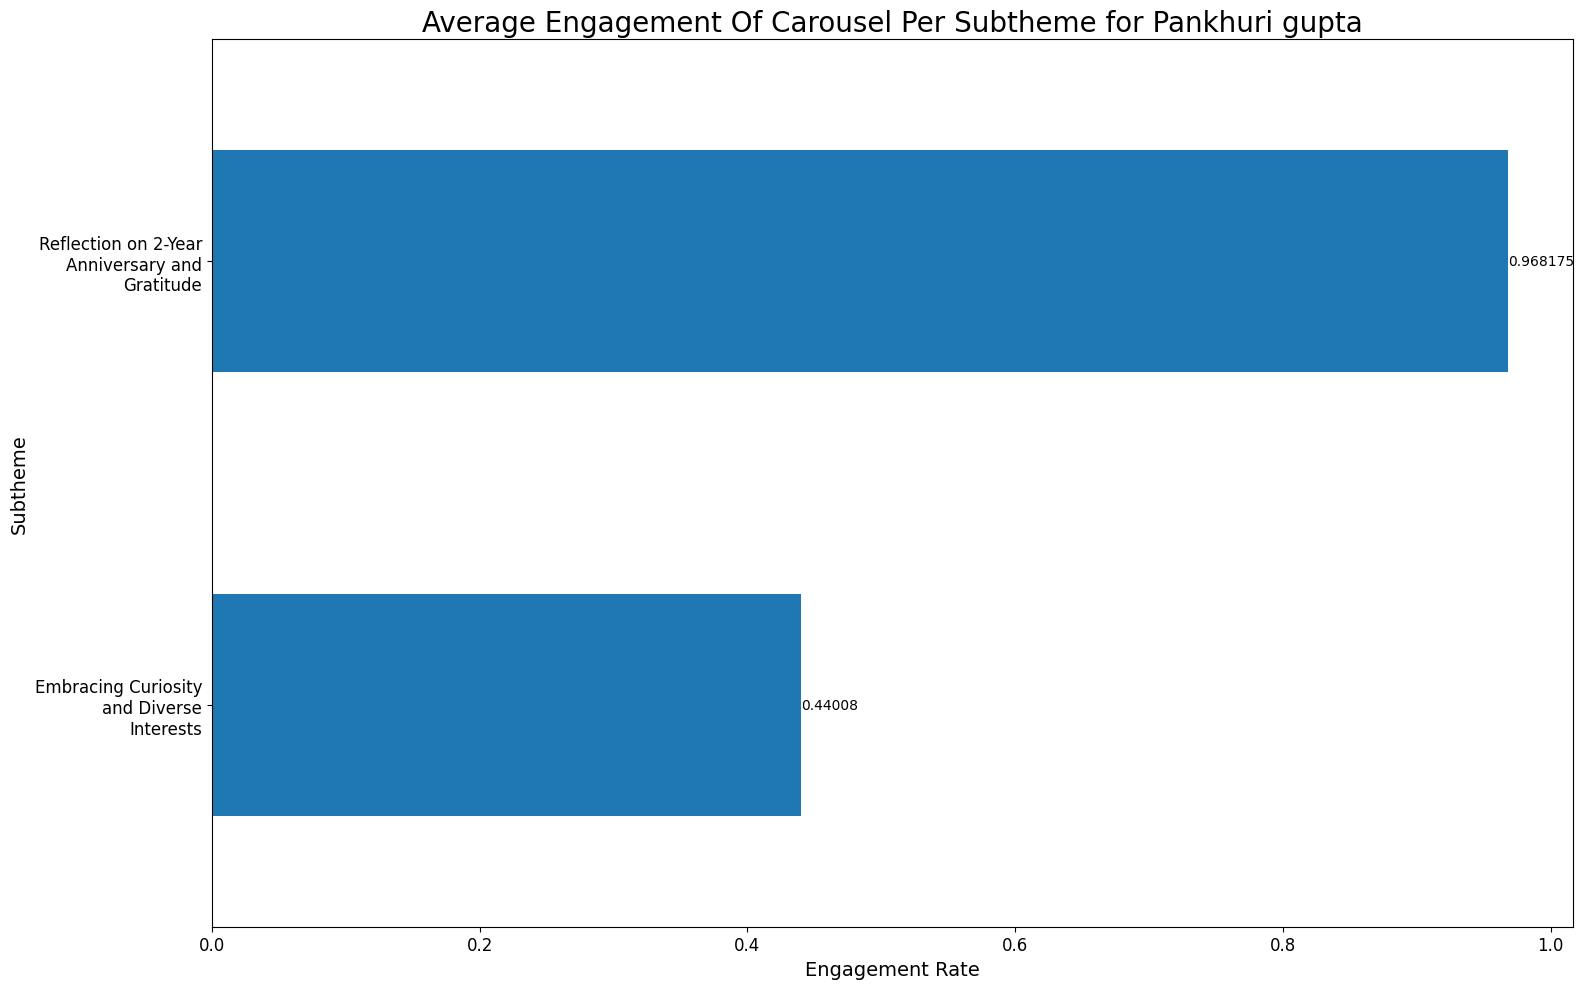

No data available for DataFrame df_Manish Pandey_IMAGE
No data available for DataFrame df_Manish Pandey_VIDEO
No data available for DataFrame df_Manish Pandey_nan


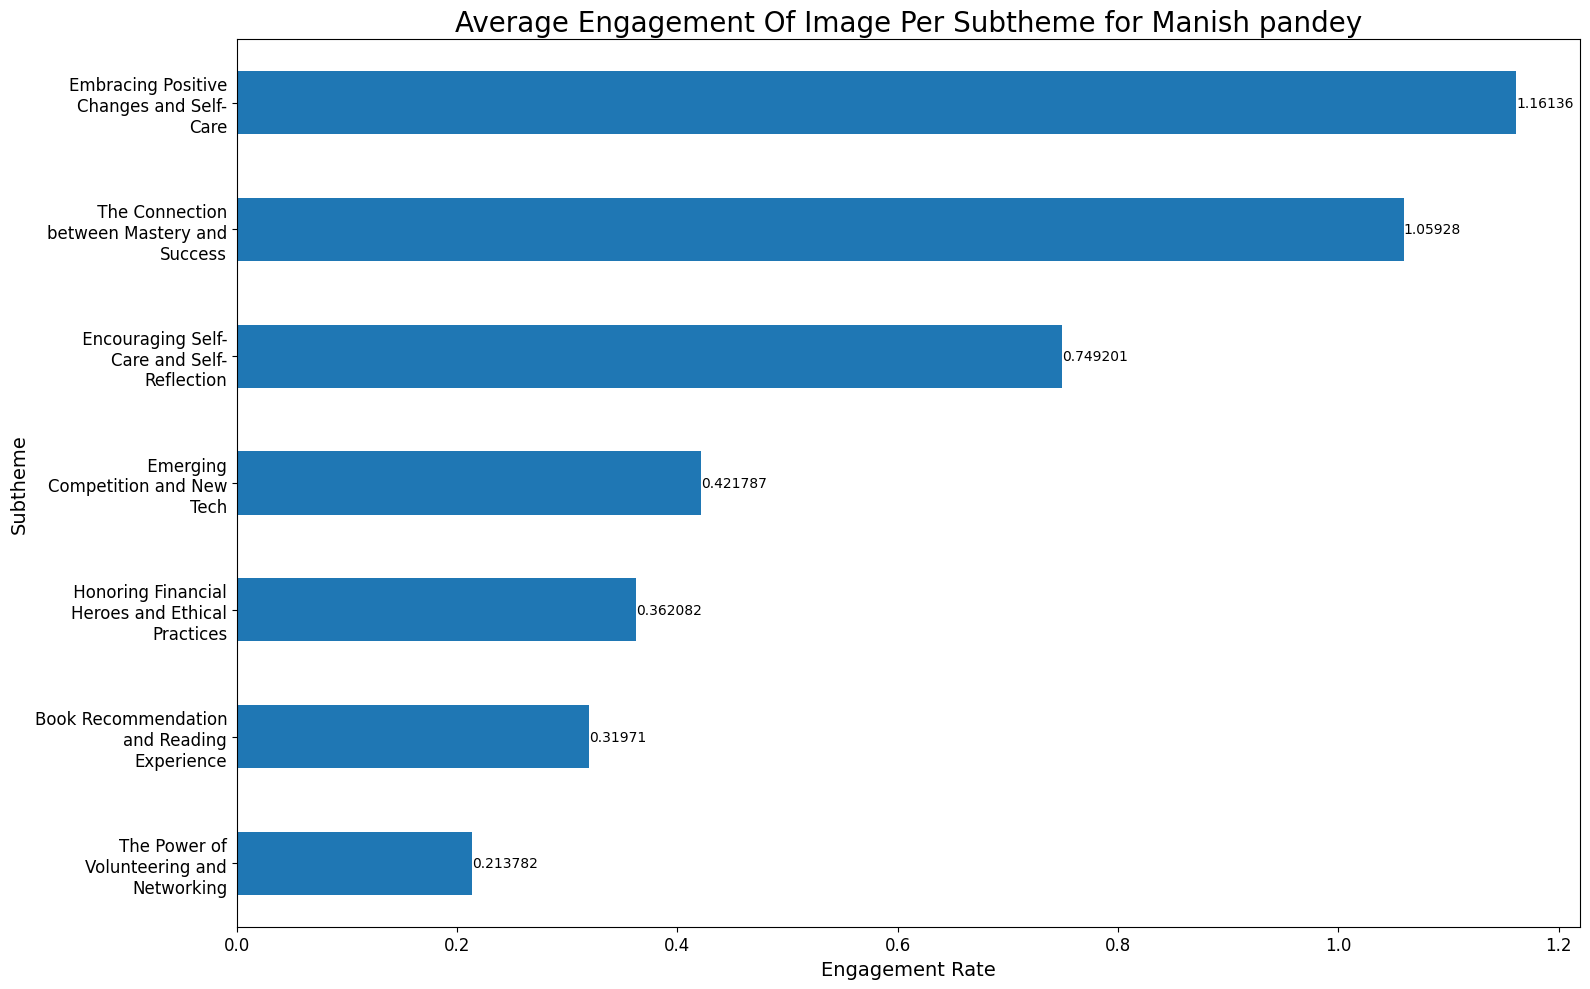

No data available for DataFrame df_Manish Pandey_Video
No data available for DataFrame df_Manish Pandey_ Image
No data available for DataFrame df_Manish Pandey_Repost
No data available for DataFrame df_Manish Pandey_image


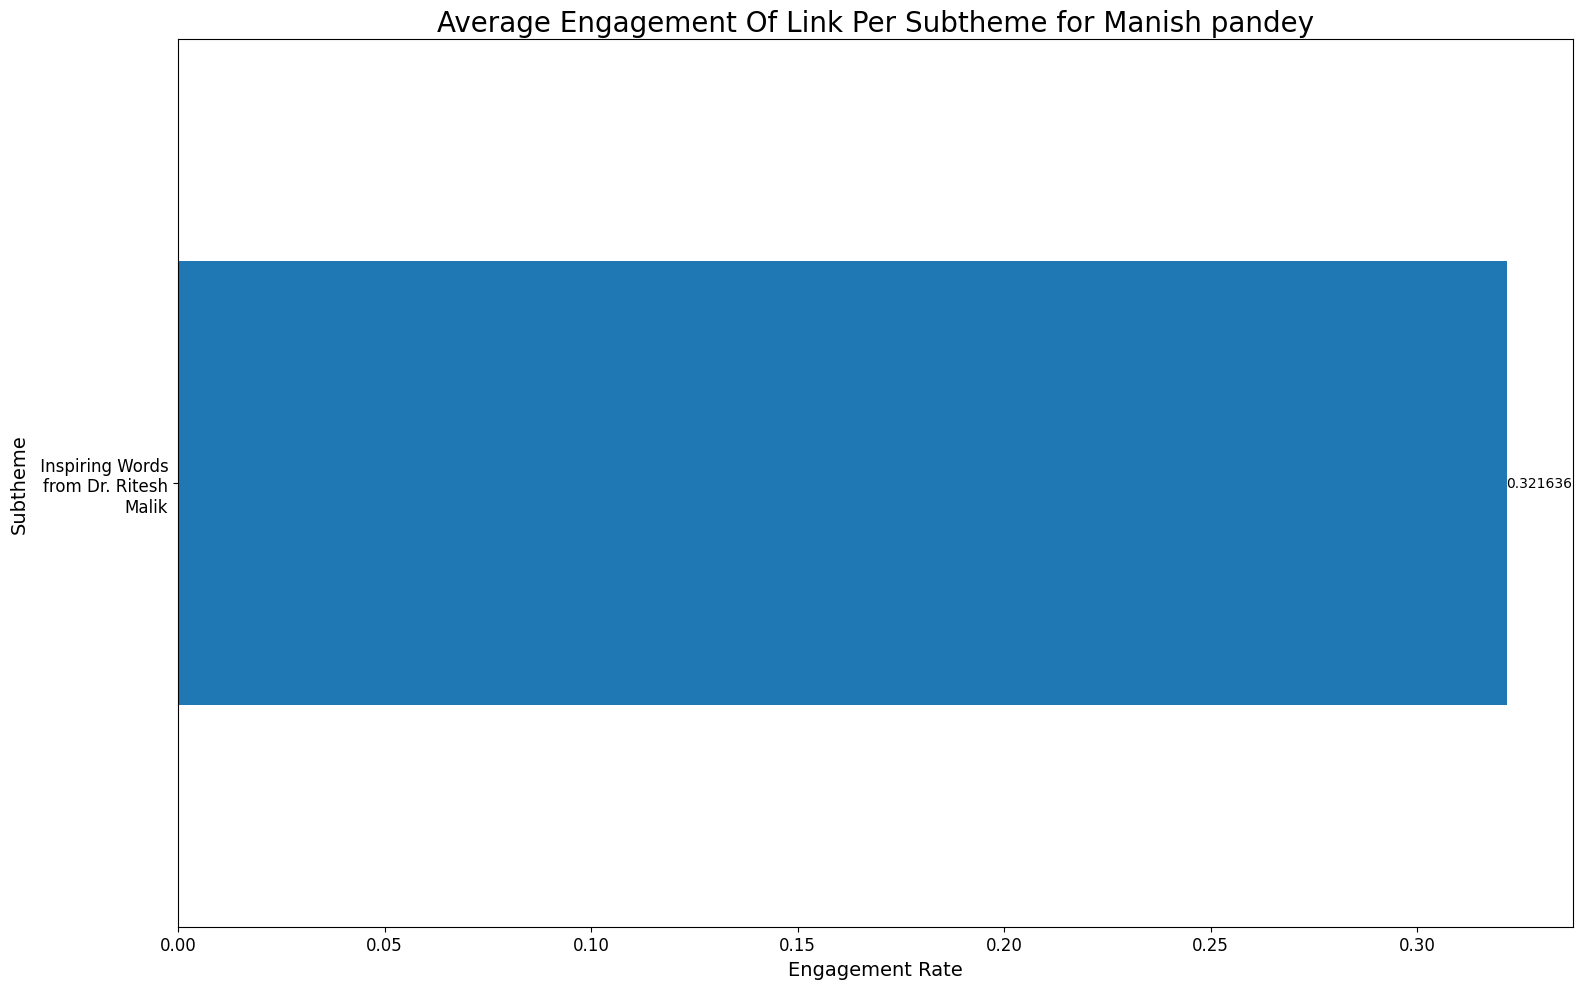

No data available for DataFrame df_Manish Pandey_Carousels


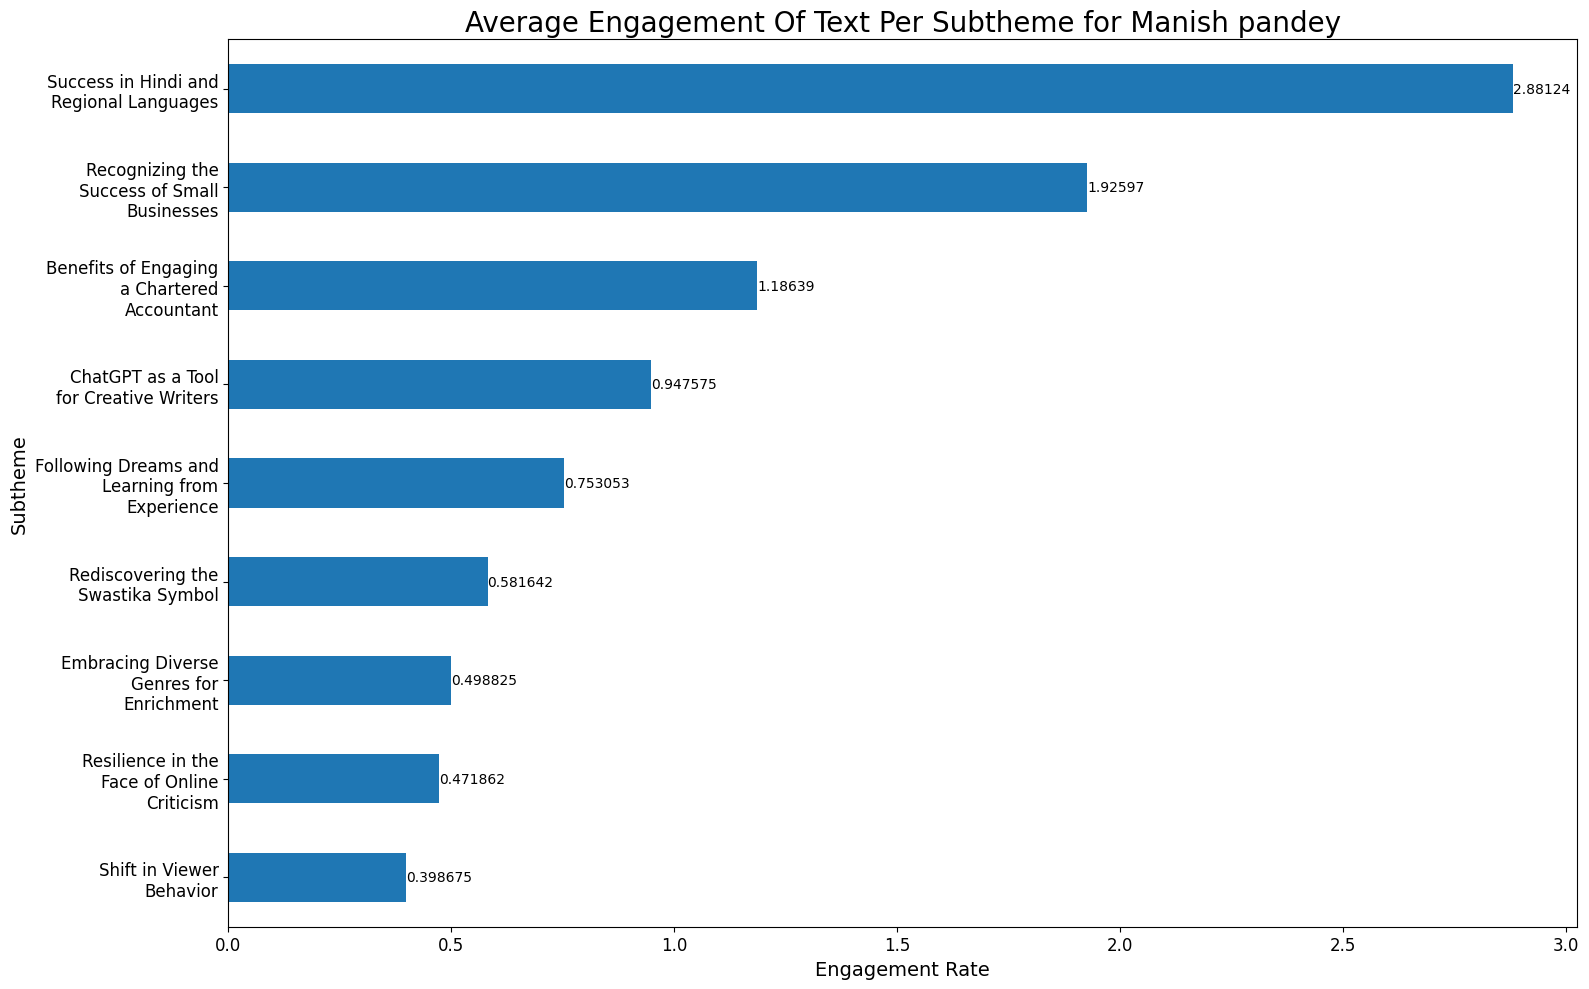

No data available for DataFrame df_Manish Pandey_Carousel
No data available for DataFrame df_Saakshi Jadhav_IMAGE
No data available for DataFrame df_Saakshi Jadhav_VIDEO
No data available for DataFrame df_Saakshi Jadhav_nan
No data available for DataFrame df_Saakshi Jadhav_Image
No data available for DataFrame df_Saakshi Jadhav_Video
No data available for DataFrame df_Saakshi Jadhav_ Image
No data available for DataFrame df_Saakshi Jadhav_Repost
No data available for DataFrame df_Saakshi Jadhav_image
No data available for DataFrame df_Saakshi Jadhav_Link
No data available for DataFrame df_Saakshi Jadhav_Carousels
No data available for DataFrame df_Saakshi Jadhav_Text
No data available for DataFrame df_Saakshi Jadhav_Carousel


In [41]:
import textwrap

df_names = list(dfs_by_username_format.keys())

for df_name in df_names:
    if df_name in dfs_by_username_format:
        df = dfs_by_username_format[df_name]

        _, username, format_name = df_name.split('_')

        title = f'Average Engagement Of {format_name.capitalize()} Per Subtheme for {username.capitalize()}'

        if not df.empty:
            df_mean = df.groupby('Subtheme')['Engagement Rate'].mean().sort_values(ascending=True) #Change "Subtheme" and "Engagement Rate" to desired columns for creating other plots

            top_10 = df_mean.head(10)

            fig, ax = plt.subplots(figsize=(16, 10))
            top_10.plot(kind='barh', ax=ax)

            for container in ax.containers:
                ax.bar_label(container)

            plt.title(title, fontsize=20)
            plt.xlabel('Engagement Rate', fontsize=14)
            plt.ylabel('Subtheme', fontsize=14)

            ax.set_yticklabels([textwrap.fill(label.get_text(), 20) for label in ax.get_yticklabels()])

            ax.tick_params(axis='y', labelsize=12)

            ax.tick_params(axis='x', labelsize=12)

            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for DataFrame {df_name}")
    else:
        print(f"DataFrame {df_name} not found.")


In [ ]:
from datetime import datetime

result_df['Timestamp IST'] = result_df['Timestamp IST'].apply(lambda x: x.replace(' IST', ''))
result_df['Timestamp IST'] = pd.to_datetime(result_df['Timestamp IST'], format='%a, %d %b %Y %I:%M:%S %p')

In [50]:
result_df = result_df.sort_values(by=['Competitor Name', 'Timestamp IST'])

# Reset the index if needed
result_df.reset_index(drop=True, inplace=True)

In [ ]:
!pip install waterfallcharts

In [117]:
import waterfall_chart

In [118]:
competitor_dataframes = {}
for competitor, group in result_df.groupby('Competitor Name'):
    competitor_dataframes[competitor] = group.drop(columns=['Competitor Name'])

<Figure size 1500x900 with 0 Axes>

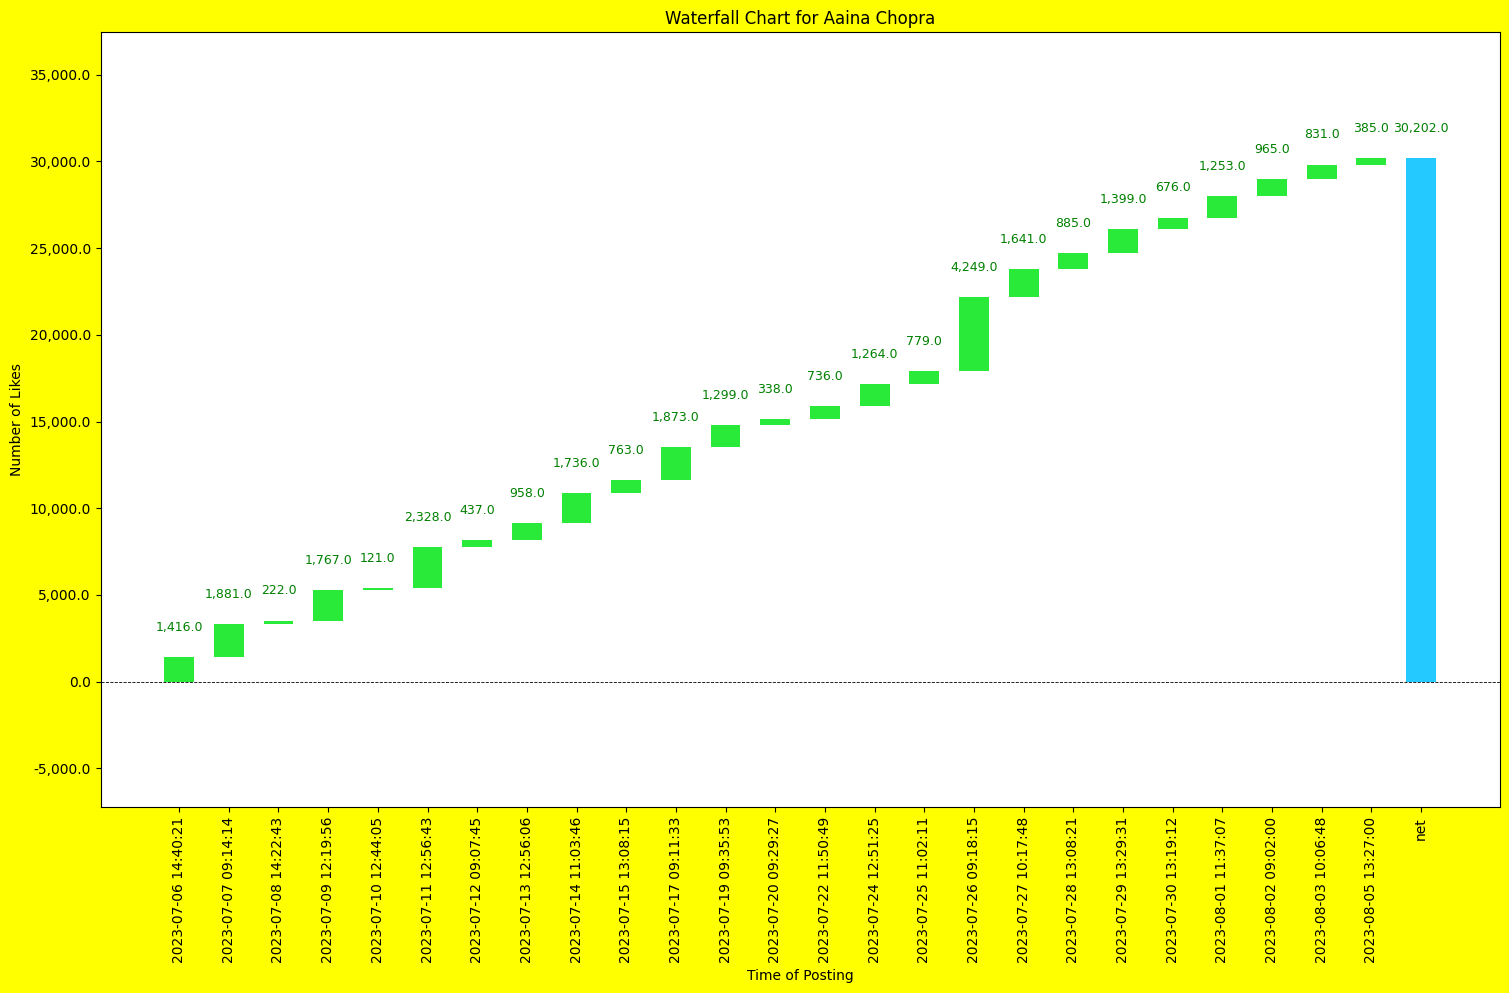

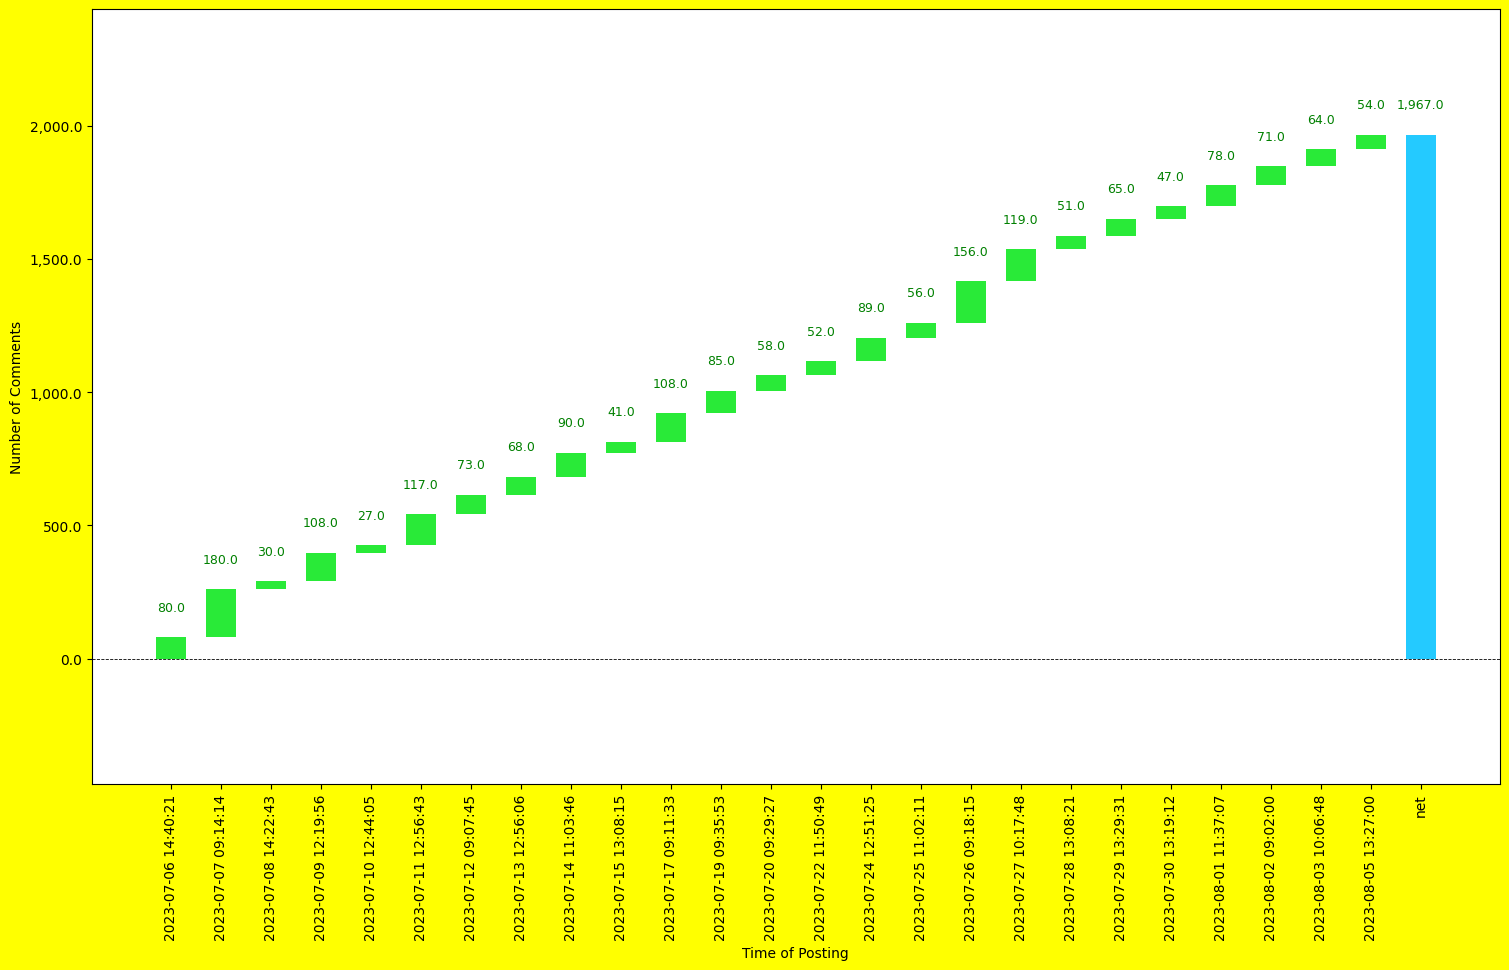

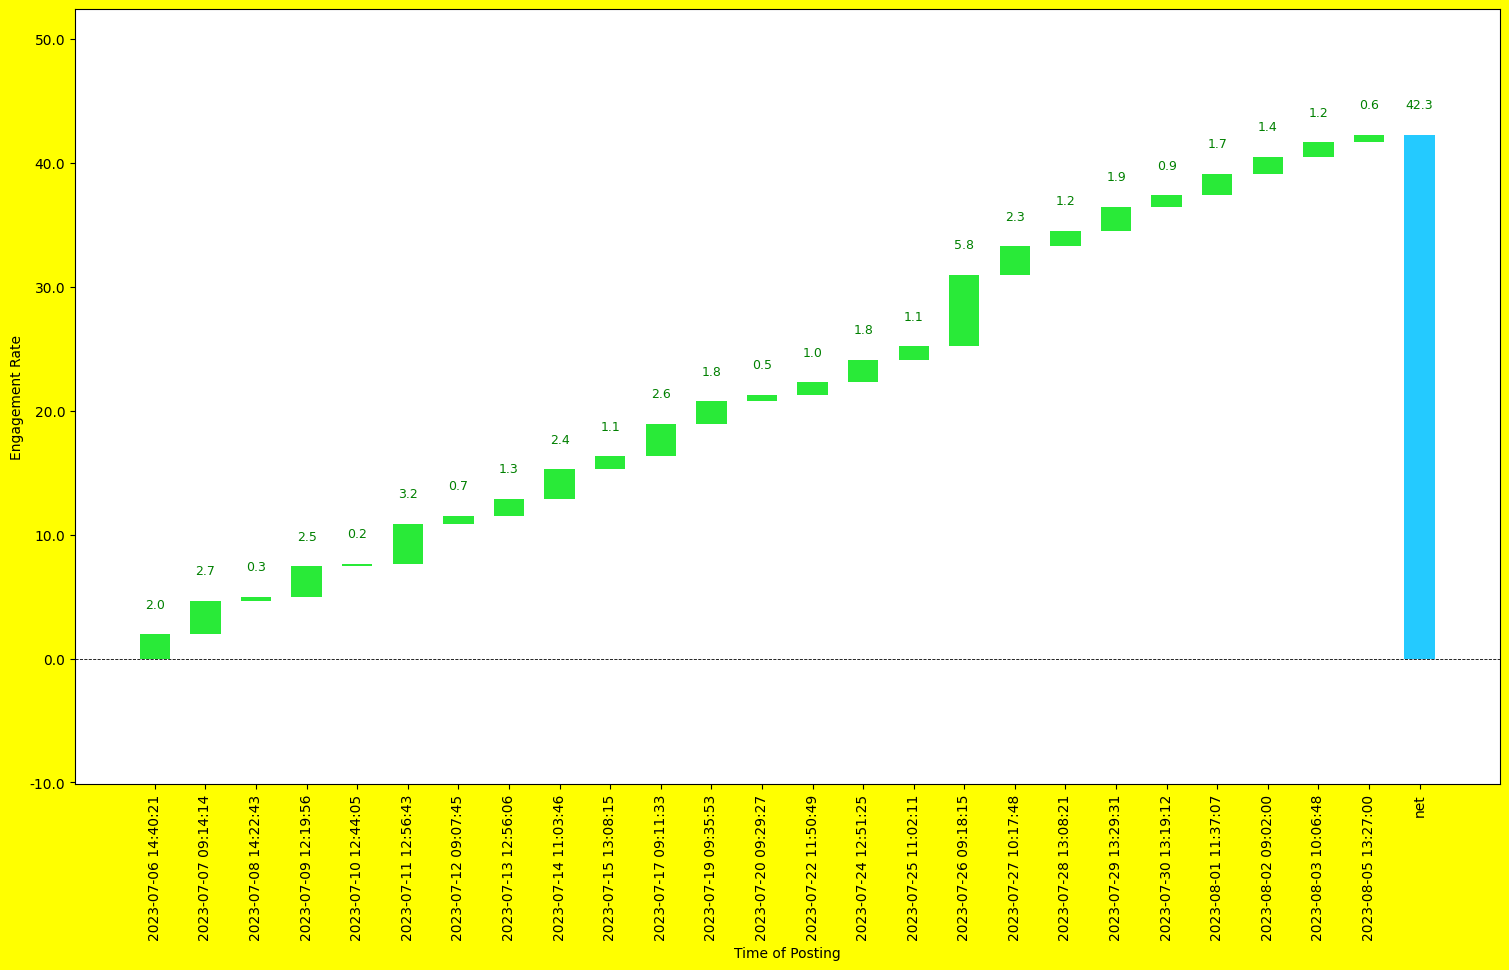

<Figure size 1500x900 with 0 Axes>

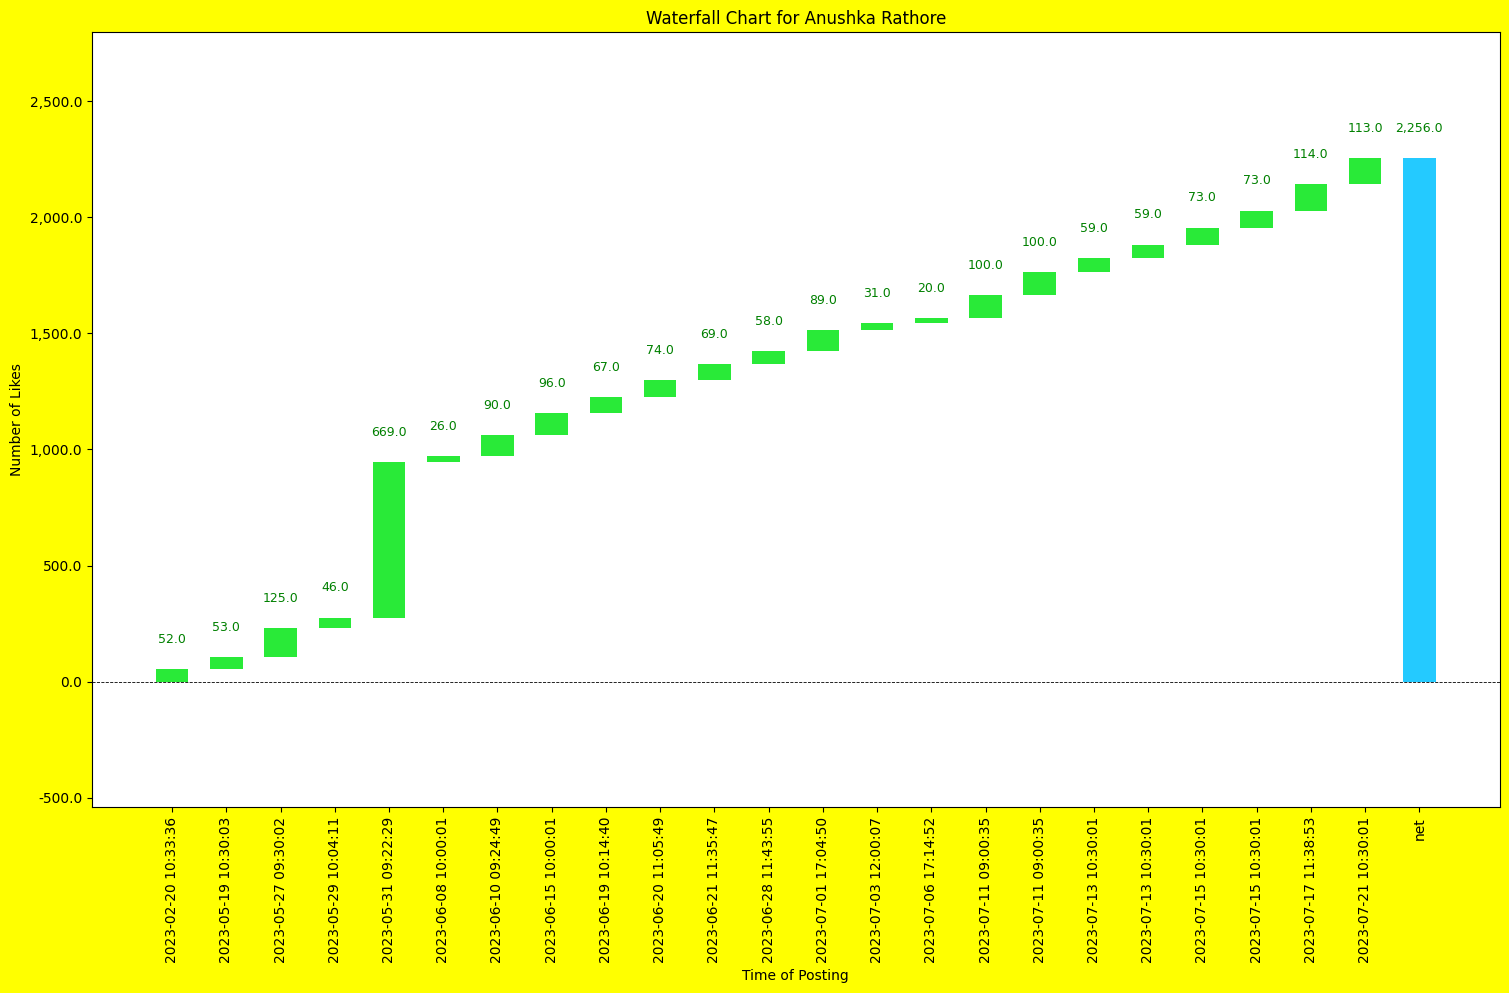

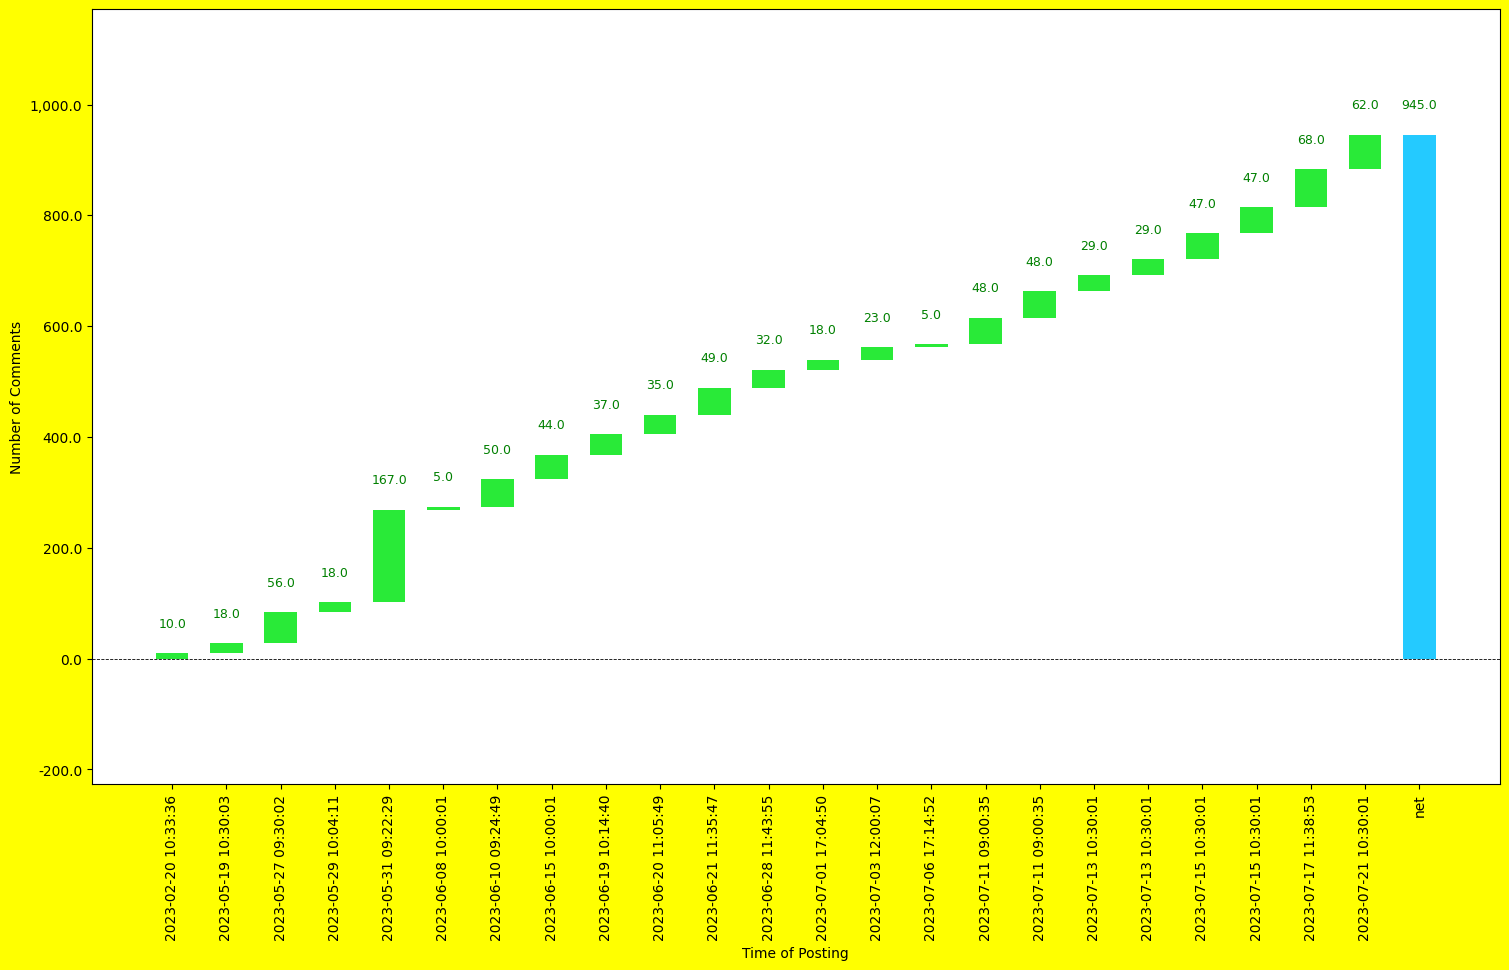

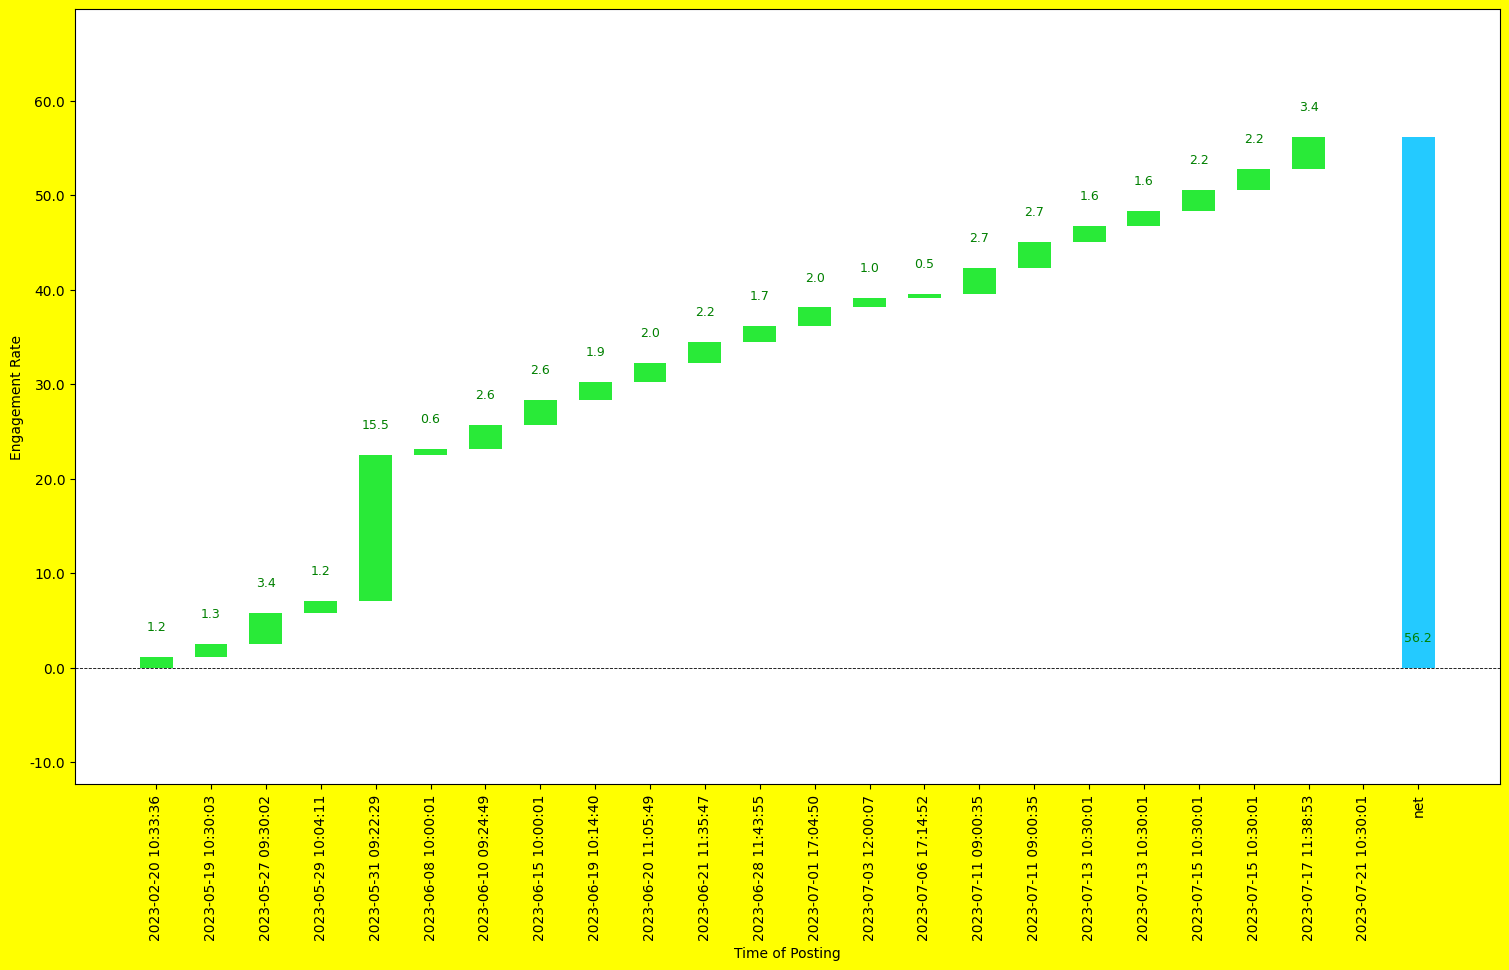

<Figure size 1500x900 with 0 Axes>

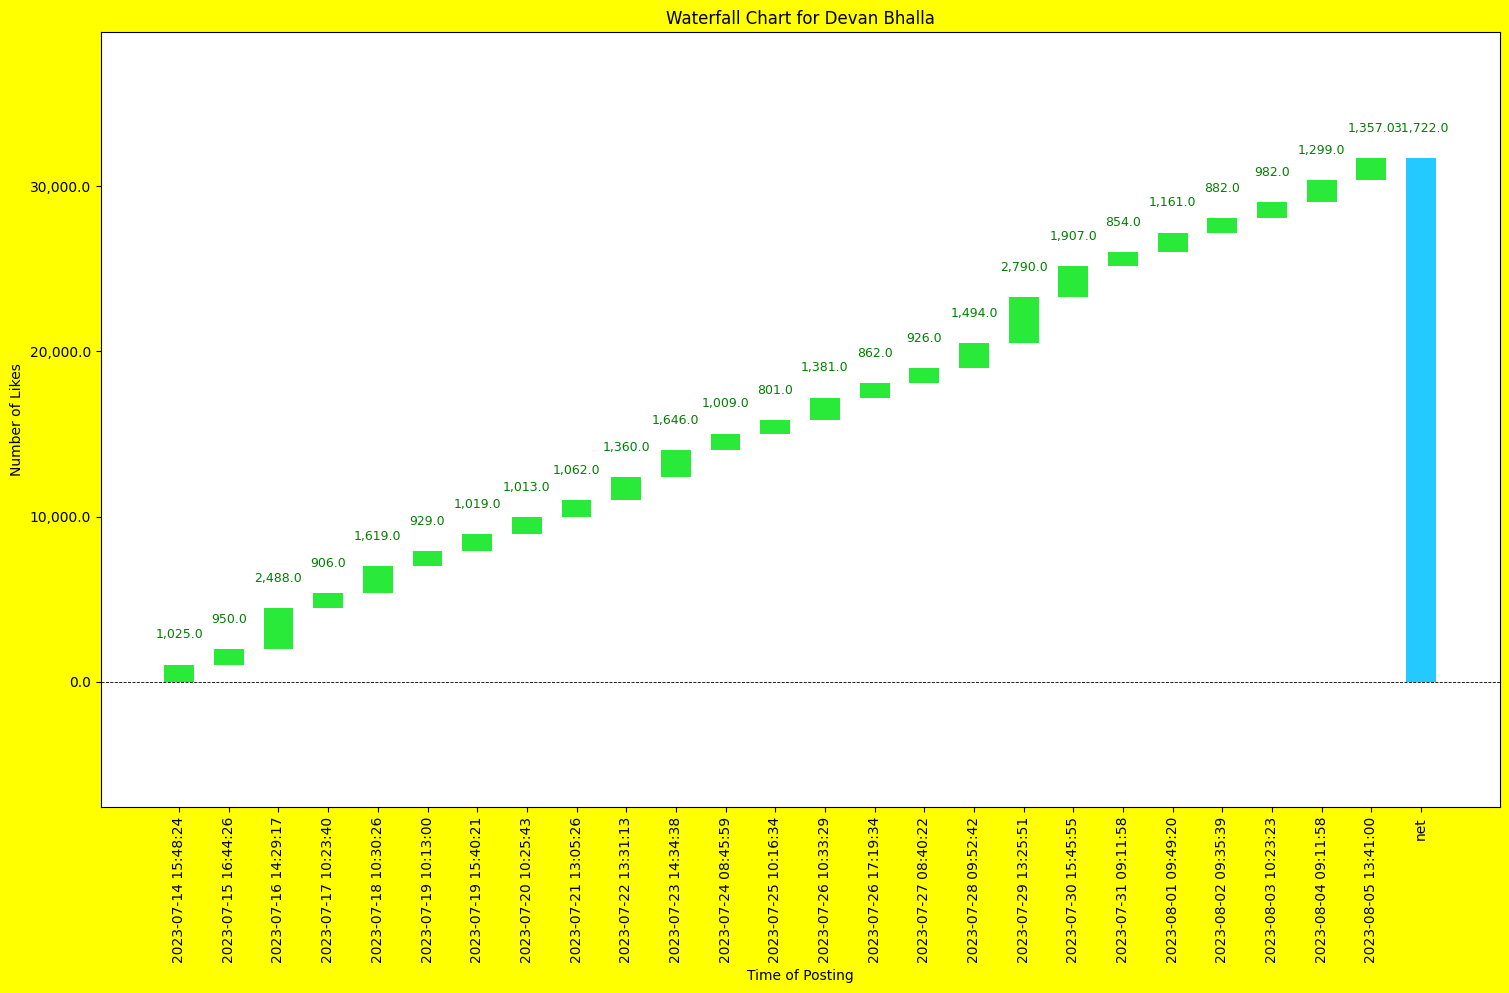

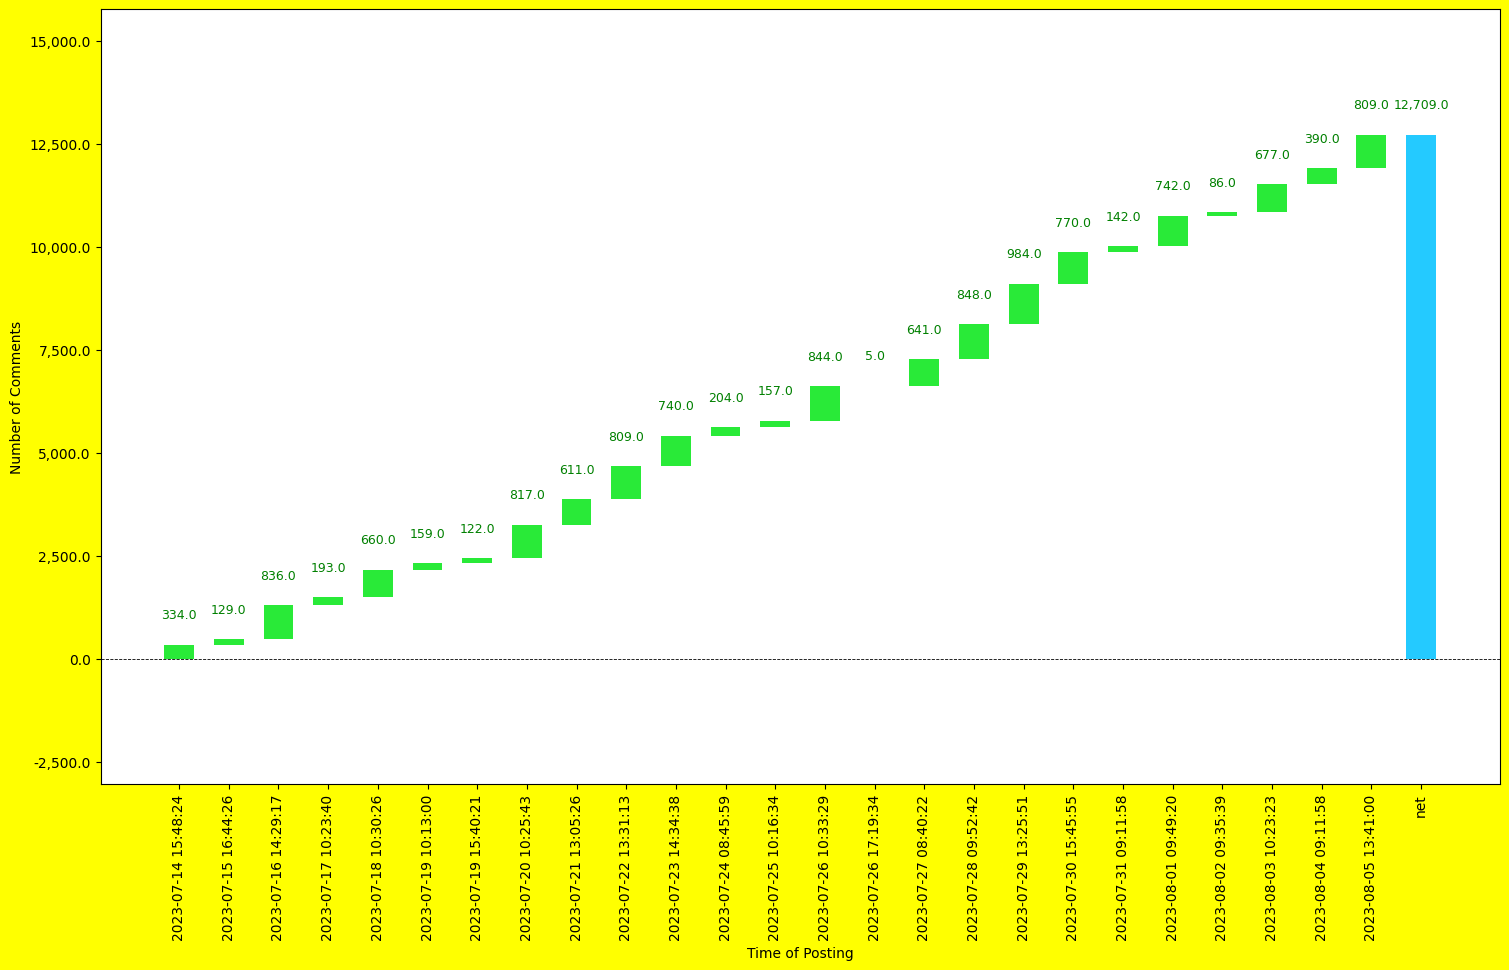

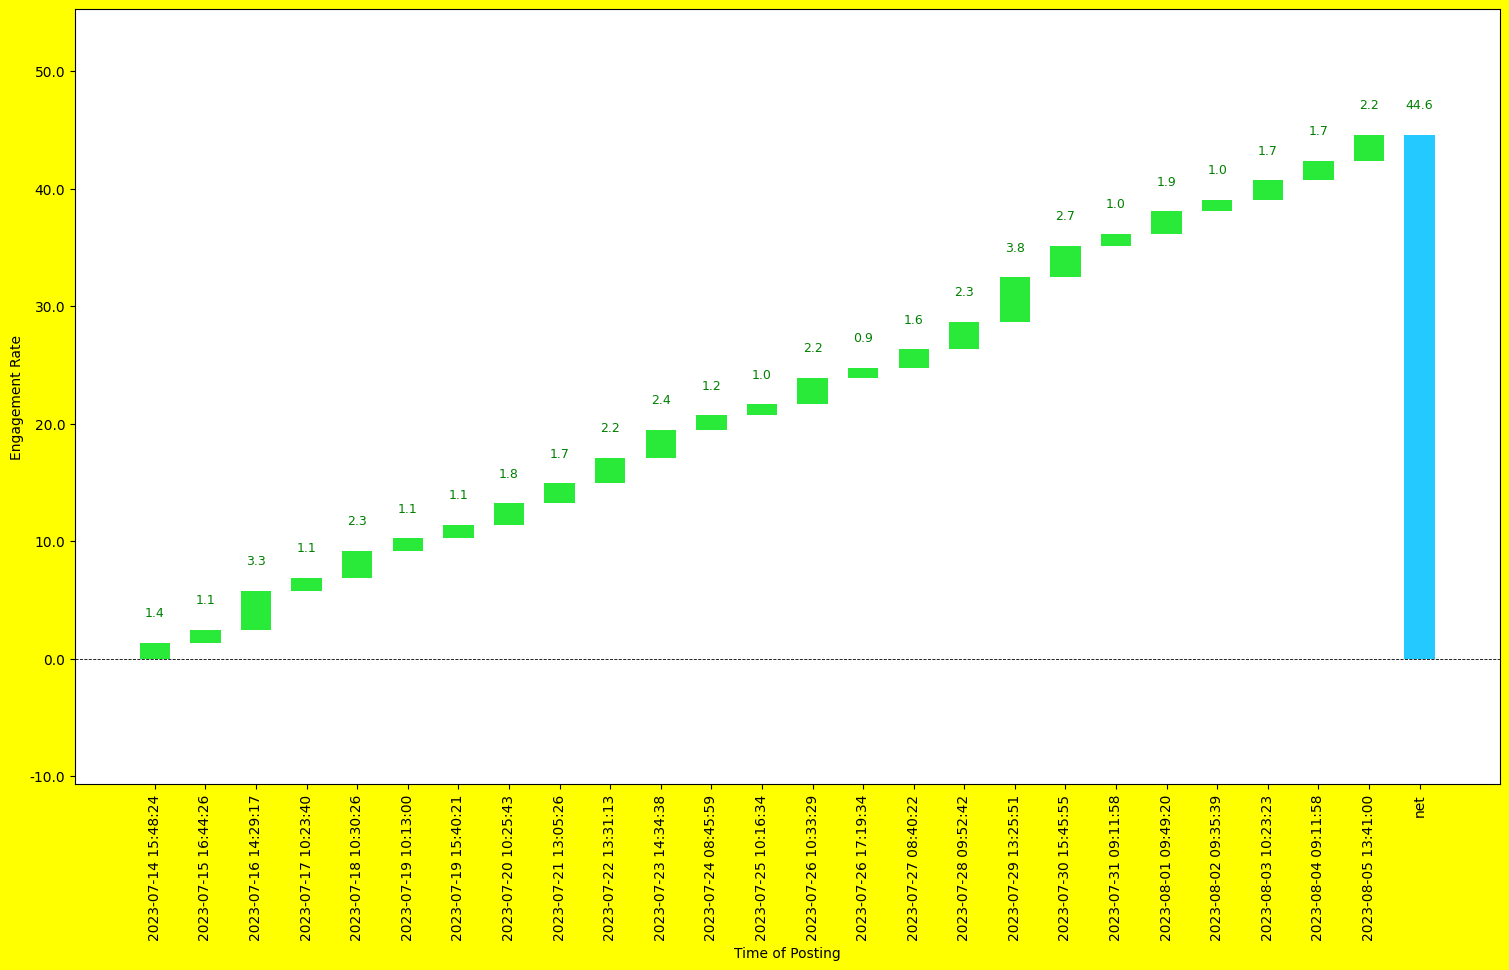

<Figure size 1500x900 with 0 Axes>

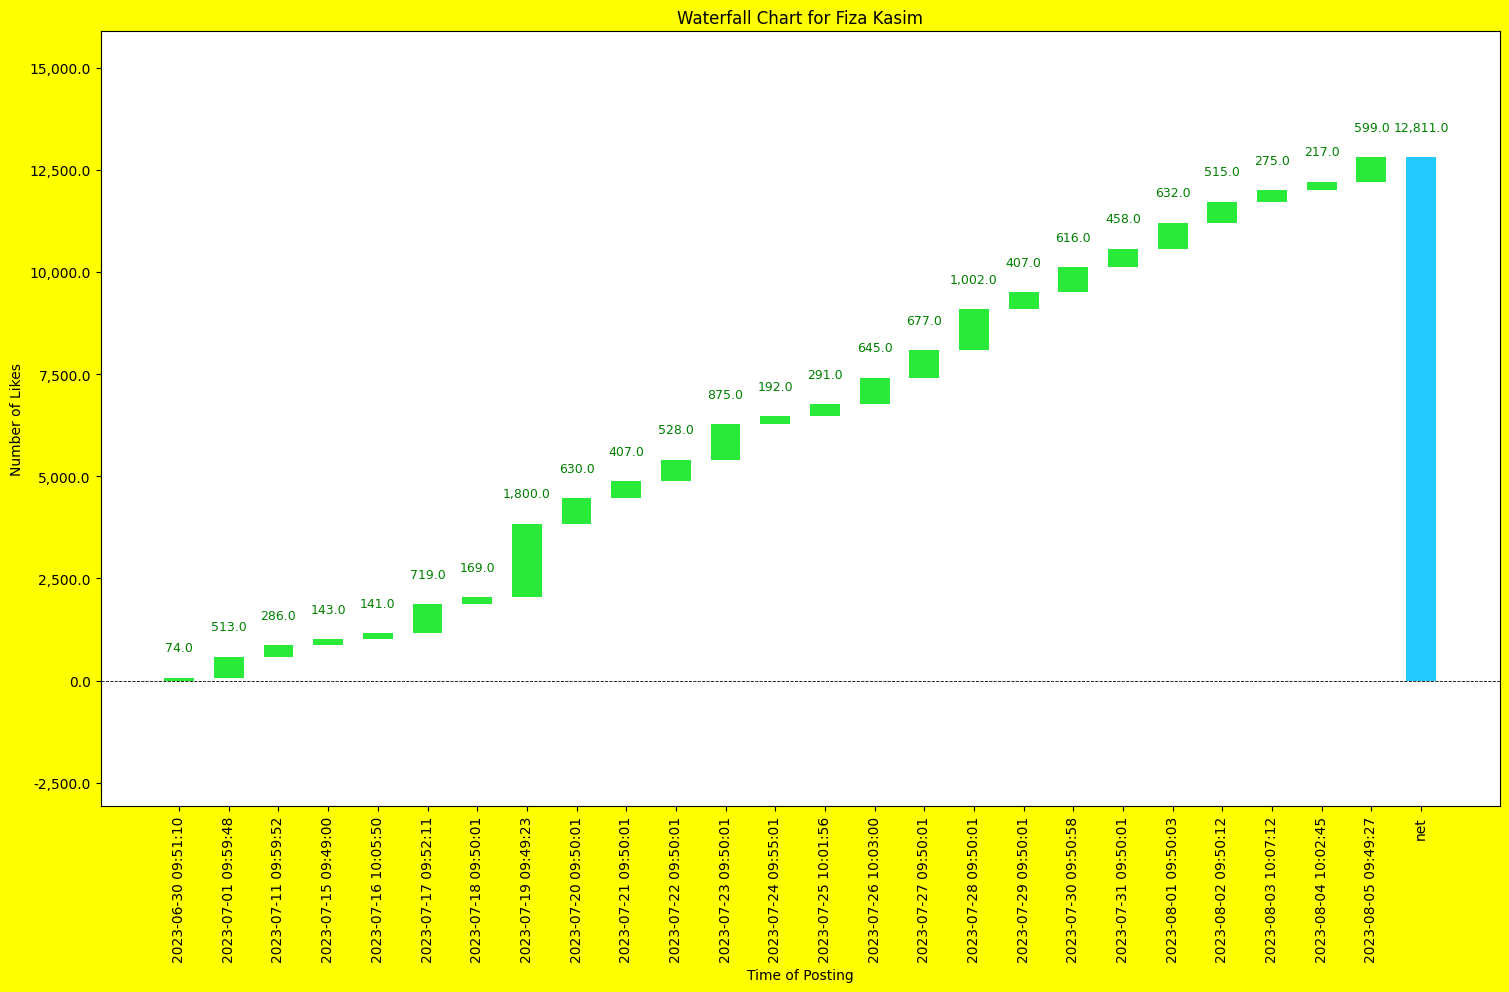

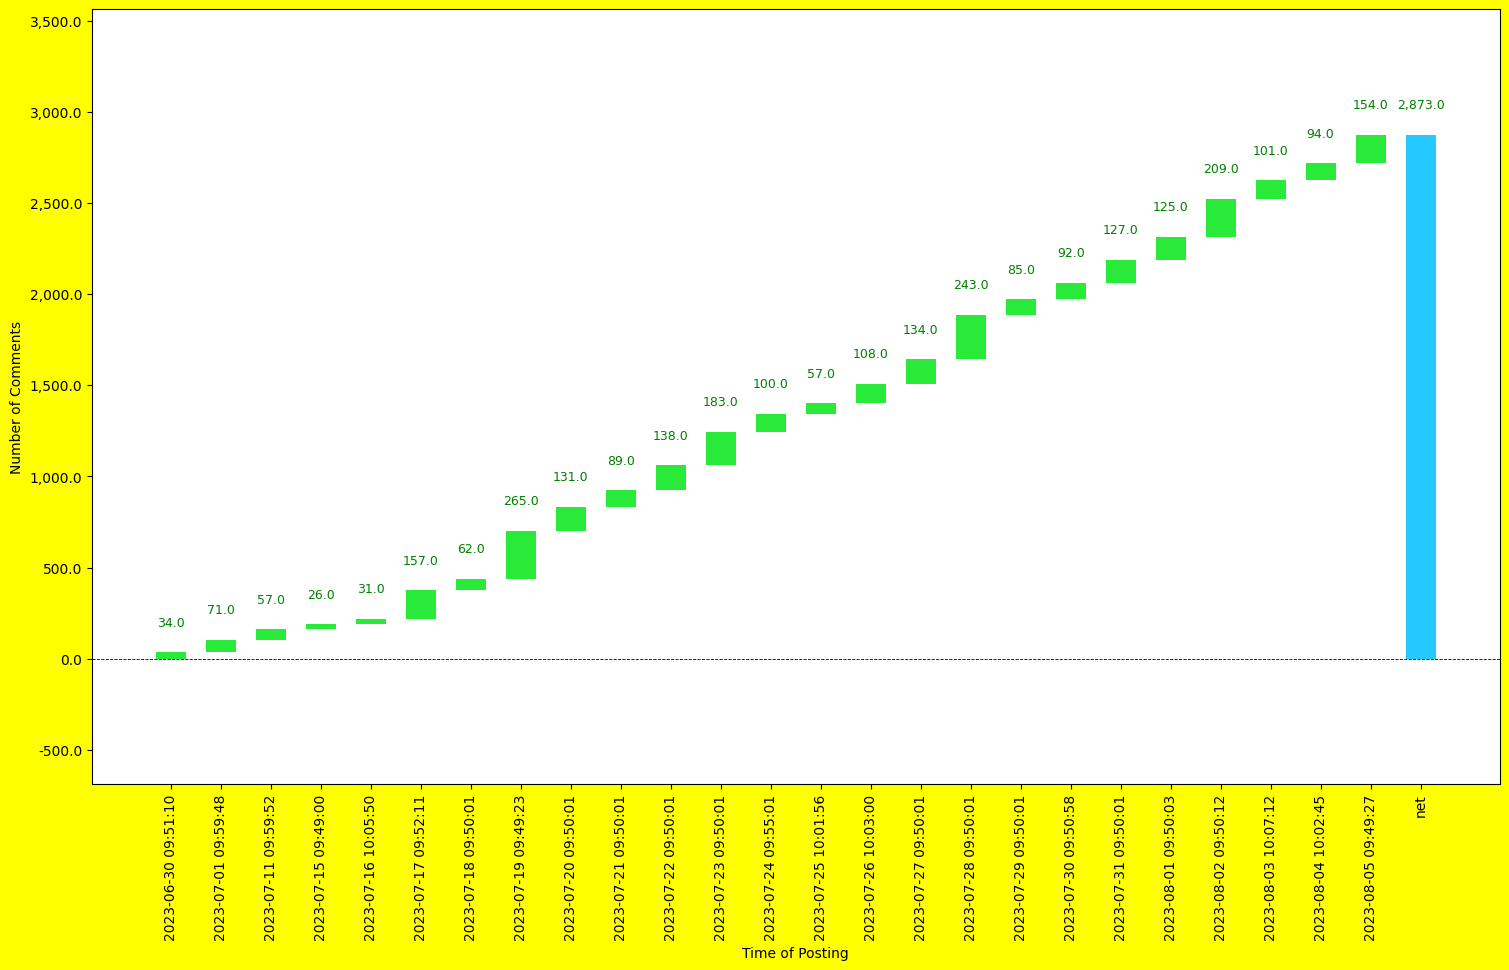

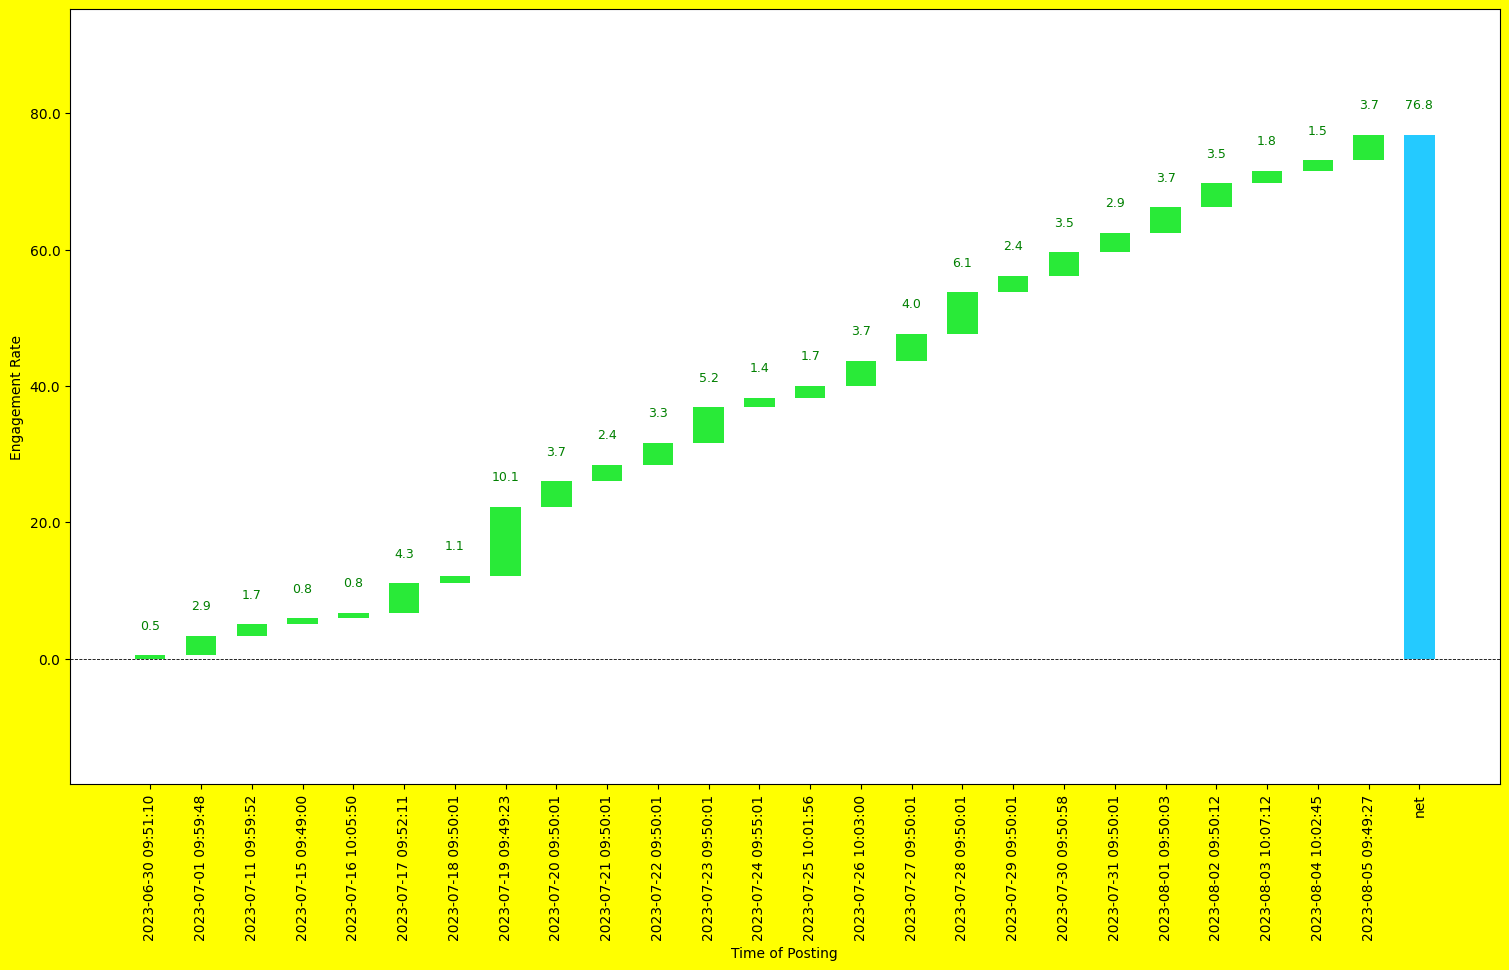

<Figure size 1500x900 with 0 Axes>

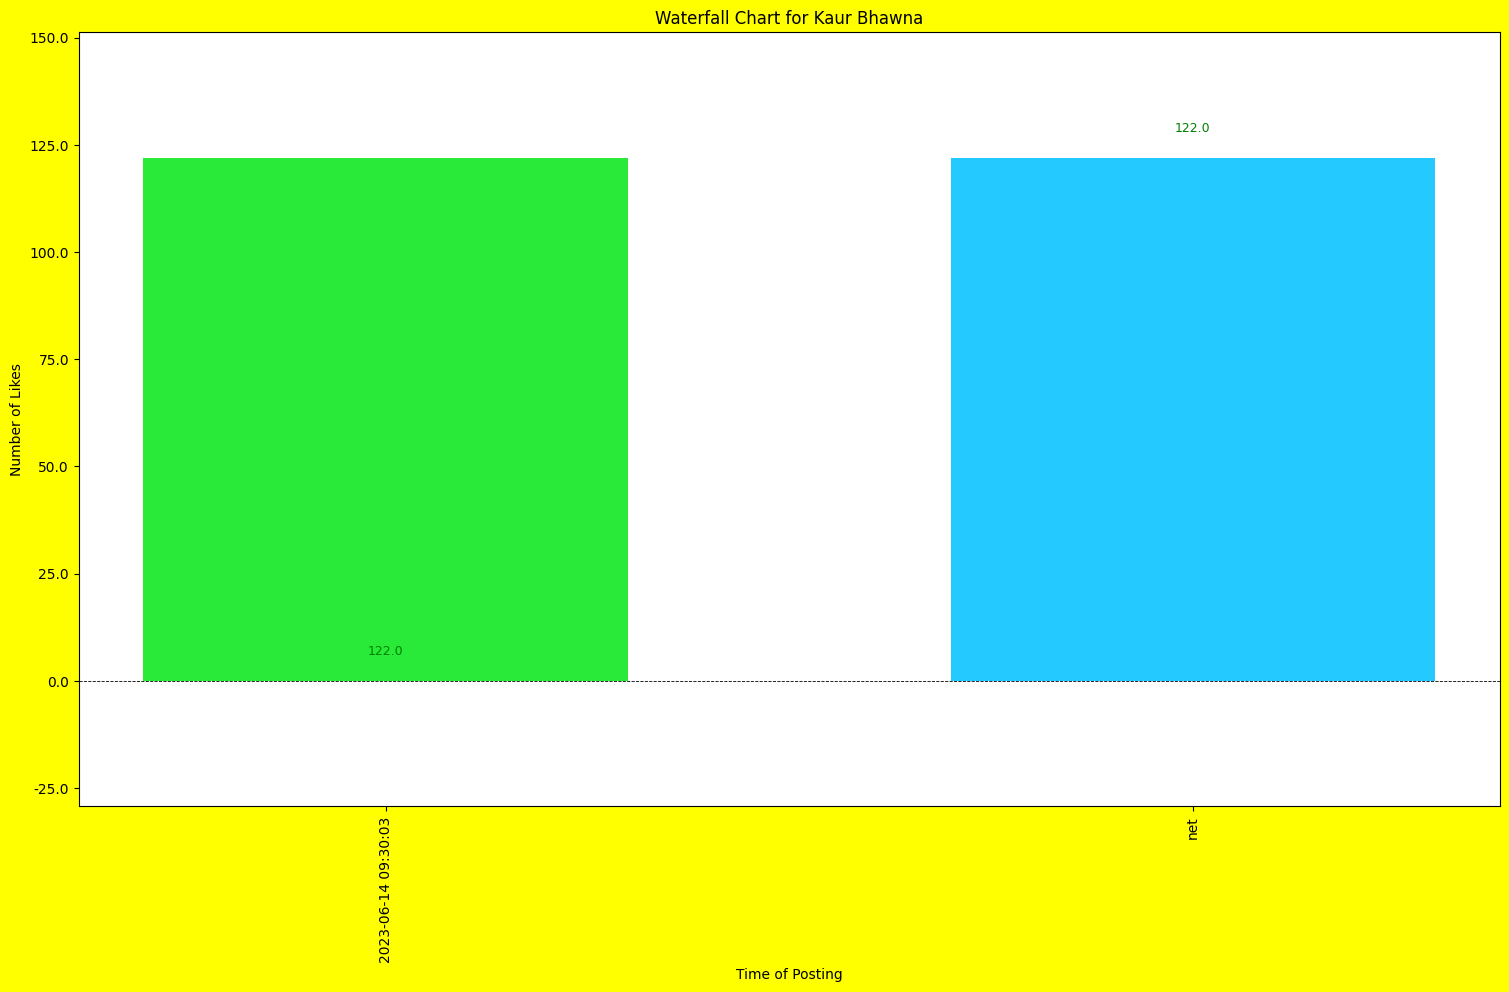

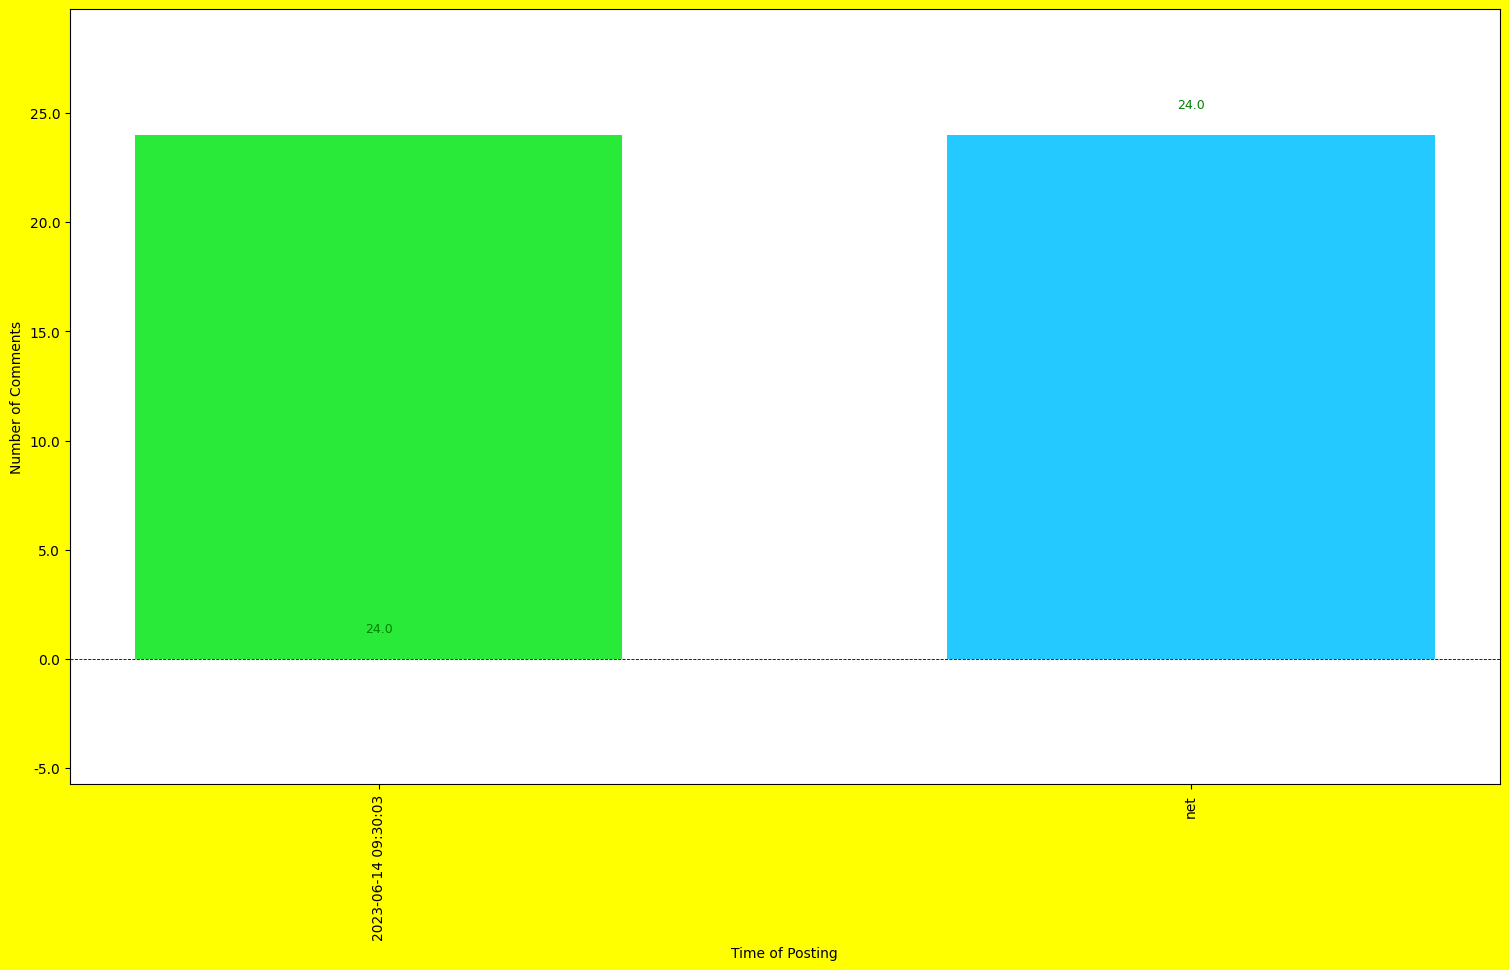

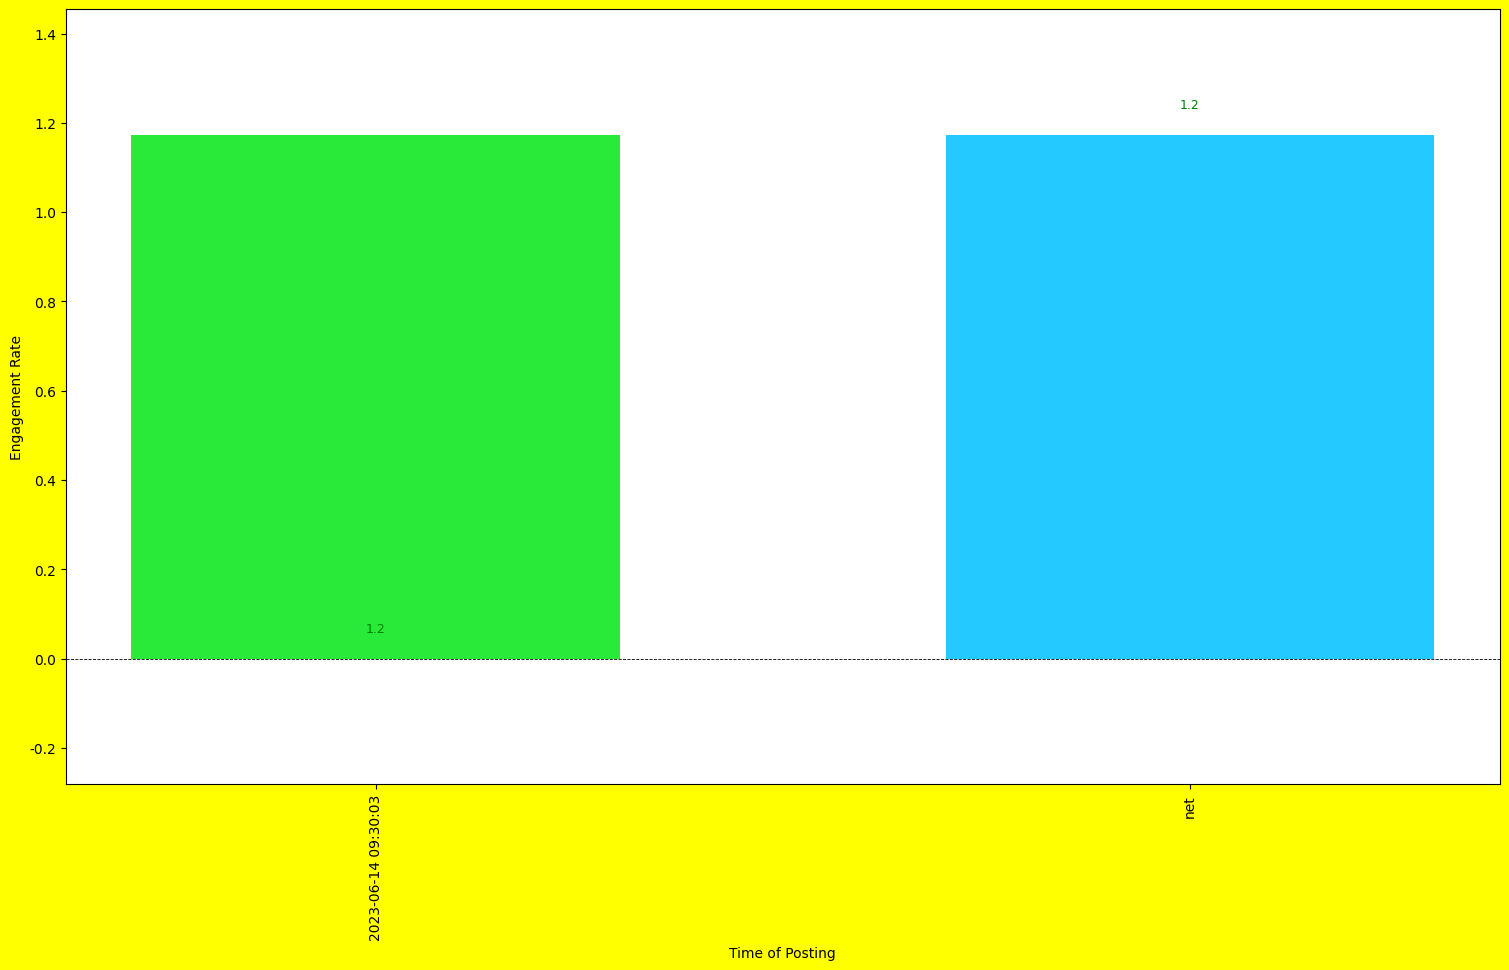

<Figure size 1500x900 with 0 Axes>

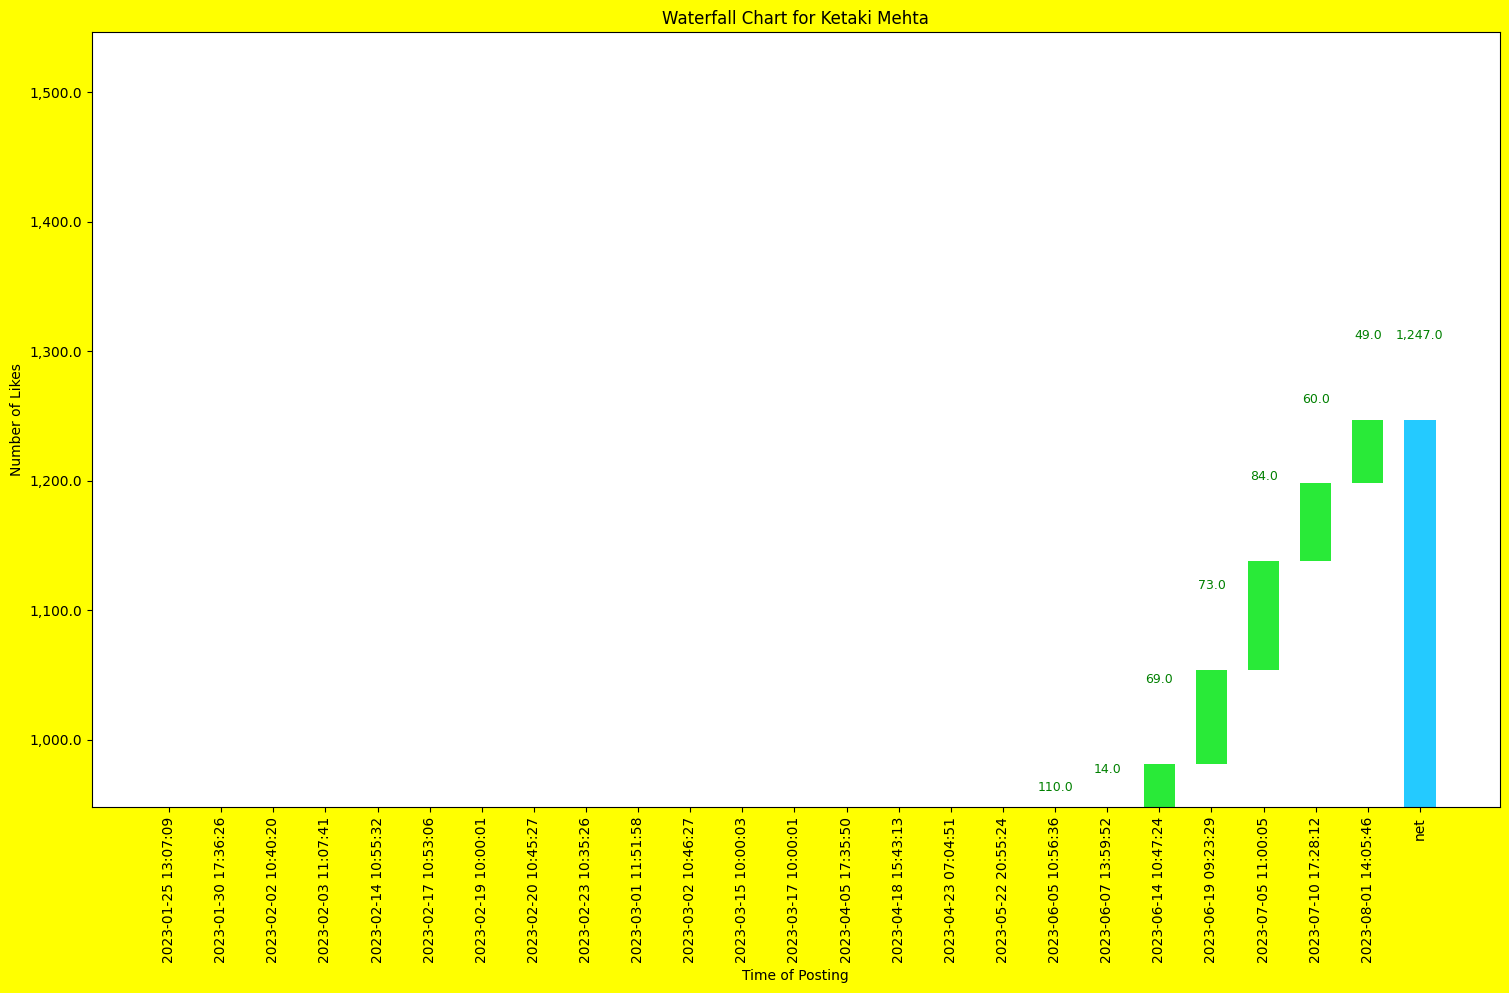

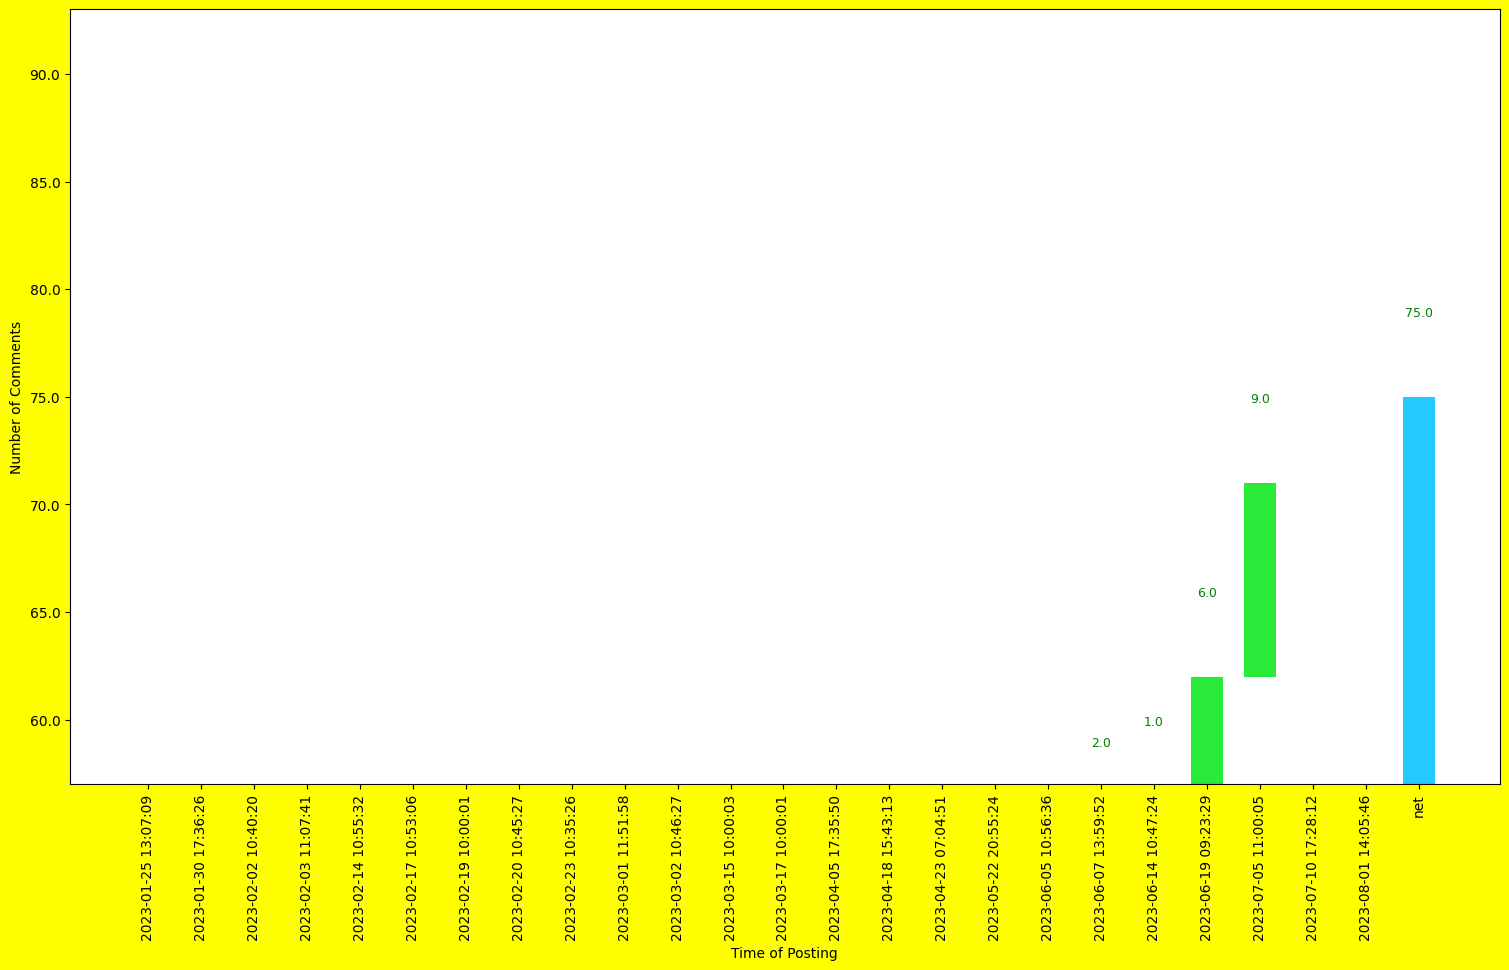

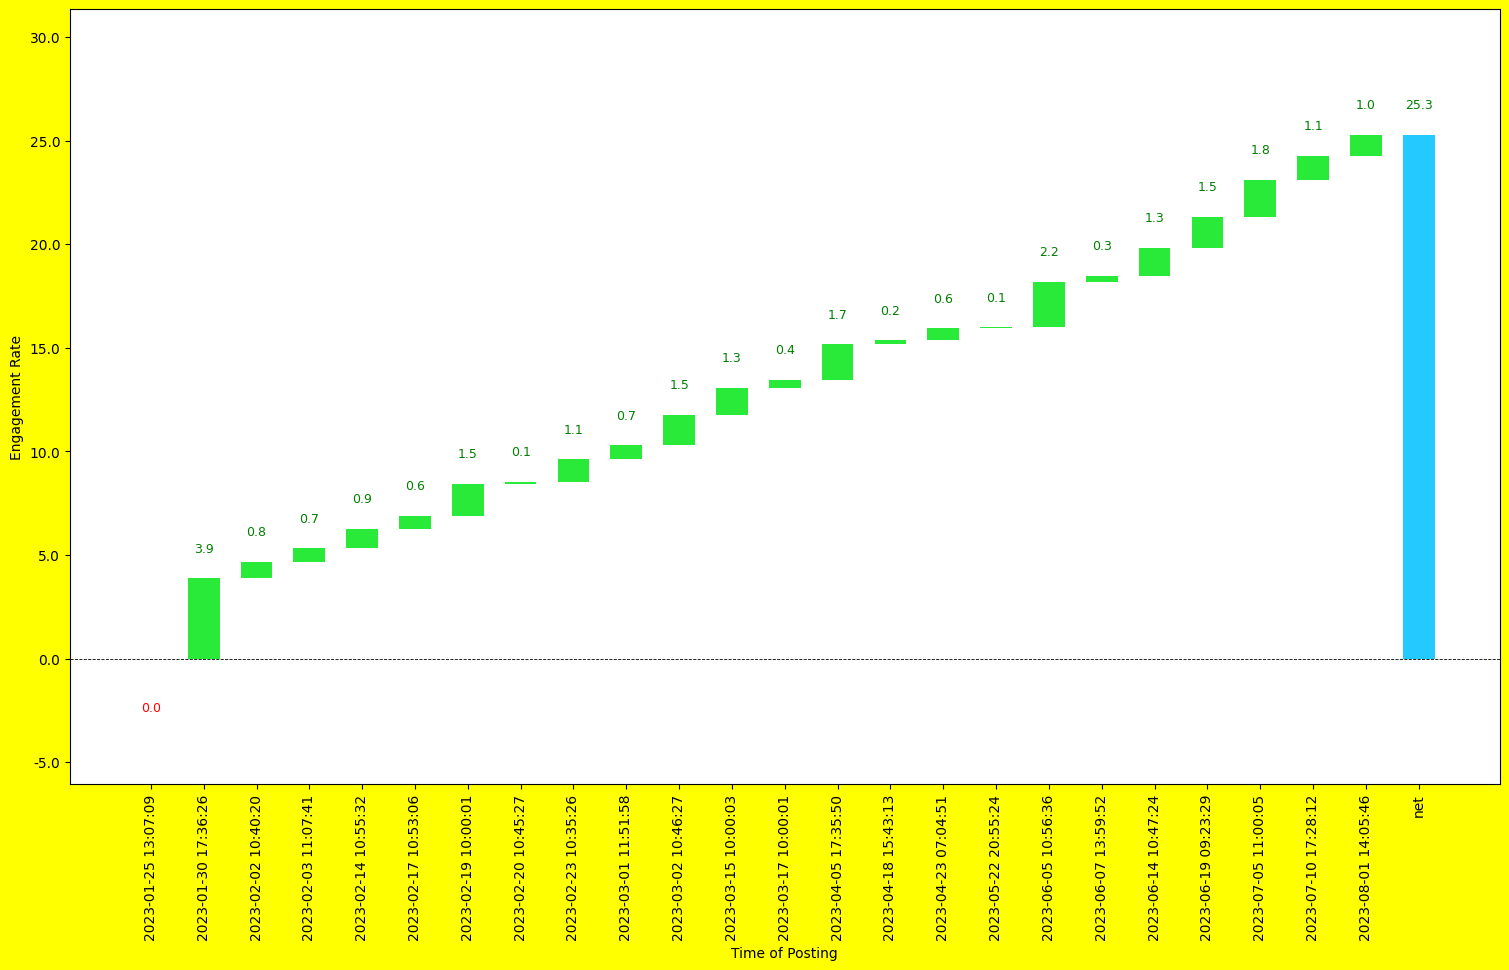

<Figure size 1500x900 with 0 Axes>

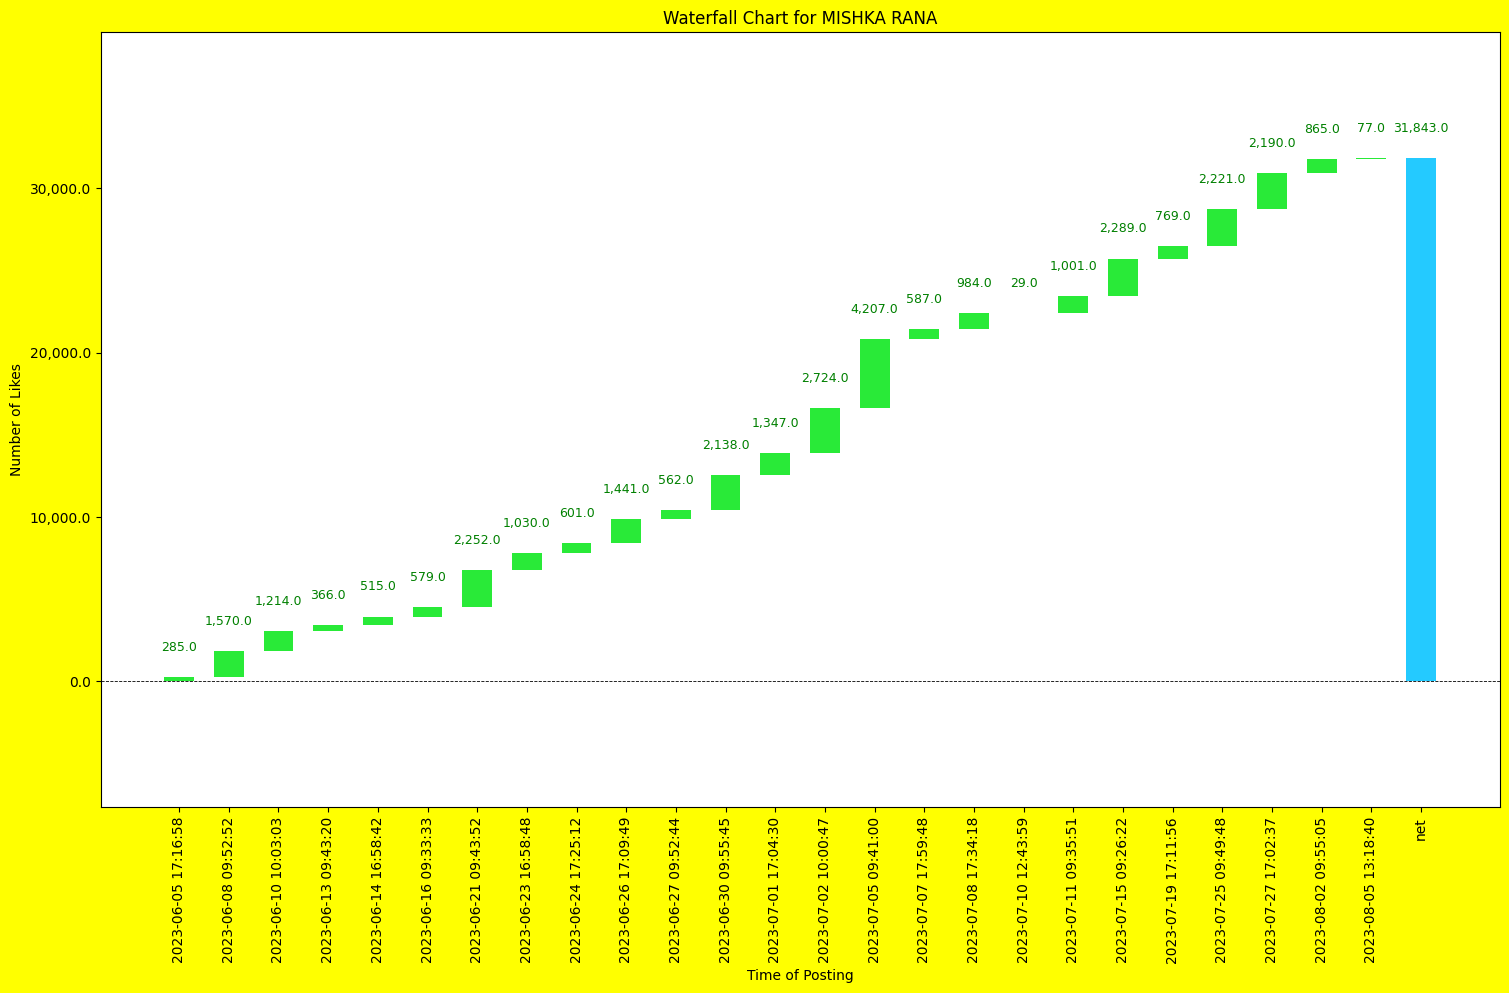

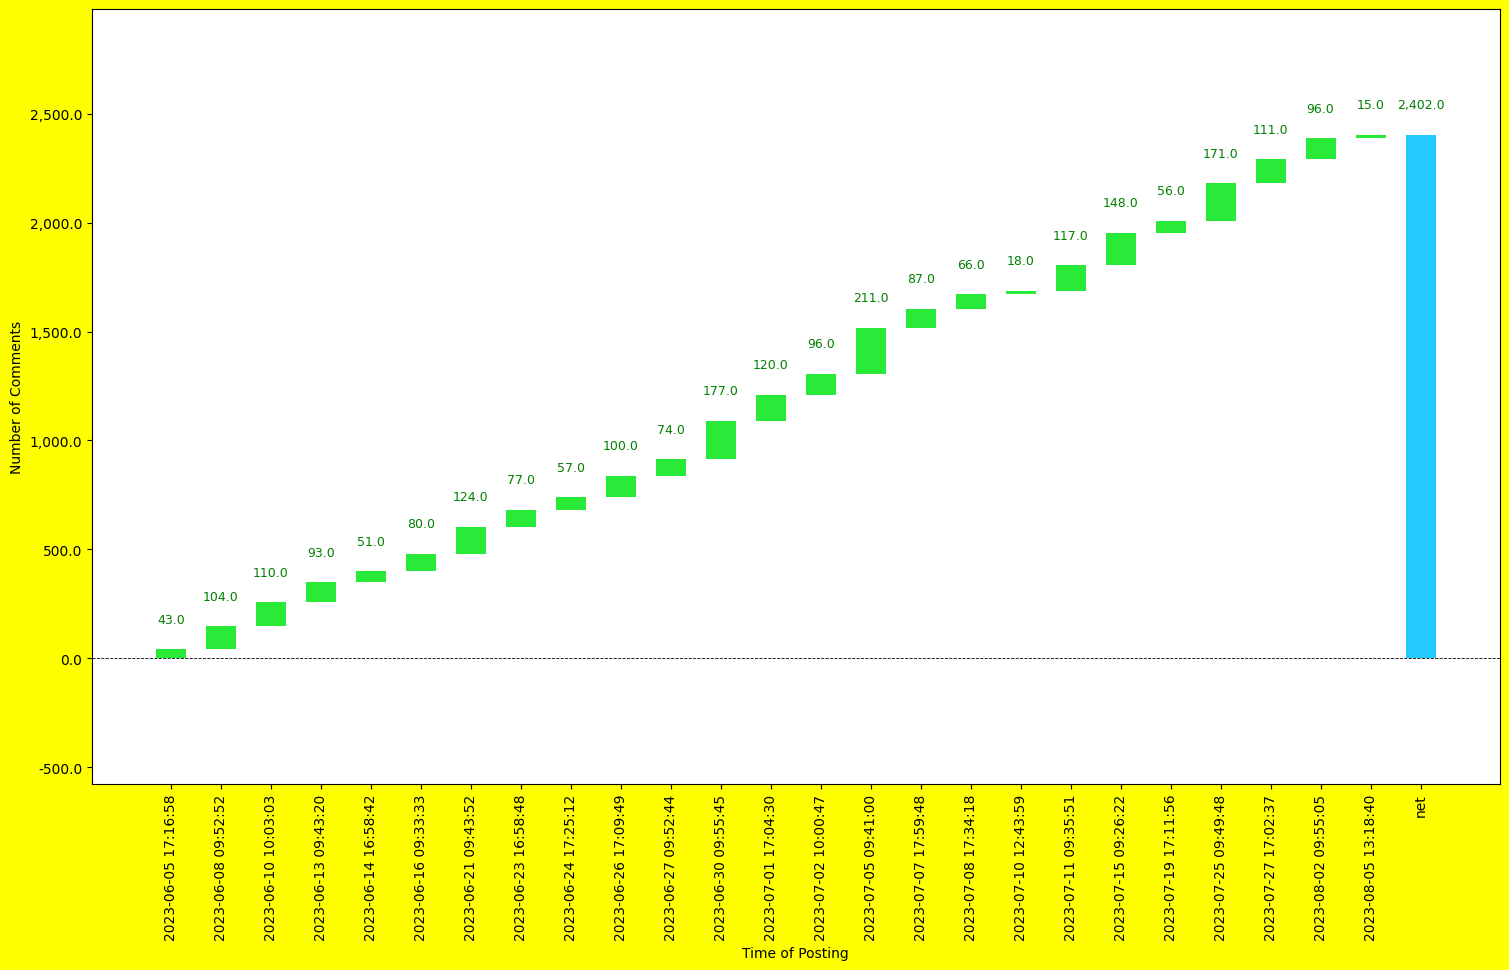

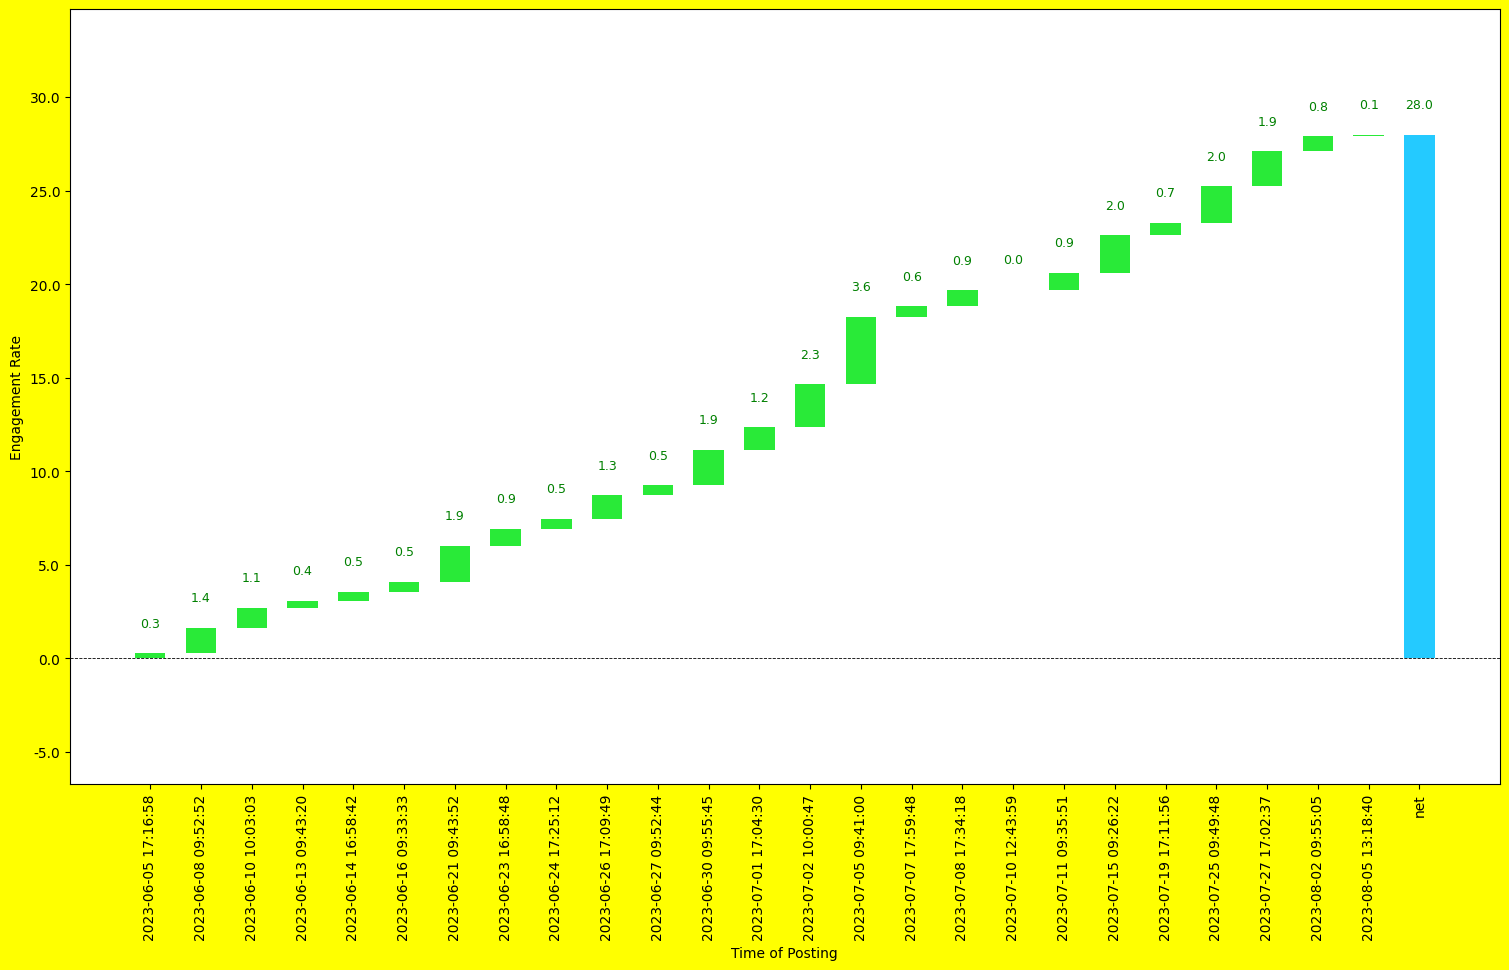

<Figure size 1500x900 with 0 Axes>

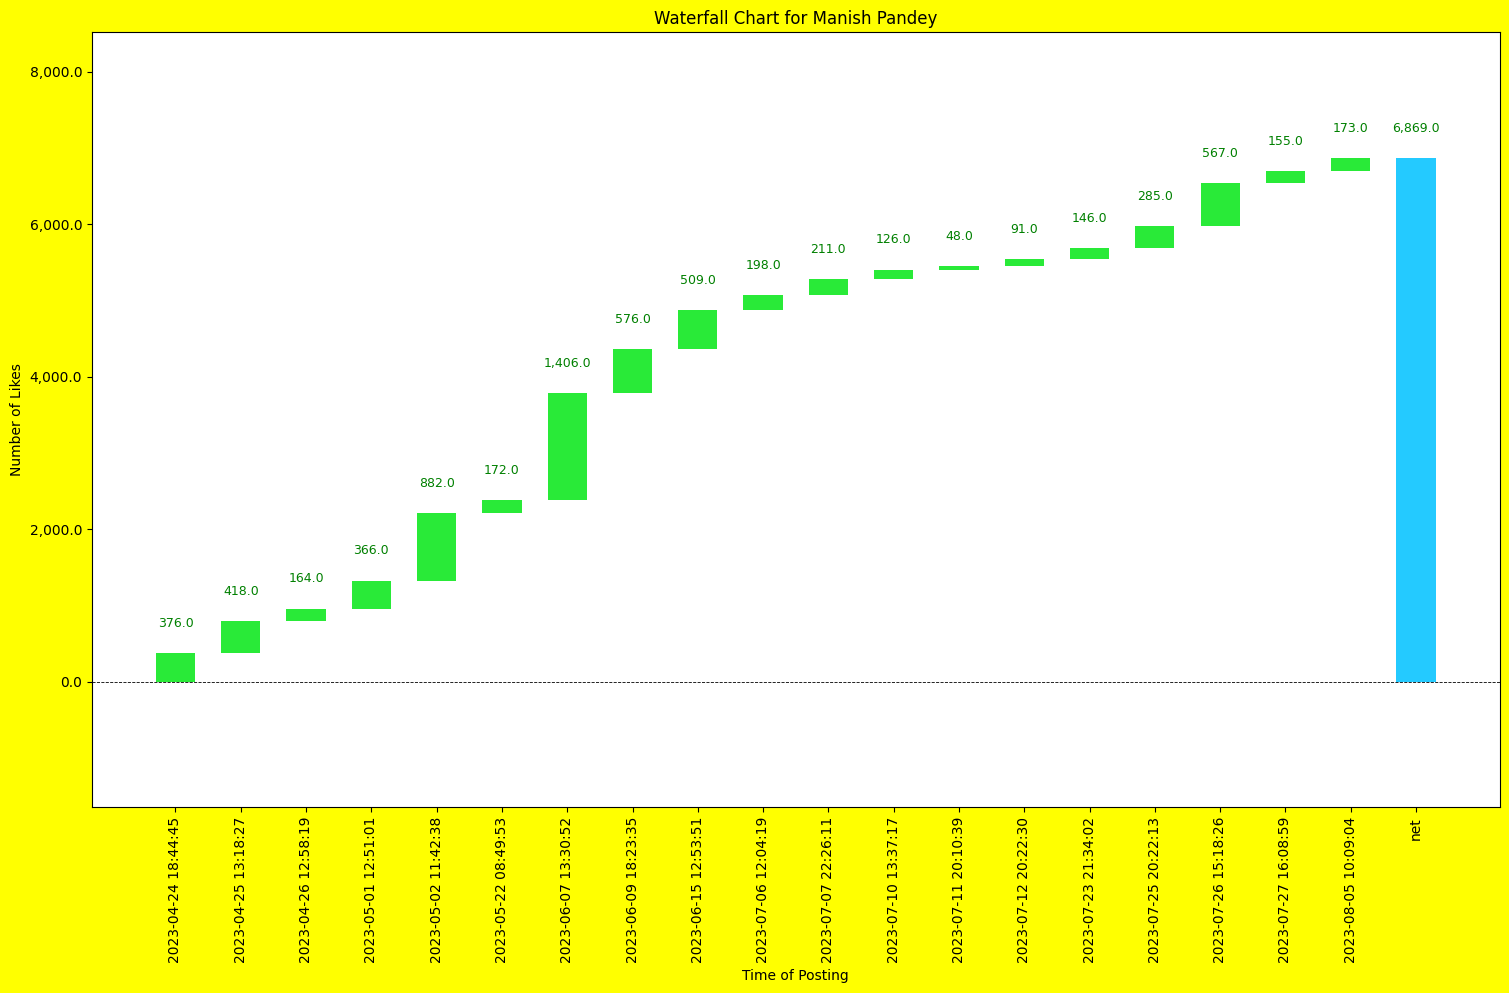

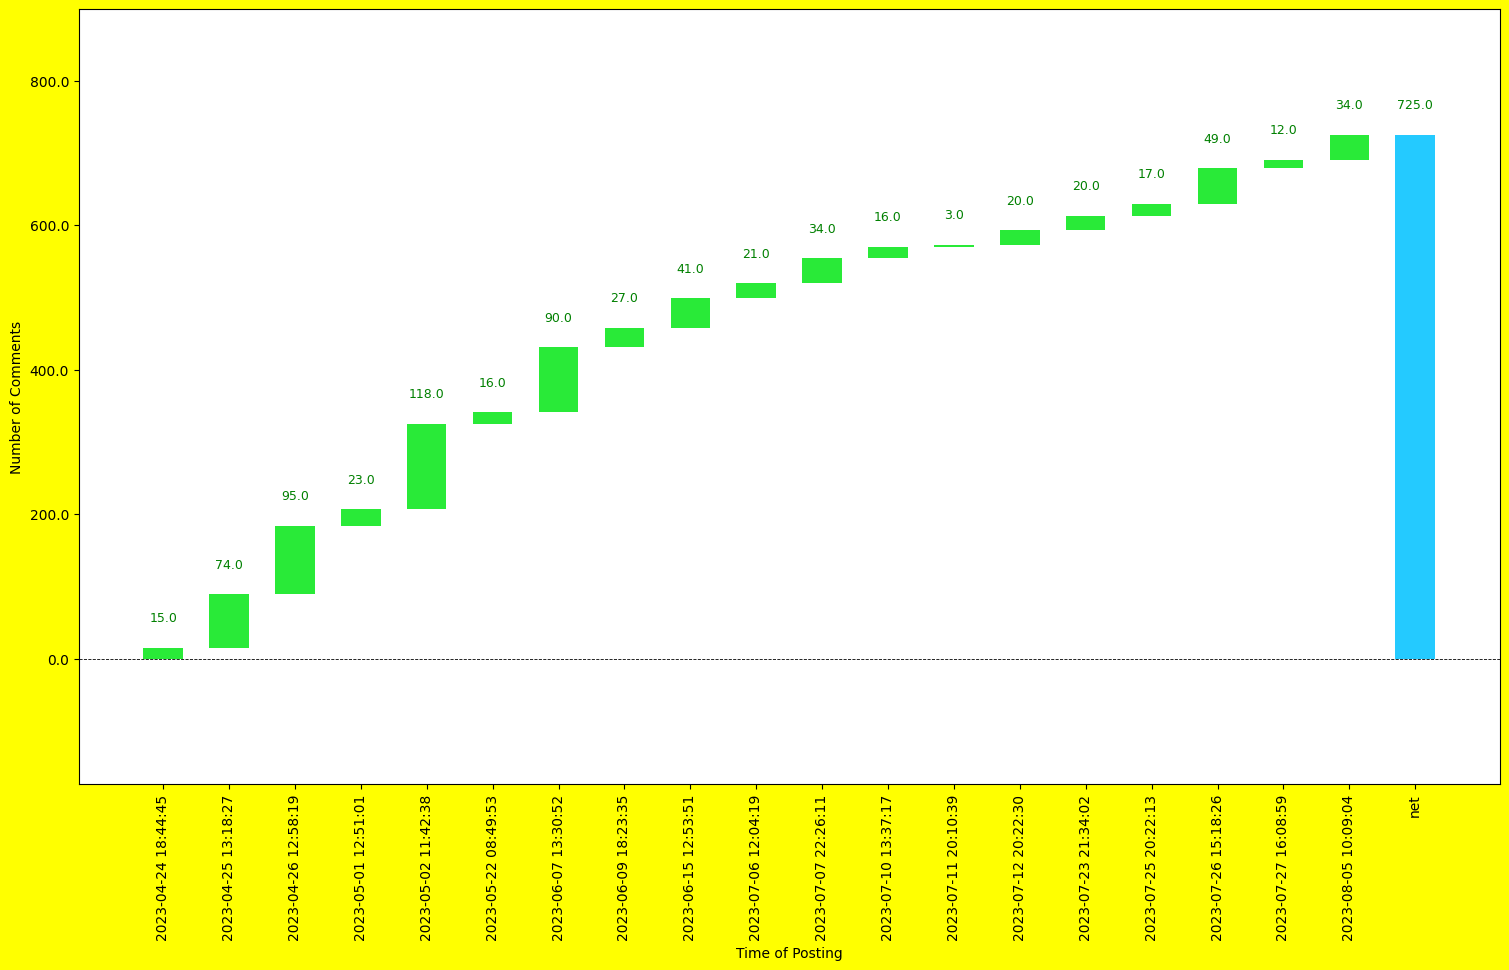

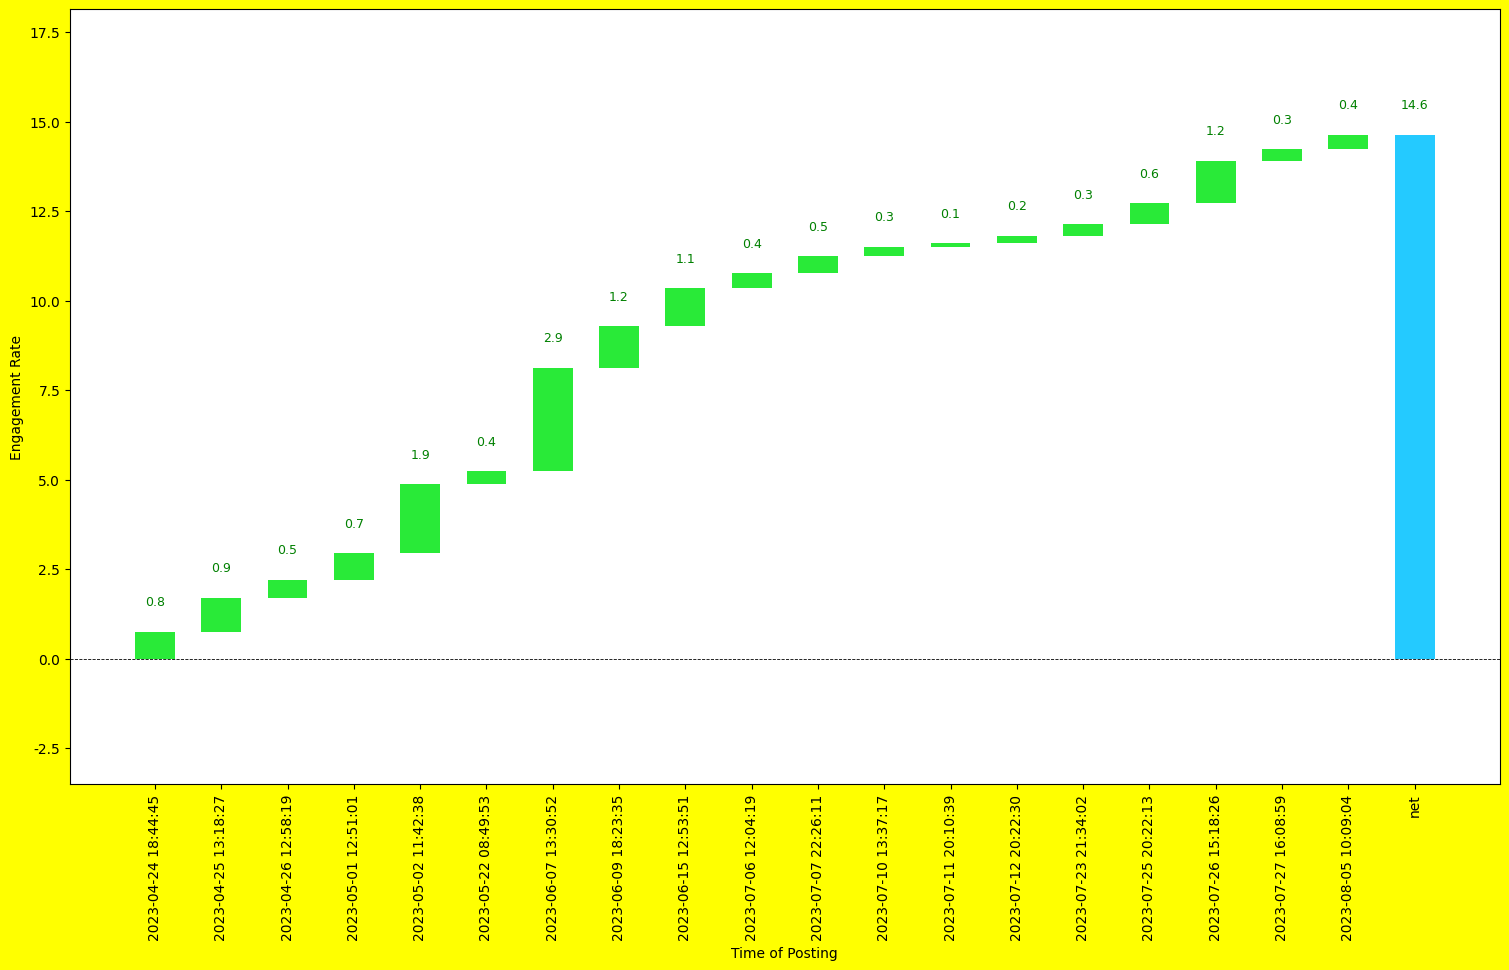

<Figure size 1500x900 with 0 Axes>

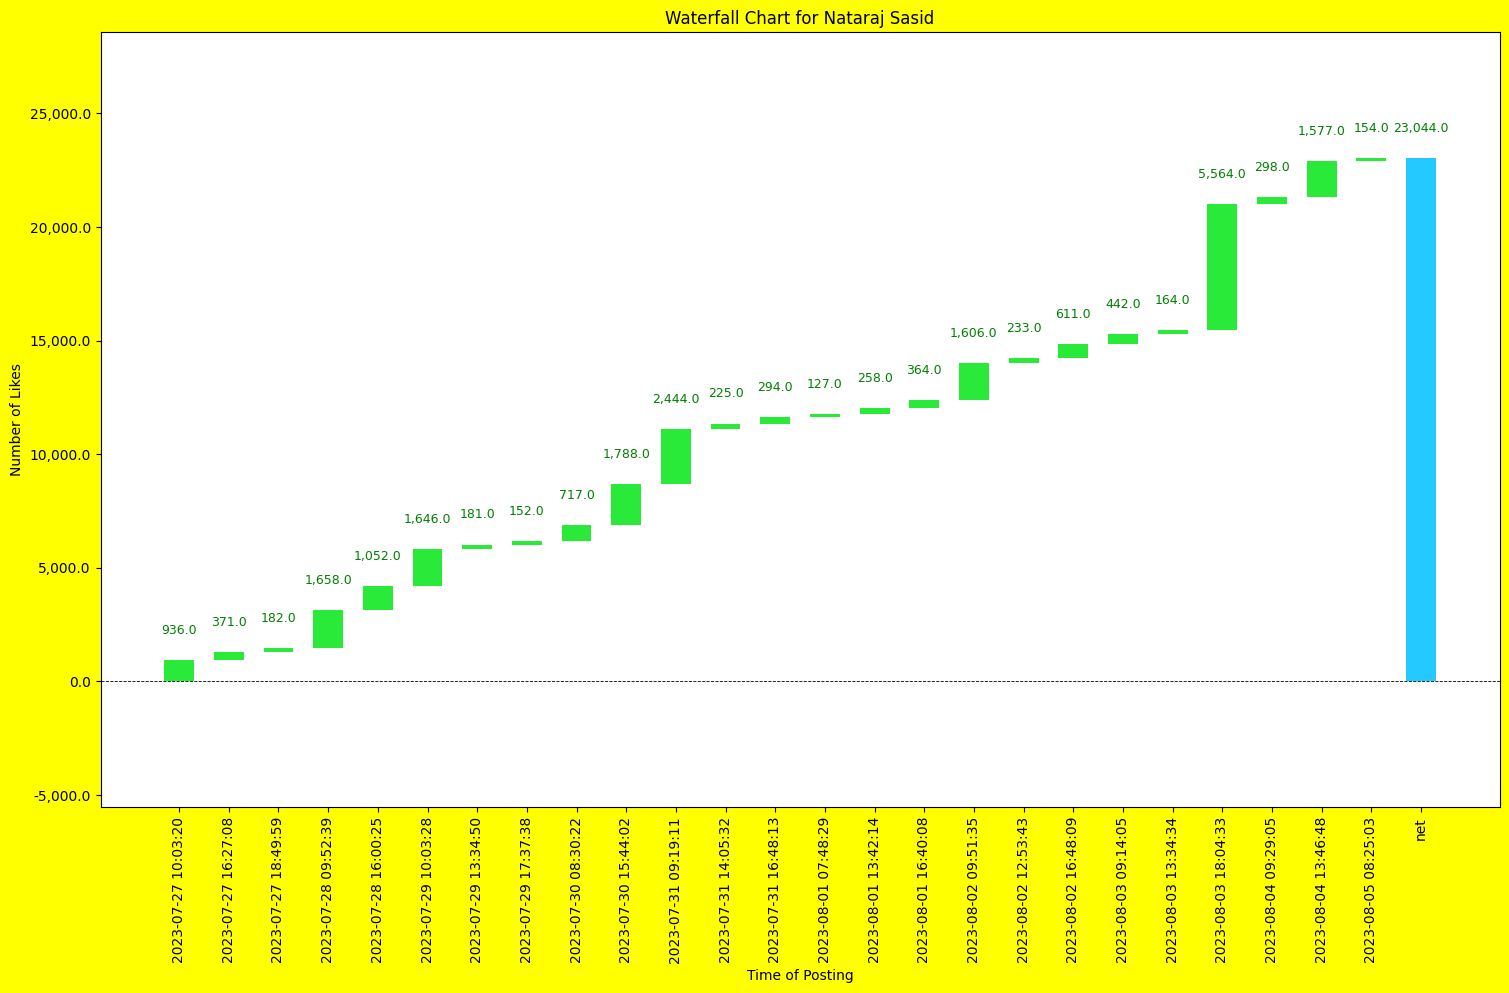

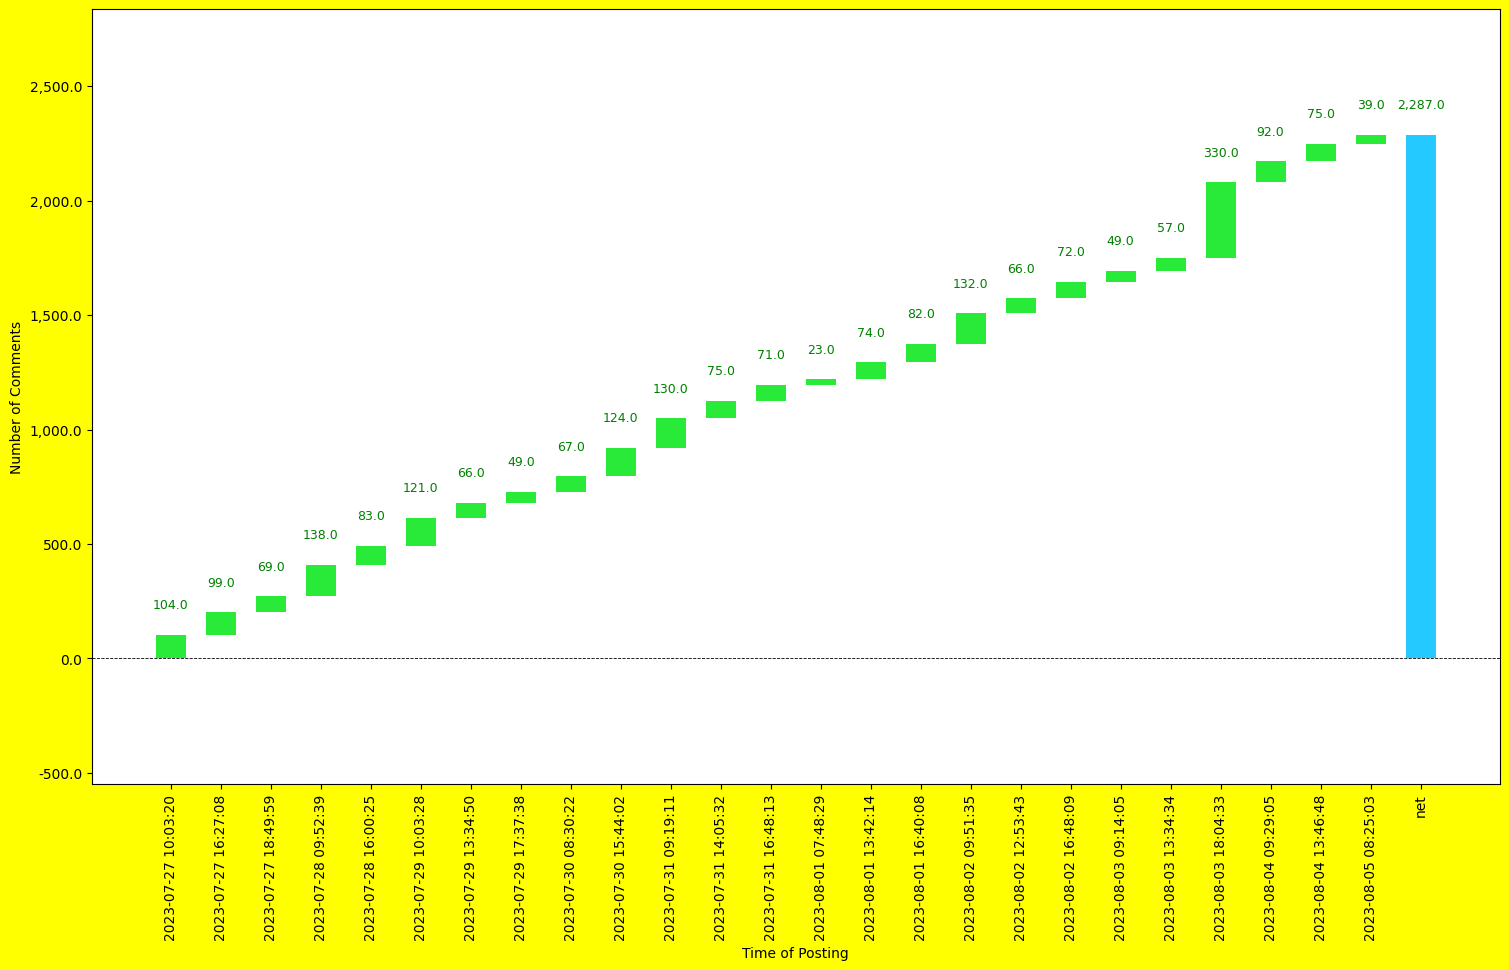

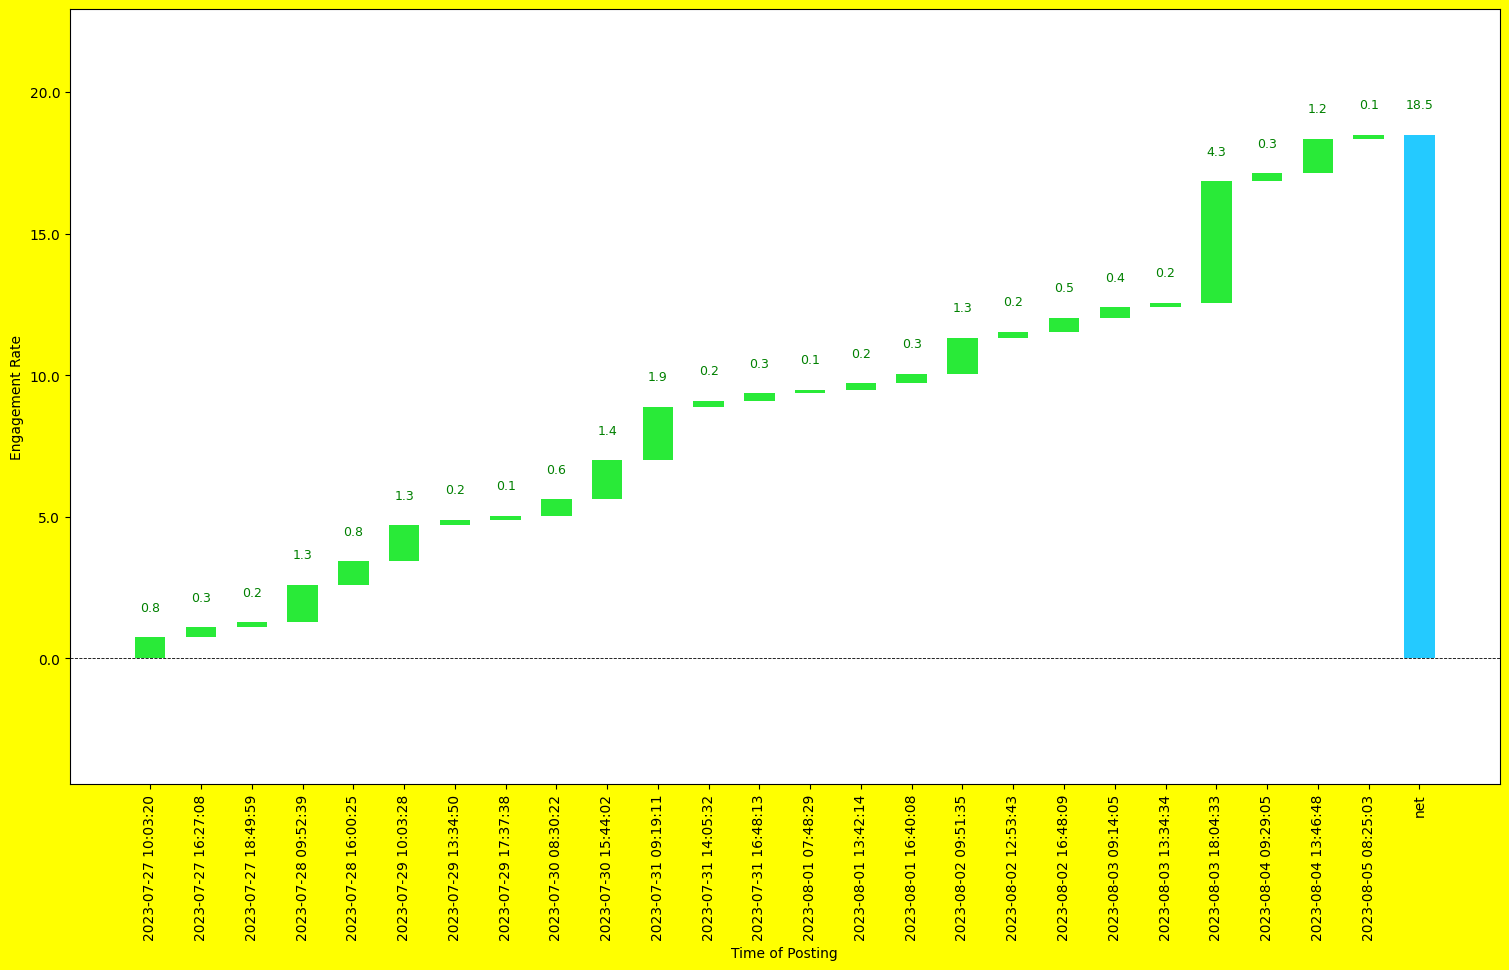

<Figure size 1500x900 with 0 Axes>

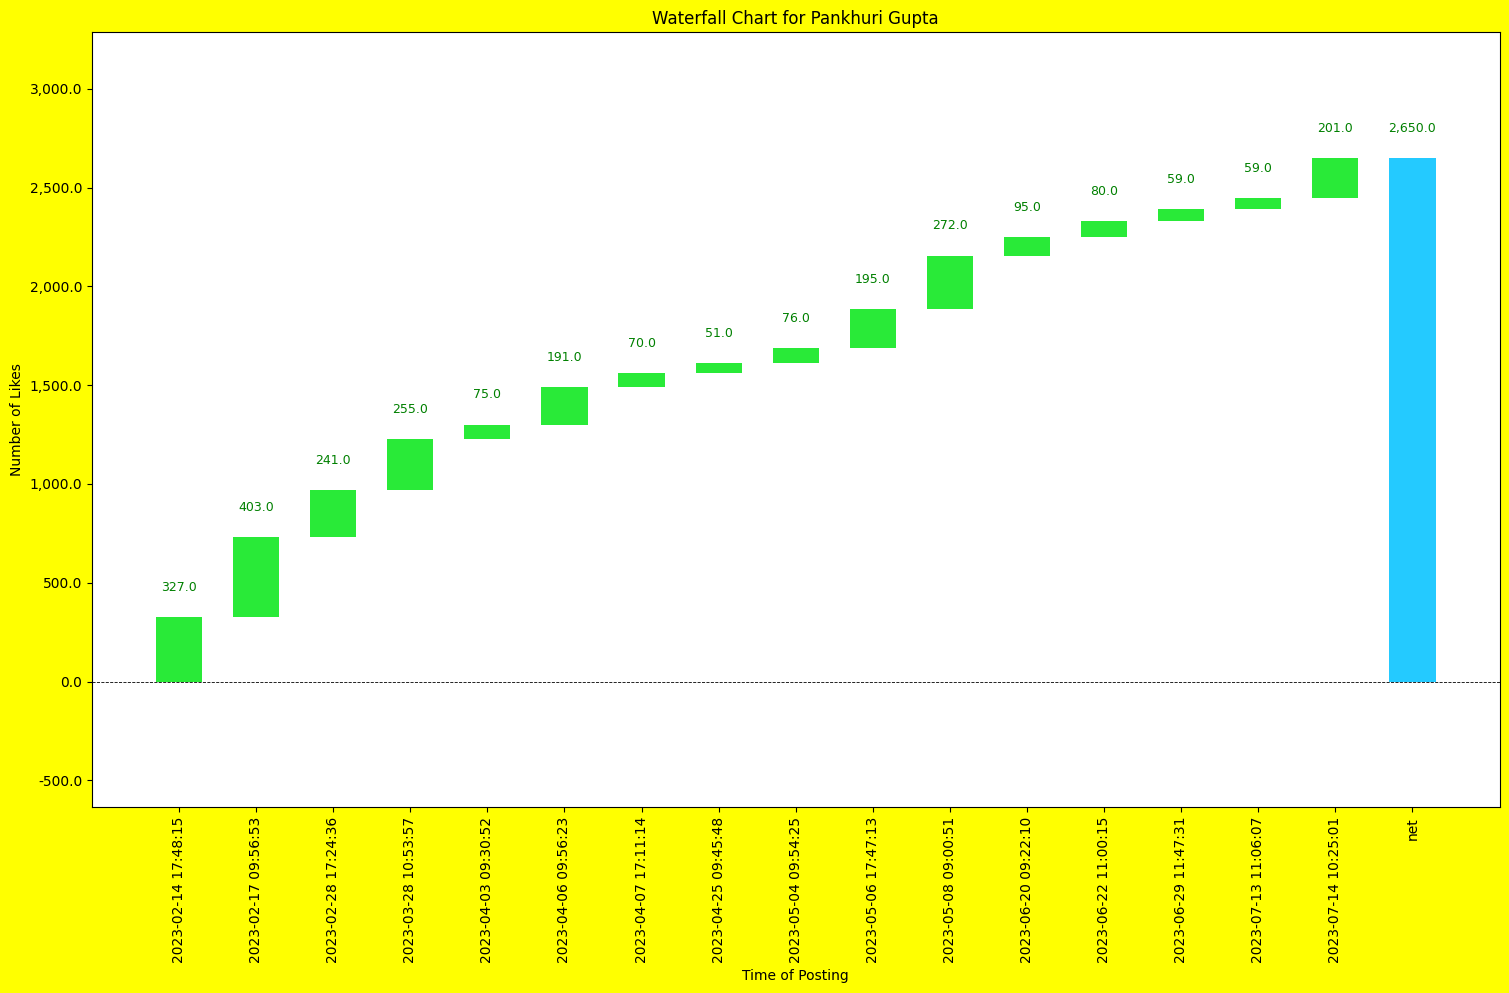

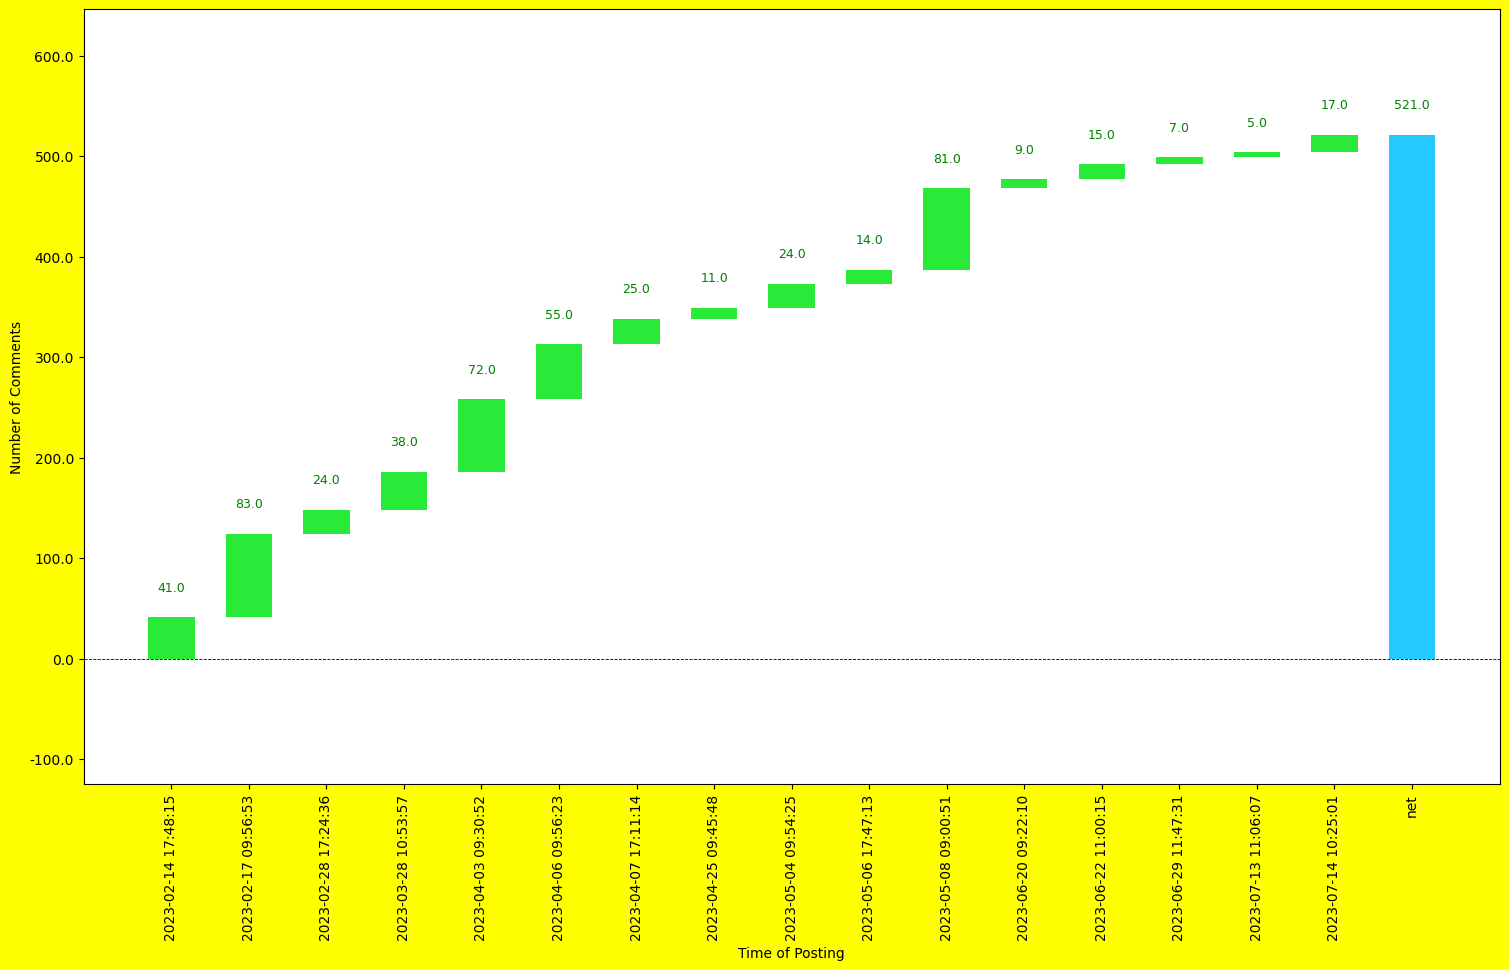

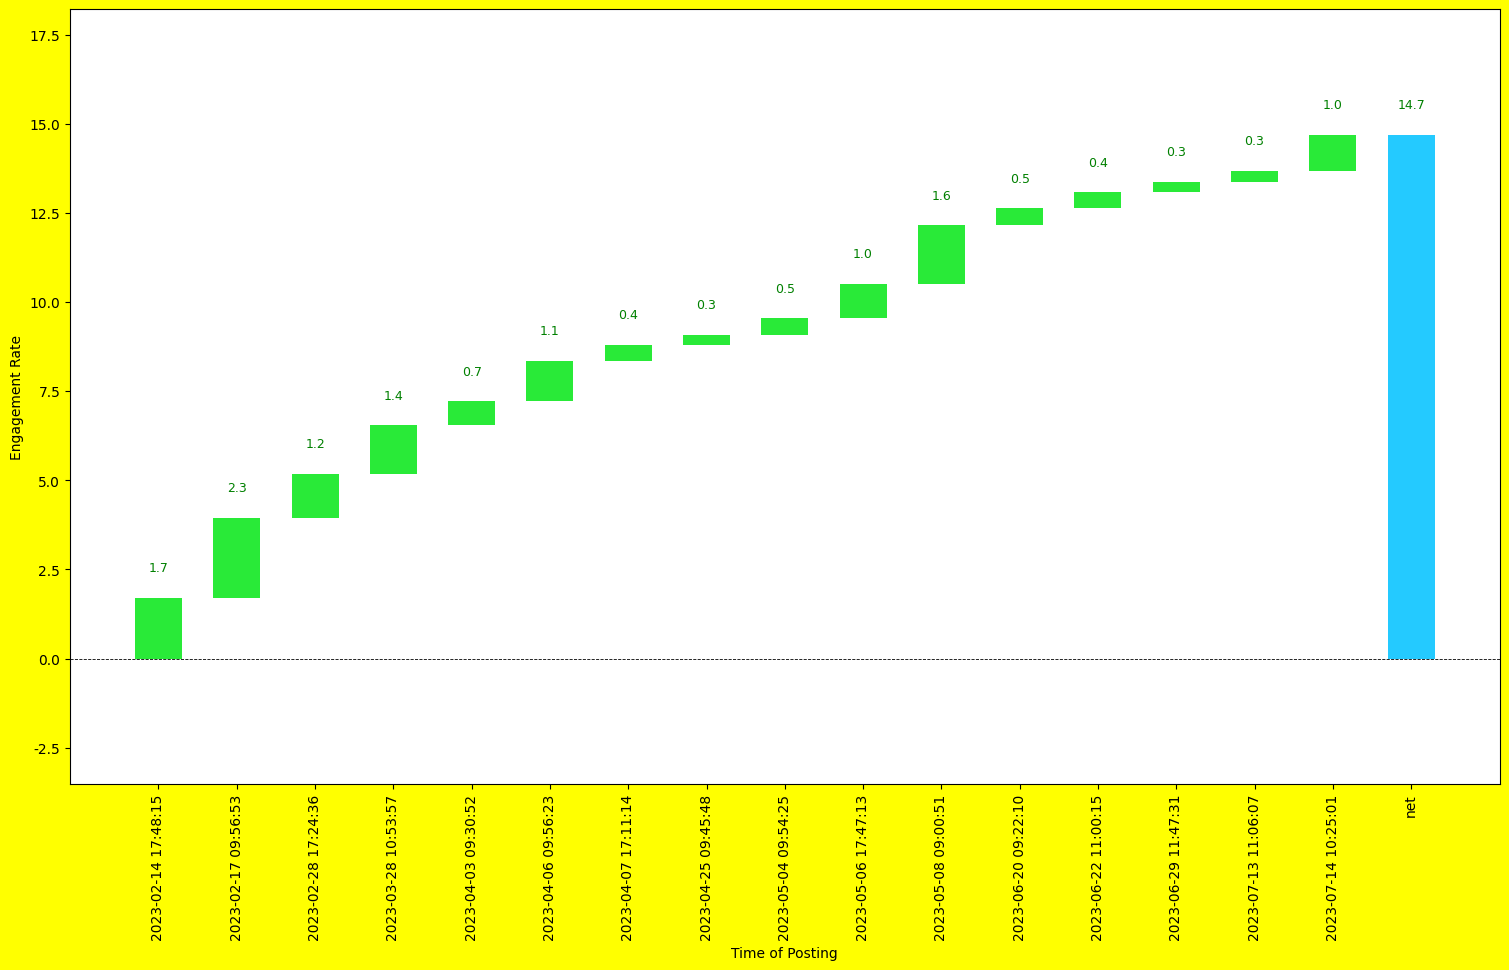

<Figure size 1500x900 with 0 Axes>

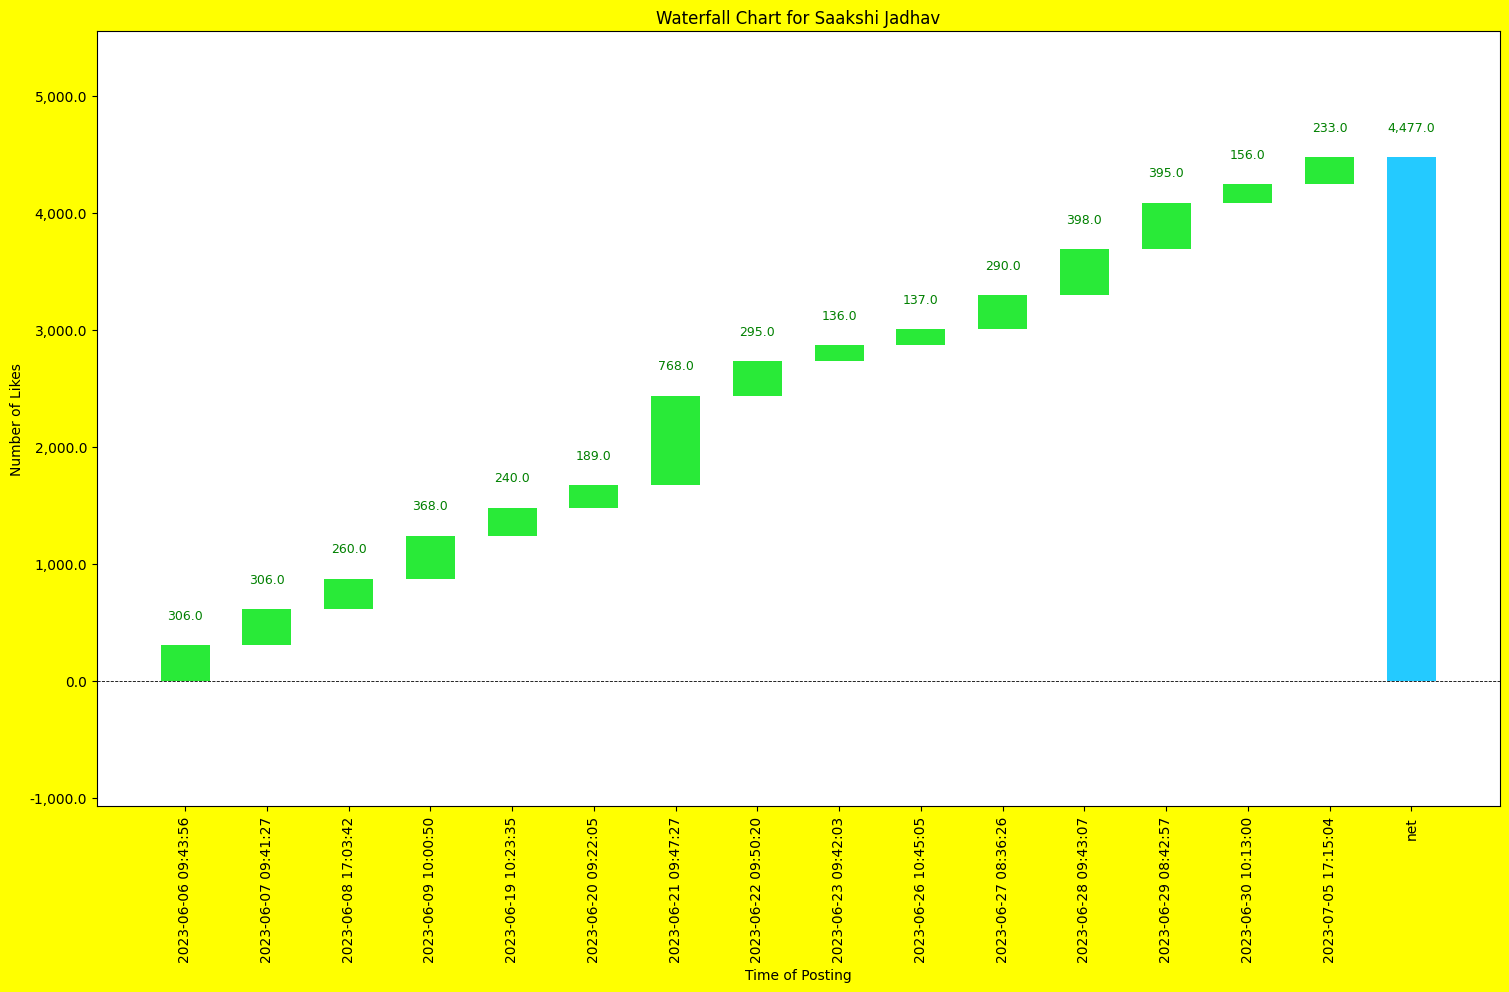

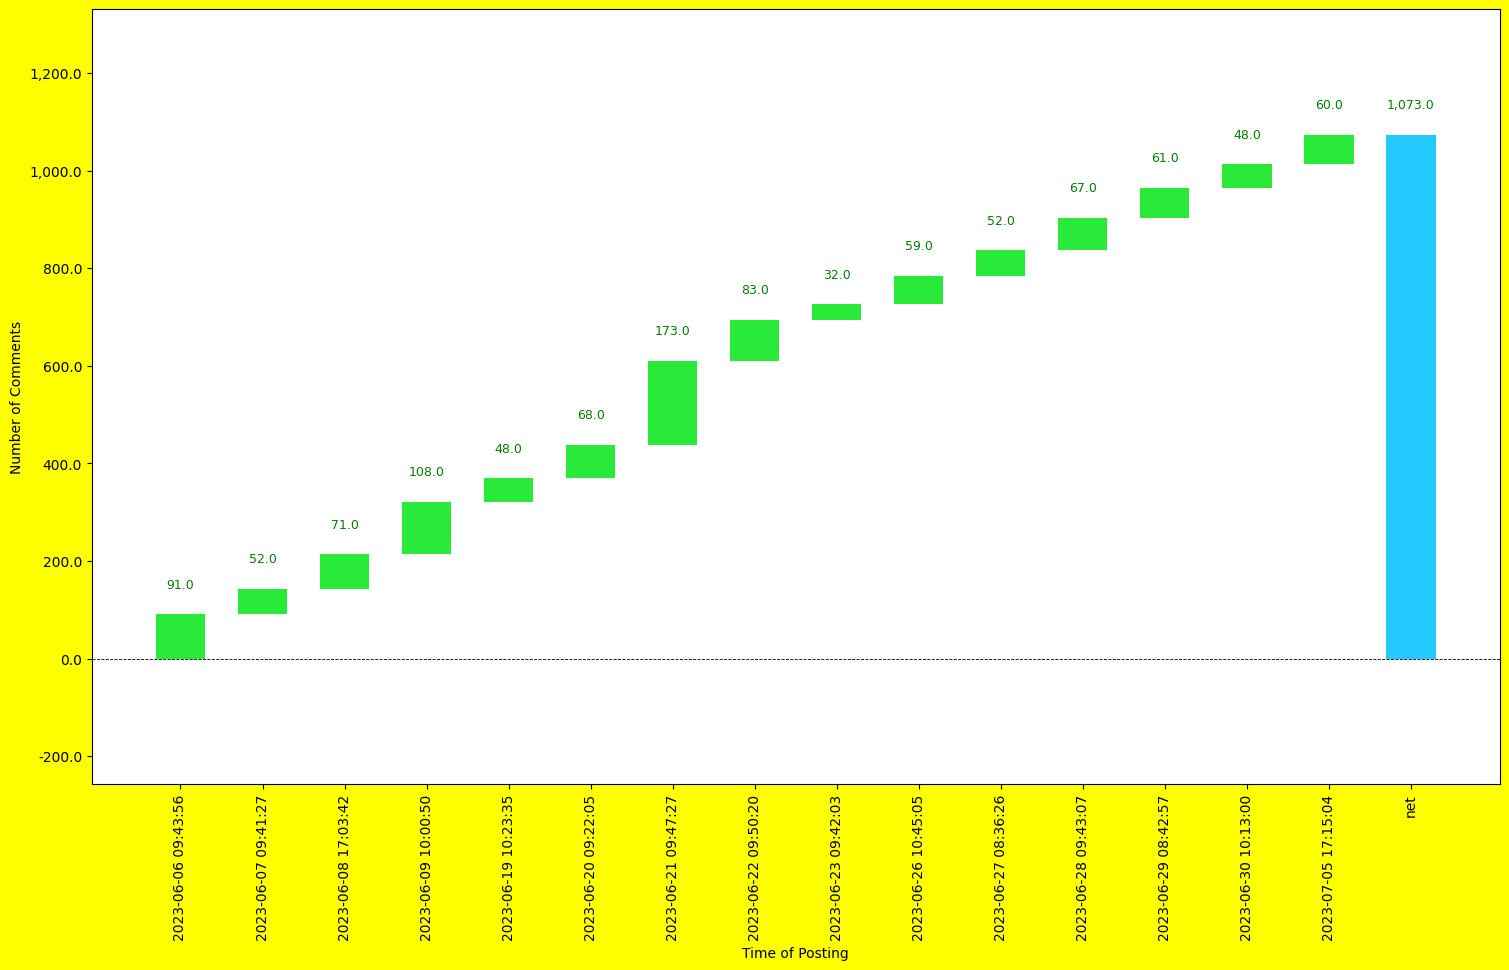

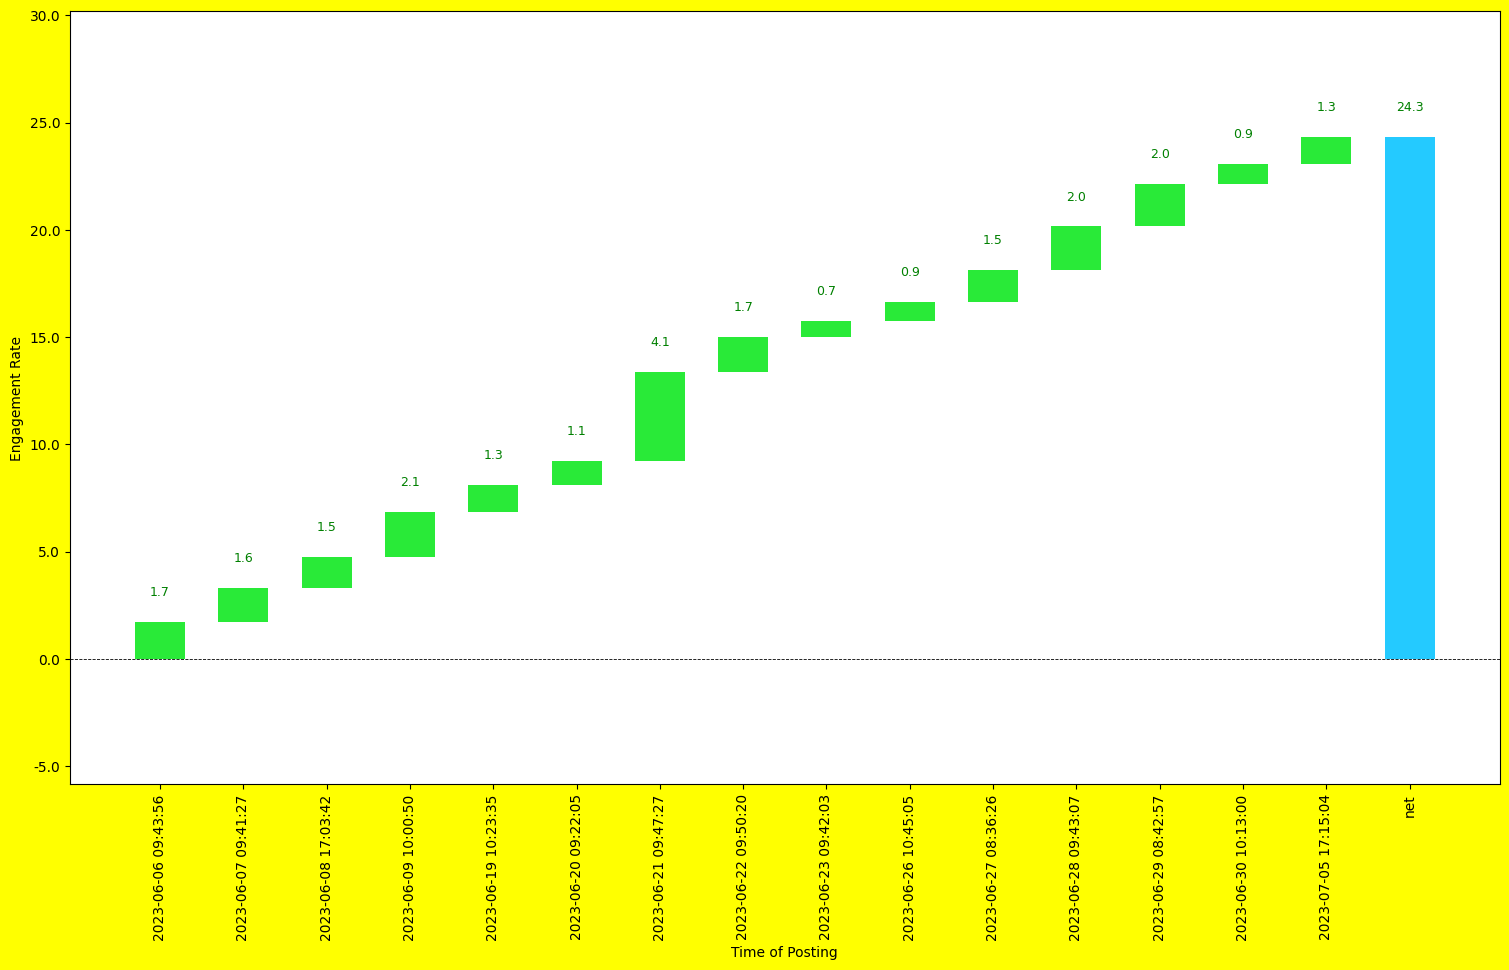

<Figure size 1500x900 with 0 Axes>

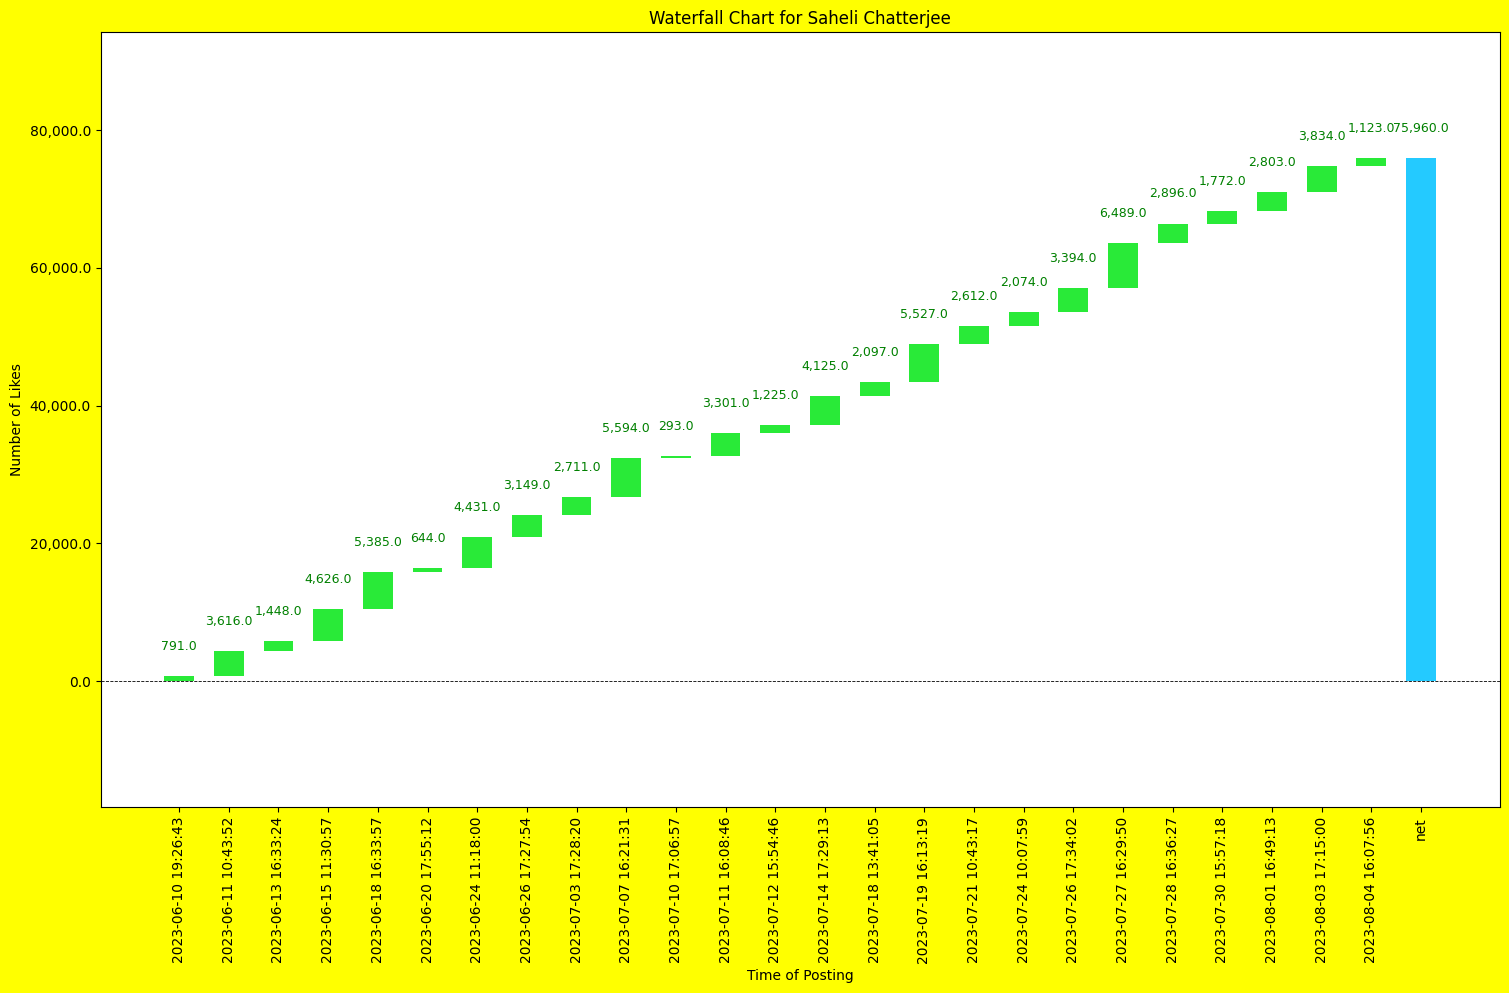

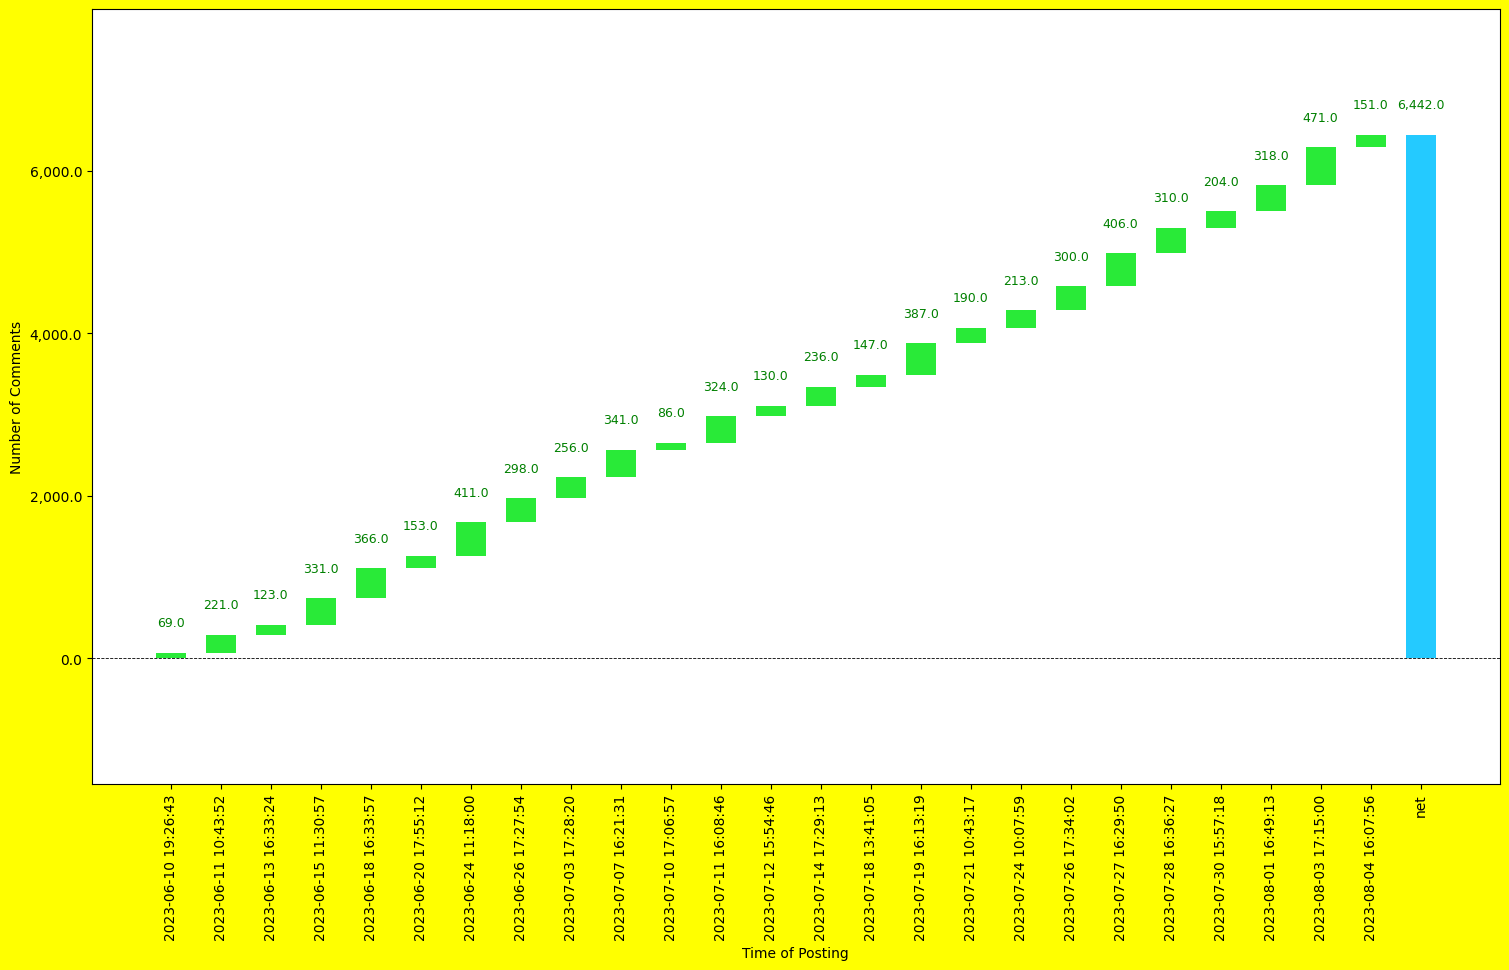

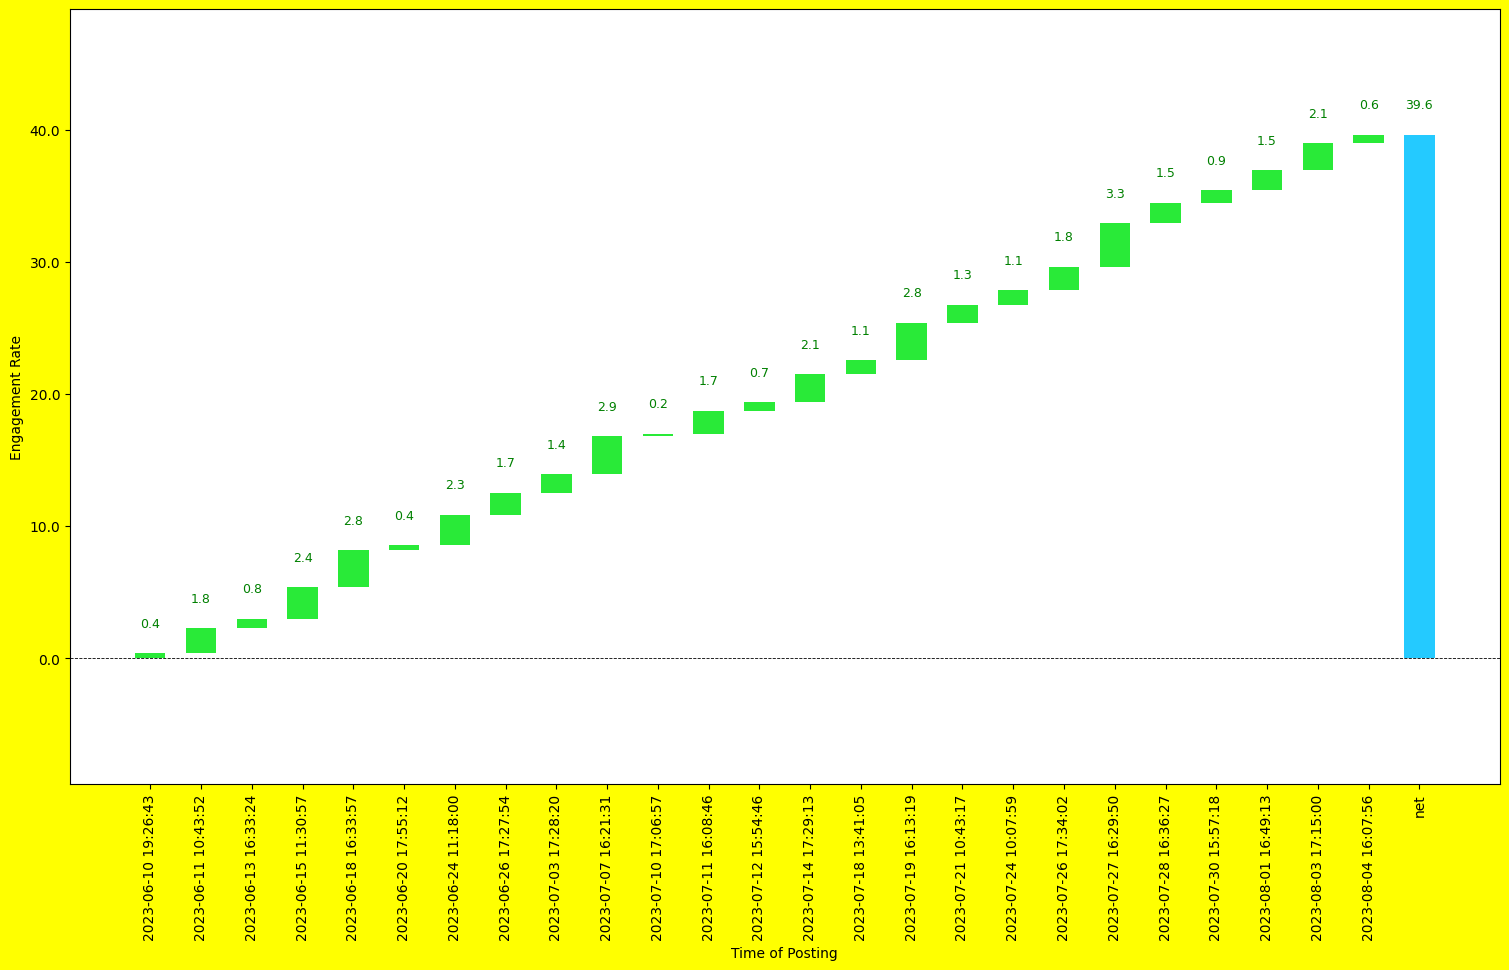

<Figure size 1500x900 with 0 Axes>

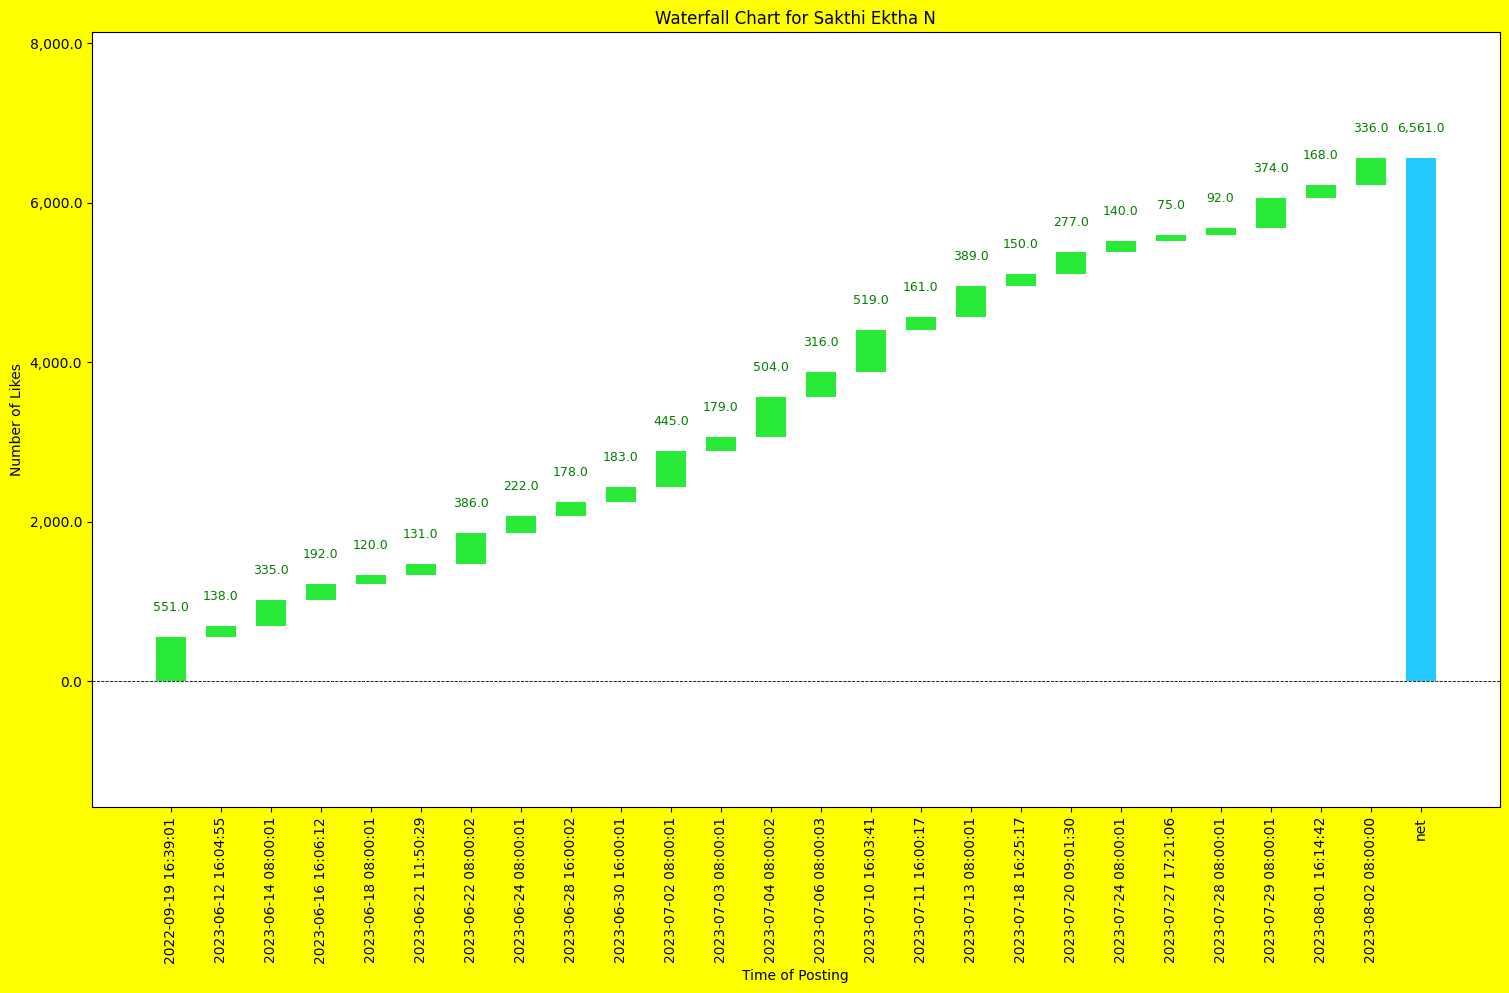

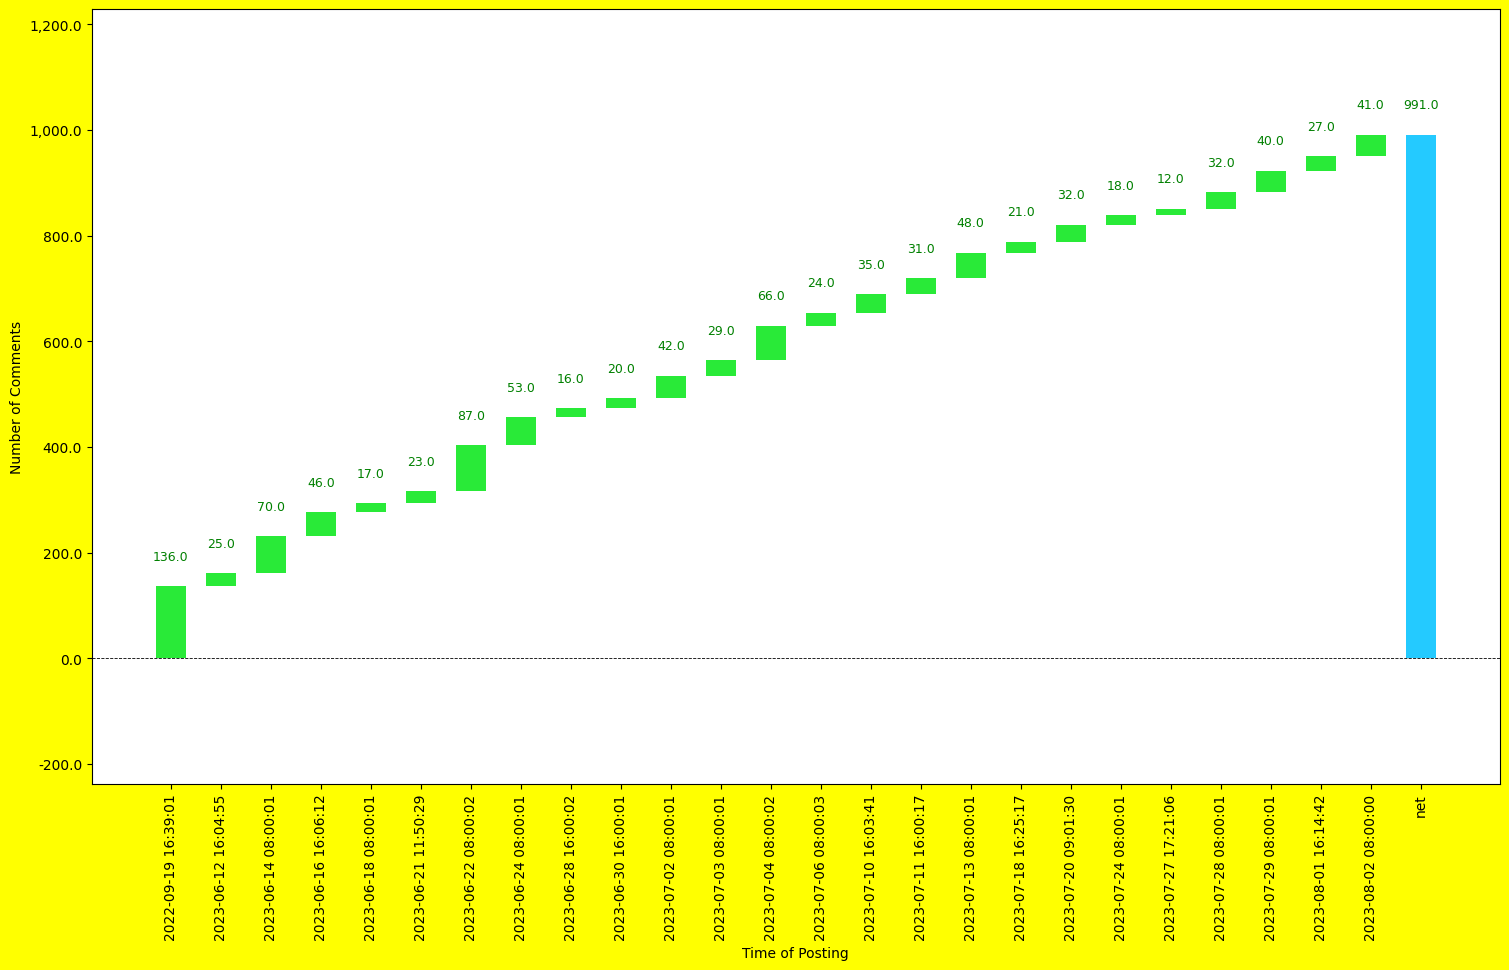

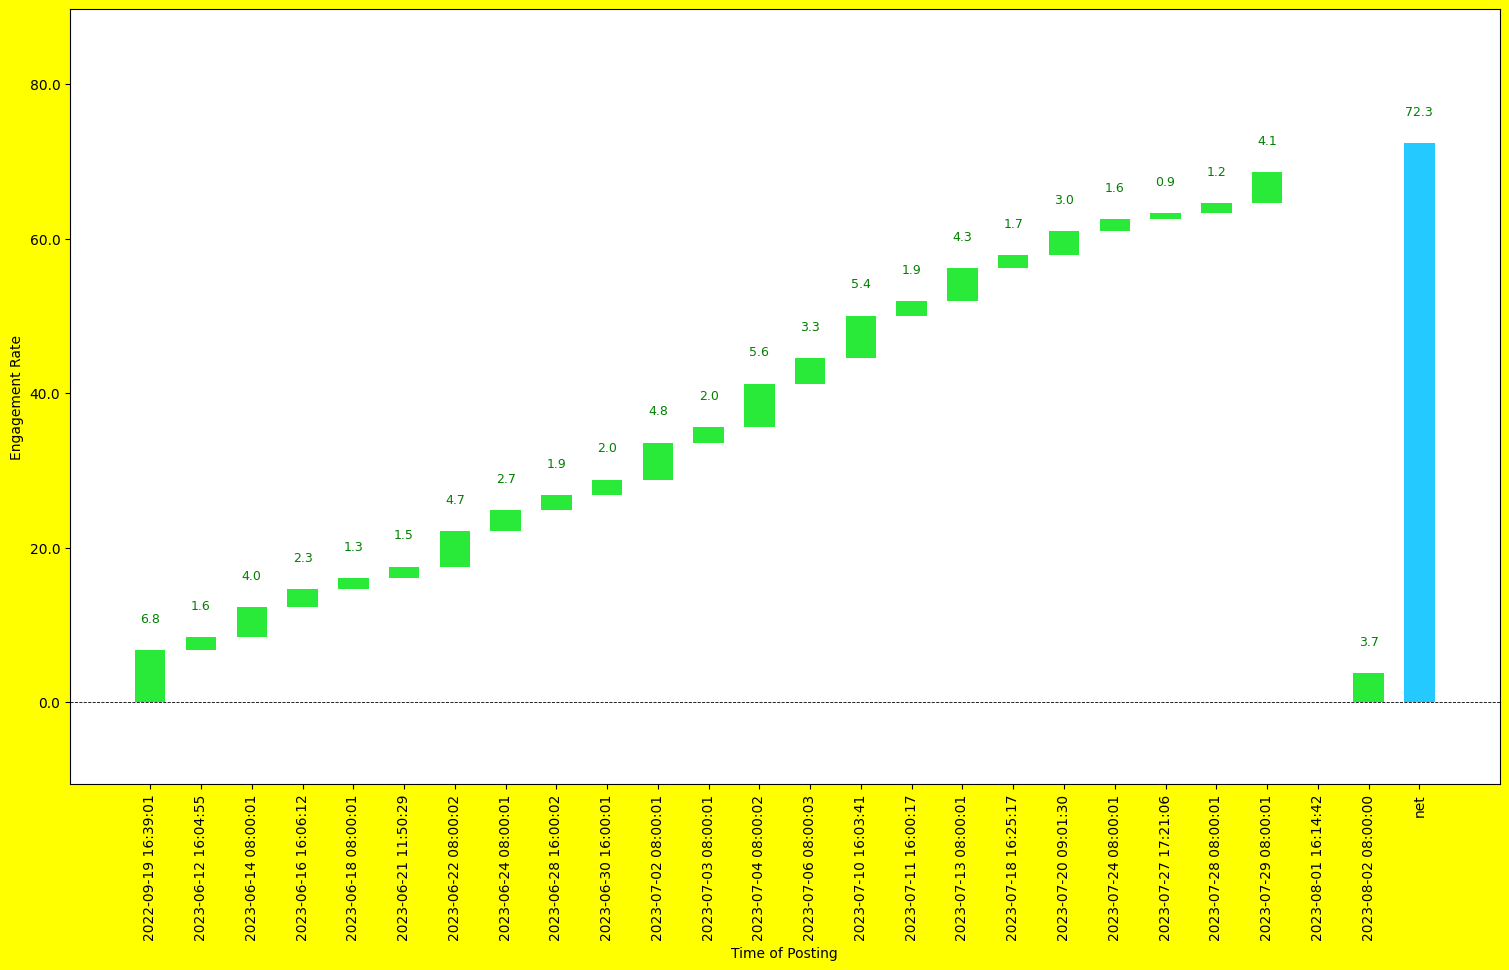

<Figure size 1500x900 with 0 Axes>

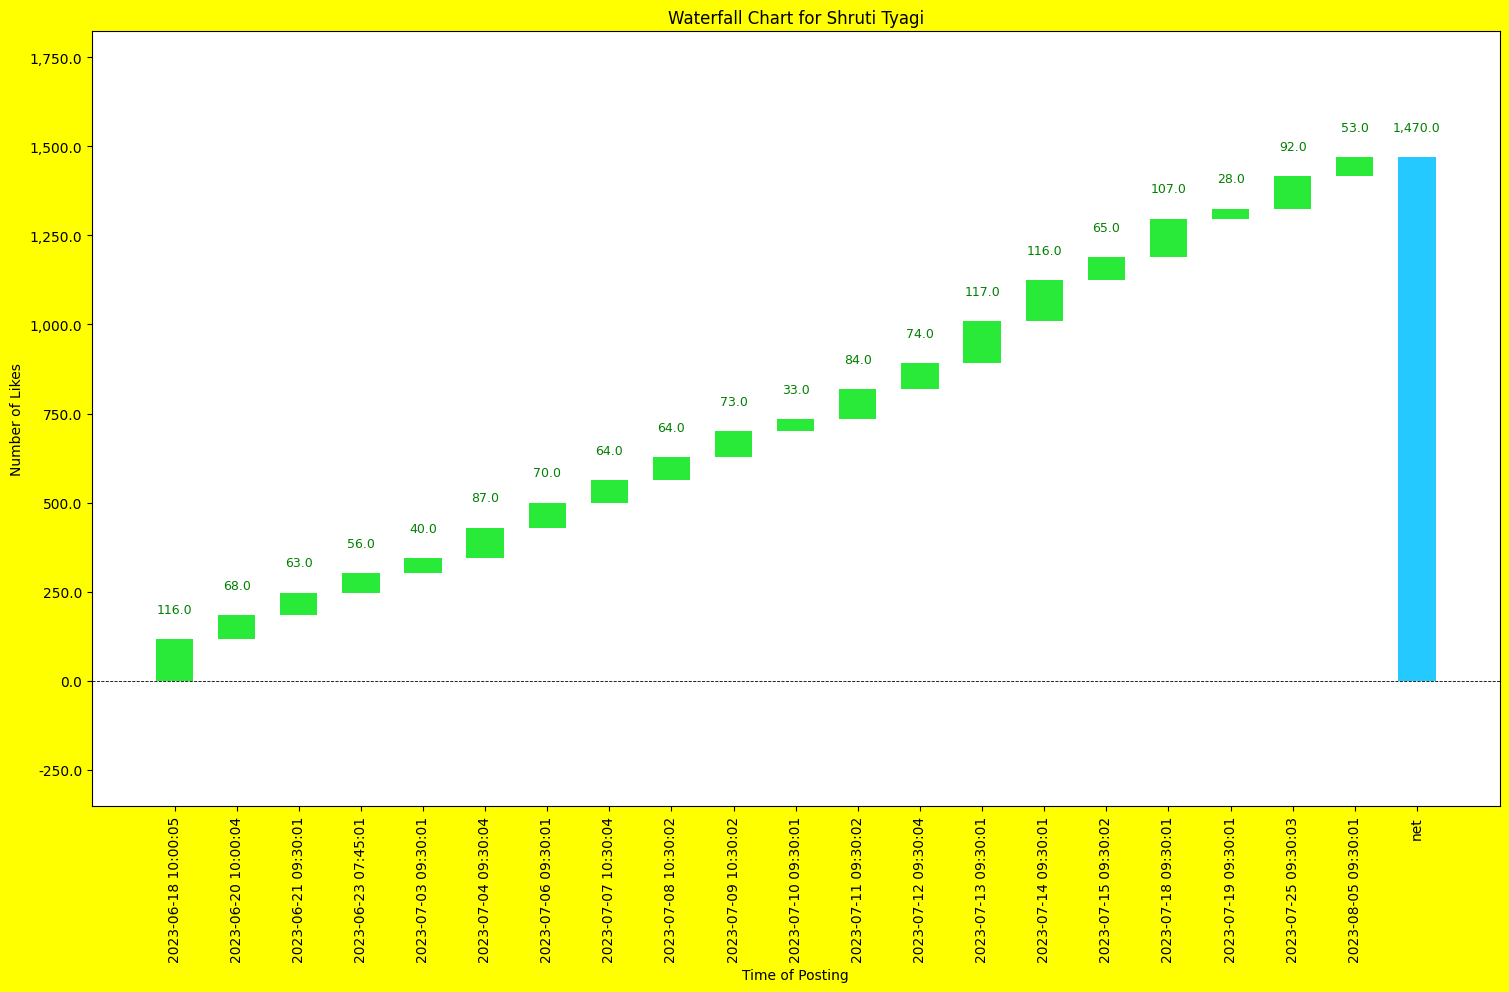

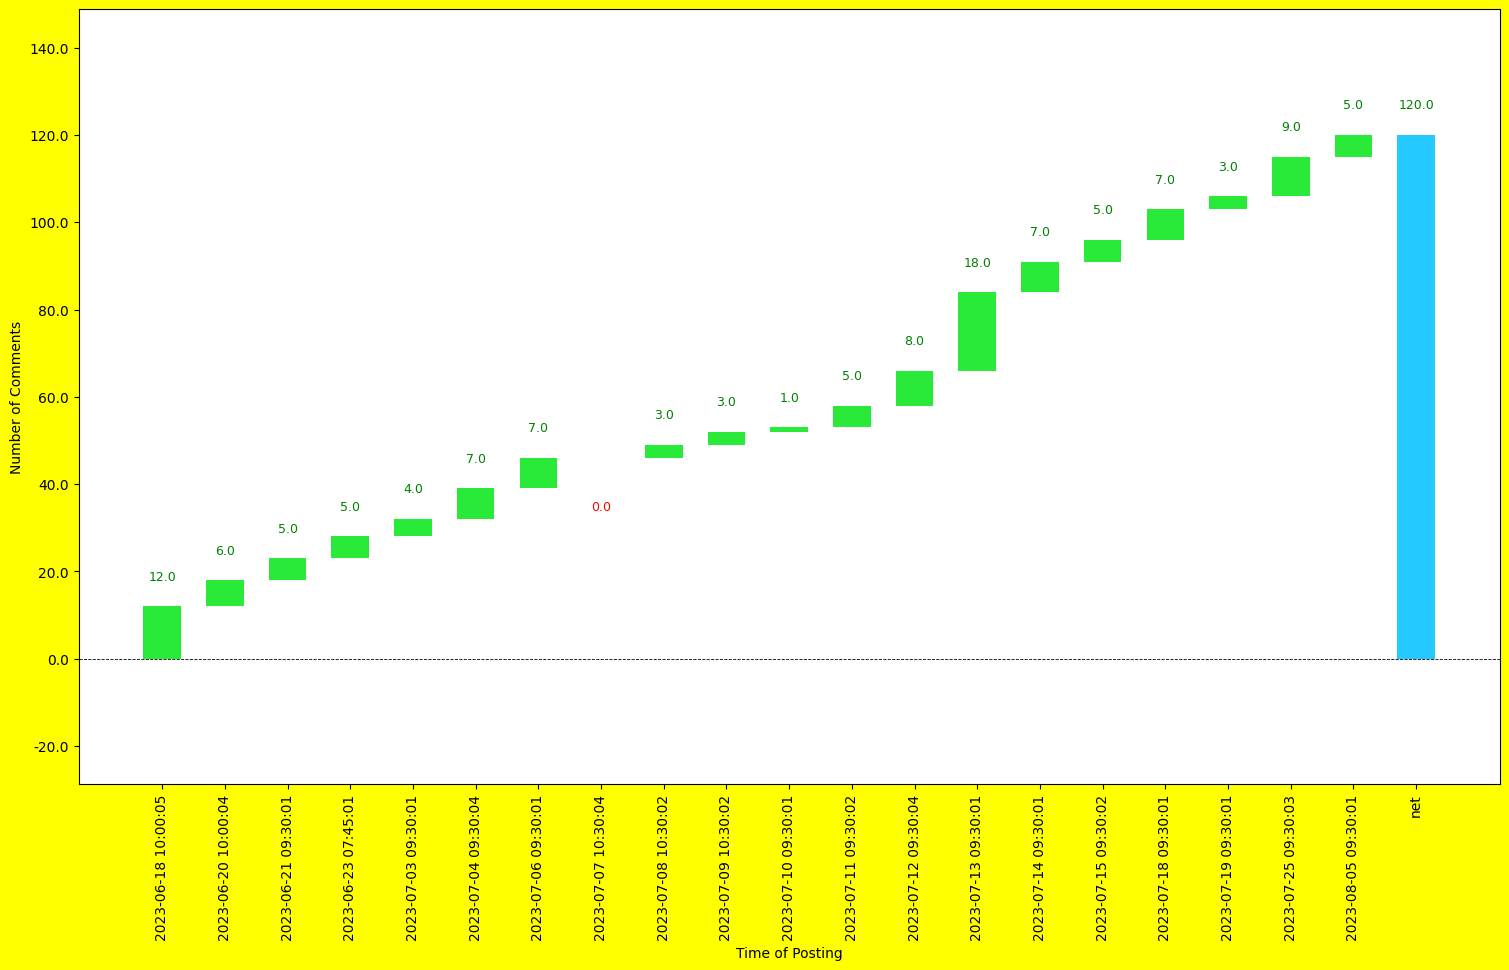

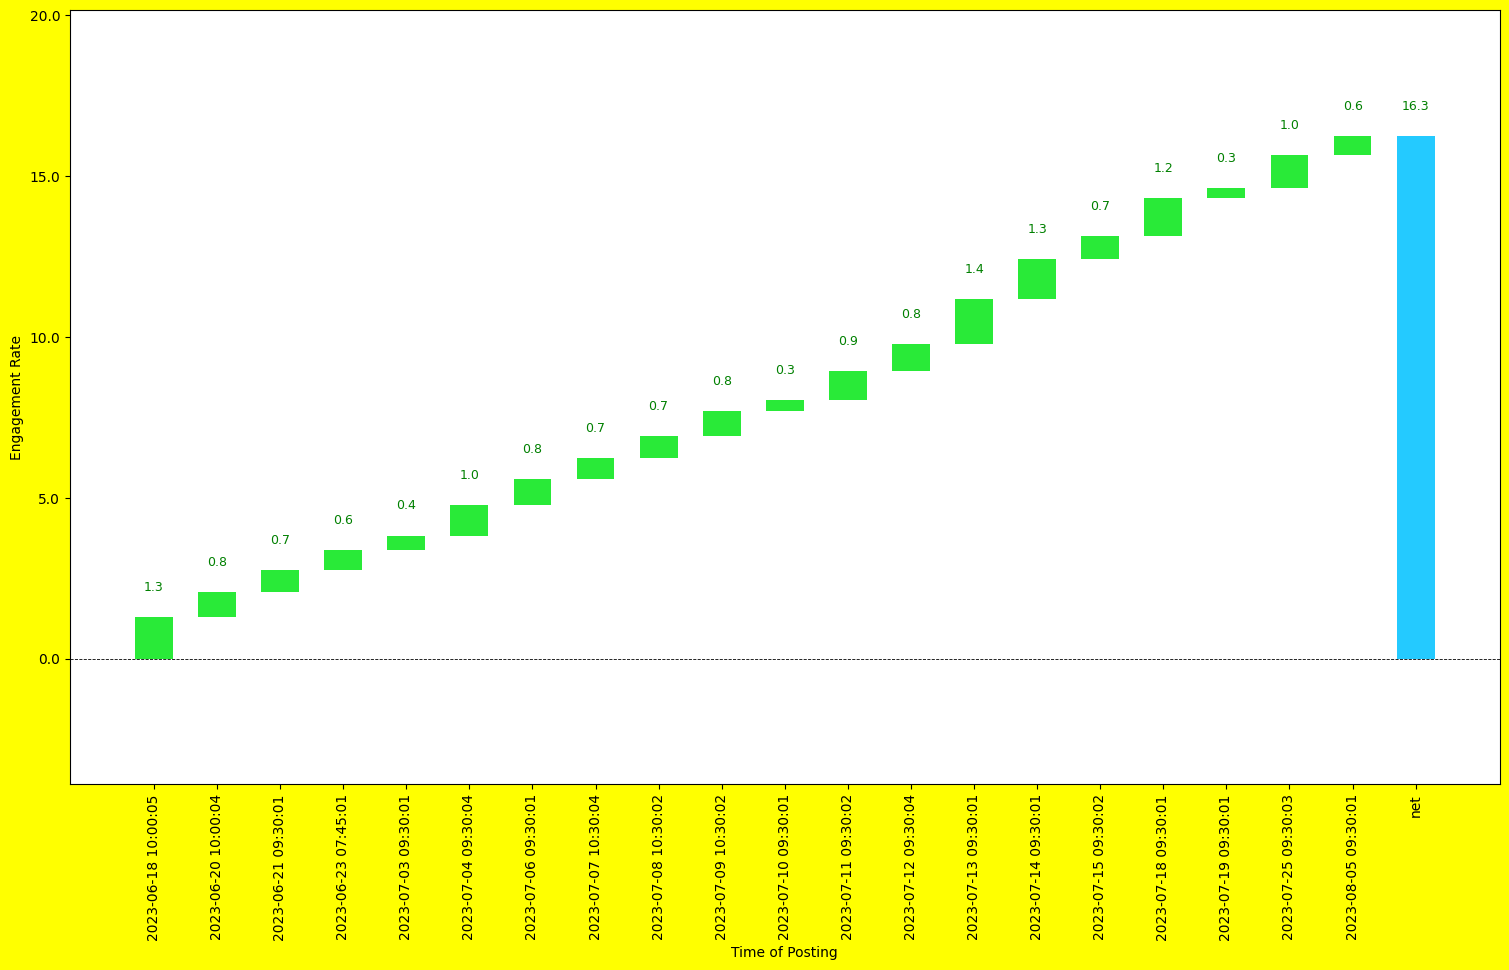

In [124]:
for x in range(len(list(competitor_dataframes.keys()))):
  df_1 = competitor_dataframes[list(competitor_dataframes.keys())[x]]
  name = list(competitor_dataframes.keys())[x]
  z=plt.figure()
  plt.rcParams["figure.figsize"] = (15,9)
  waterfall_chart.plot(df_1['Timestamp IST'], df_1['Likes'])
  plt.xticks(rotation=90)
  plt.xlabel('Time of Posting')
  plt.ylabel('Number of Likes')
  plt.title("Waterfall Chart for {}".format(name))
  plt.show()
  plt.rcParams["figure.figsize"] = (15,9)
  waterfall_chart.plot(df_1['Timestamp IST'], df_1['Comments'])
  plt.xticks(rotation=90)
  plt.xlabel('Time of Posting')
  plt.ylabel('Number of Comments')
  plt.show()
  plt.rcParams["figure.figsize"] = (15,9)
  waterfall_chart.plot(df_1['Timestamp IST'], df_1['Engagement Rate'])
  plt.xticks(rotation=90)
  plt.xlabel('Time of Posting')
  plt.ylabel('Engagement Rate')
  plt.show()